In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

import pandas as pd
from pandas import read_csv
from pandas import set_option
import time as tm

from numpy.fft import fft, ifft

dados=[]

In [2]:
# VALORES DO ARQUIVO
dados=[]

# LISTA DE PADROES
LPD=[]
LPD.append("CORACAO OK")

In [3]:
# ************************************************
# * LEITURA DOS DADOS DO ARQUIVO sinaisvitais003 *
# ************************************************
import csv
path = "sinaisvitais003.txt"
with open(path,'r',newline='') as ARQ:
 ARQUIVO = csv.reader(ARQ)
 ARQDATA=list(ARQUIVO)
 for i in range(0,len(ARQDATA)):
  p=ARQDATA[i][0]  
  campo=p.split("\t")
  dados.append({"HORA": int(campo[0]), 'BATIMENTO': float(campo[1]), "PRESSAO": float(campo[2]), 'TEMPERATURA': float(campo[3])})

In [4]:
 # ************************************************* 
 # CALCULO DA CORRELACAO ENTRE OS TRES PARAMETROS SEM NORMALIZAÇÃO DOS VALORES
 # *************************************************
 print("*"*50)
 print("DADOS DE CORRELAÇÃO ENTRE OS TRÊS PARÂMETROS SEM NORMALIZAÇÃO DOS VALORES")
 print("*"*50)

 auxDF=[]
 auxDF+=[(float(float(dados[j]["BATIMENTO"])),float(dados[j]["PRESSAO"]),float(dados[j]["TEMPERATURA"])) for j in range(0,len(dados))]
 DataFrame=[]

 DataFrame = pd.DataFrame(auxDF,columns=["BATIMENTO", "PRESSAO","TEMPERATURA"])
 print(DataFrame.corr())    
 
 print("*"*50)
 print("DADOS ESTATÍSTICOS DOS TRÊS PARÂMETROS SEM NORMALIZAÇÃO DOS VALORES")
 print("*"*50)
 print(DataFrame.describe())
     

**************************************************
DADOS DE CORRELAÇÃO ENTRE OS TRÊS PARÂMETROS SEM NORMALIZAÇÃO DOS VALORES
**************************************************
             BATIMENTO   PRESSAO  TEMPERATURA
BATIMENTO     1.000000  0.801988     0.254512
PRESSAO       0.801988  1.000000     0.288000
TEMPERATURA   0.254512  0.288000     1.000000
**************************************************
DADOS ESTATÍSTICOS DOS TRÊS PARÂMETROS SEM NORMALIZAÇÃO DOS VALORES
**************************************************
         BATIMENTO      PRESSAO  TEMPERATURA
count  2400.000000  2400.000000  2400.000000
mean     70.142399    12.201297    36.895172
std       2.834338     1.305110     0.265144
min      62.012924     8.489965    36.456422
25%      68.270954    11.274753    36.751472
50%      70.559146    12.478375    36.897640
75%      72.256084    13.232333    36.997109
max     101.710113    22.488186    41.862177


In [5]:
# ********************************************************
# * NORMALIZAÇÃO DOS VALORES COM A MEDIA DE DOIS VALORES *
# ********************************************************
#*********************************************************
# REGRA
# 0 <= Batimento < 100
# 0 <= pressao < 20
# 0 <= temperatura < 40 
#*********************************************************

## NORMALIZAÇÃO DOS BATIMENTOS CARDIACOS
for i in dados:
    if i['BATIMENTO'] < 0 or i['BATIMENTO'] >= 100:
        i['BATIMENTO'] = (dados[dados.index(i)-1]['BATIMENTO'] + dados[dados.index(i)+1]['BATIMENTO'])/2

In [6]:
## NORMALIZAÇÃO DA PRESSAO ARTERIAL
for i in dados:
    if i['PRESSAO'] < 0 or i['PRESSAO'] >= 20:
        i['PRESSAO'] = (dados[dados.index(i)-1]['PRESSAO'] + dados[dados.index(i)+1]['PRESSAO'])/2

In [ ]:
## NORMALIZAÇÃO DA TEMPERATURA COPRORAL
for i in dados:
    if i['TEMPERATURA'] < 0 or i['TEMPERATURA'] >= 40:
        i['TEMPERATURA'] = (dados[dados.index(i)-1]['TEMPERATURA'] + dados[dados.index(i)+1]['TEMPERATURA'])/2

## Exercicio 1:
    
#### Foi normalizados os dados que estavam fora do intervalo esperado, pela analise dos dados, pode ter ocorrido algum problema na hora da medição.

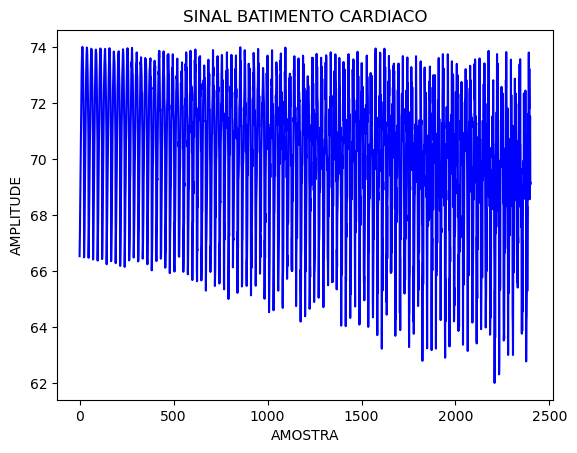

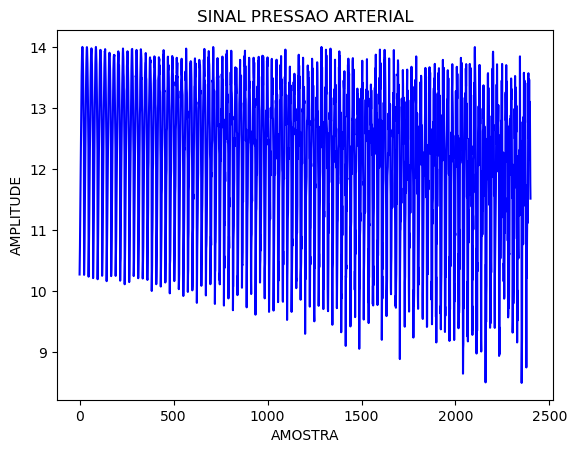

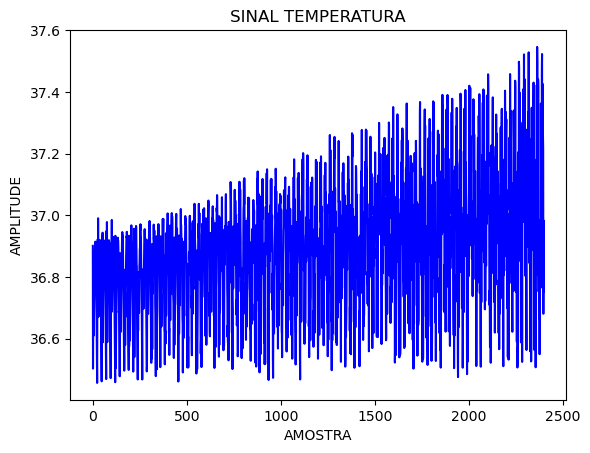

In [8]:
# **********************************
# * SEPARAR OS CAMPOS PARA ANALISE *
# **********************************
hora=[]
batimento=[]
pressao=[]
temperatura=[]
for i in range(0,len(dados)):
    hora.append(dados[i]["HORA"])
    batimento.append(float(dados[i]["BATIMENTO"]))
    pressao.append(float(dados[i]["PRESSAO"]))
    temperatura.append(float(dados[i]["TEMPERATURA"]))

# PLOTAR DADOS
plt.plot( batimento, 'b')
plt.title("SINAL BATIMENTO CARDIACO")
plt.xlabel("AMOSTRA")
plt.ylabel("AMPLITUDE")
plt.show()

plt.plot( pressao, 'b')
plt.title("SINAL PRESSAO ARTERIAL")
plt.xlabel("AMOSTRA")
plt.ylabel("AMPLITUDE")
plt.show()

plt.plot( temperatura, 'b')
plt.title("SINAL TEMPERATURA")
plt.xlabel("AMOSTRA")
plt.ylabel("AMPLITUDE")
plt.show()

In [11]:
 # ******************************************************************************
 # CALCULO DA CORRELACAO ENTRE OS TRES PARAMETROS APÓS NORMALIZAÇÃO DOS VALORES *
 # ******************************************************************************
 print("*"*50)
 print("DADOS DE CORRELAÇÃO ENTRE OS TRÊS PARÂMETROS APÓS NORMALIZAÇÃO DOS VALORES")
 print("*"*50)

 auxDF=[]
 auxDF+=[(float(float(dados[j]["BATIMENTO"])),float(dados[j]["PRESSAO"]),float(dados[j]["TEMPERATURA"])) for j in range(0,len(dados))]
 DataFrame=[]

 DataFrame = pd.DataFrame(auxDF,columns=["BATIMENTO", "PRESSAO","TEMPERATURA"])
 print(DataFrame.corr())    
 
 print("*"*50)
 print("DADOS ESTATÍSTICOS DOS TRÊS PARÂMETROS APÓS NORMALIZAÇÃO DOS VALORES")
 print("*"*50)
 print(DataFrame.describe())
     

**************************************************
DADOS DE CORRELAÇÃO ENTRE OS TRÊS PARÂMETROS APÓS NORMALIZAÇÃO DOS VALORES
**************************************************
             BATIMENTO   PRESSAO  TEMPERATURA
BATIMENTO     1.000000  0.910752     0.365182
PRESSAO       0.910752  1.000000     0.408383
TEMPERATURA   0.365182  0.408383     1.000000
**************************************************
DADOS ESTATÍSTICOS DOS TRÊS PARÂMETROS APÓS NORMALIZAÇÃO DOS VALORES
**************************************************
         BATIMENTO      PRESSAO  TEMPERATURA
count  2400.000000  2400.000000  2400.000000
mean     70.102316    12.188779    36.888946
std       2.607816     1.256541     0.199807
min      62.012924     8.489965    36.456422
25%      68.262607    11.273734    36.751472
50%      70.555119    12.477626    36.897164
75%      72.248613    13.228619    36.996622
max      74.000000    14.000000    37.546458


**************************************************
APLICACAO DE CORRELACAO PARA OS DADOS DE BATIMENTO CARDIACO
**************************************************

CORRELAÇÃO TEMPORAL: 
PACOTE :  0 [ 0 :  24 ] NUMERO DE PADROES:  1
         PADRAO  RECORTE
PADRAO      1.0      1.0
RECORTE     1.0      1.0
DADOS ESTATISTICOS BÁSICOS - TEMPORAL: 
NUMERO DE AMOSTRAS/CAMPOS:  (24, 2)
          PADRAO    RECORTE
count  24.000000  24.000000
mean   71.356588  71.356588
std     2.415405   2.415405
min    66.535898  66.535898
25%    69.826352  69.826352
50%    72.000000  72.000000
75%    73.464102  73.464102
max    74.000000  74.000000

CORRELAÇÃO TEMPORAL: 
PACOTE :  1 [ 24 :  48 ] NUMERO DE PADROES:  1
           PADRAO   RECORTE
PADRAO   1.000000  0.999986
RECORTE  0.999986  1.000000
DADOS ESTATISTICOS BÁSICOS - TEMPORAL: 
NUMERO DE AMOSTRAS/CAMPOS:  (24, 2)
          PADRAO    RECORTE
count  24.000000  24.000000
mean   71.356588  71.327682
std     2.415405   2.417993
min    66.535898  66.492

          PADRAO    RECORTE
count  24.000000  24.000000
mean   71.356588  69.770463
std     2.415405   2.664270
min    66.535898  64.714988
25%    69.826352  68.278545
50%    72.000000  70.179615
75%    73.464102  71.521544
max    74.000000  73.701141

CORRELAÇÃO TEMPORAL: 
PACOTE :  55 [ 1320 :  1344 ] NUMERO DE PADROES:  1
           PADRAO   RECORTE
PADRAO   1.000000  0.936611
RECORTE  0.936611  1.000000
DADOS ESTATISTICOS BÁSICOS - TEMPORAL: 
NUMERO DE AMOSTRAS/CAMPOS:  (24, 2)
          PADRAO    RECORTE
count  24.000000  24.000000
mean   71.356588  70.097590
std     2.415405   2.332237
min    66.535898  65.498098
25%    69.826352  68.607163
50%    72.000000  70.574013
75%    73.464102  71.875927
max    74.000000  73.808260

CORRELAÇÃO TEMPORAL: 
PACOTE :  56 [ 1344 :  1368 ] NUMERO DE PADROES:  1
           PADRAO   RECORTE
PADRAO   1.000000  0.933019
RECORTE  0.933019  1.000000
DADOS ESTATISTICOS BÁSICOS - TEMPORAL: 
NUMERO DE AMOSTRAS/CAMPOS:  (24, 2)
          PADRAO    RECORT

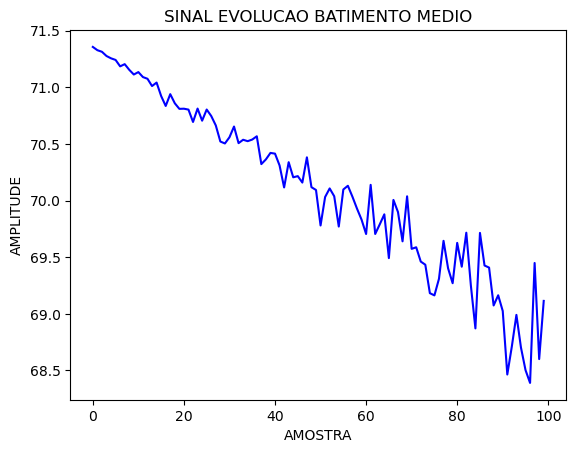

In [14]:
 print("*"*50)
 print("APLICACAO DE CORRELACAO PARA OS DADOS DE BATIMENTO CARDIACO")
 print("*"*50)

# VETOR PARA ARMAZENAMENTO DOS DADOS - ANALISE DE BATIMENTOS CARDIACOS

Padrao=batimento[0:24]

Dados = []
Dados = batimento

fator=int(len(Dados)/24)

LISTAPADRAO=[]
LISTAPADRAO.append(Padrao)

rDados=[]

BMedia=[]

for i in range(fator):
    rDados = Dados[i*24:(i+1)*24]
    
    # DEFINIR DataFrame COM OS VALORES LIDOS PARA APLICAR CORRELACAO
    auxDF = []
    DataFrame = []
    
    # VARIAVEL AUXILIAR PARA MONTAGEM DO DATAFRAME
    auxDF += [(float(Padrao[j]),float(rDados[j])) for j in range(0, len(Padrao))]
    
    # MONTAGEM
    DataFrame = pd.DataFrame(auxDF, columns=["PADRAO", "RECORTE"])

    # CALCULAR A CORRELAÇÃO
    correlacao = DataFrame.corr(method='pearson')
    cp = correlacao['RECORTE'][0]
    print('\nCORRELAÇÃO TEMPORAL: ')
    print('PACOTE : ', i, '[',i*24,": ", (i+1)*24,'] NUMERO DE PADROES: ',len(LISTAPADRAO))
    
    print(correlacao)
    print('DADOS ESTATISTICOS BÁSICOS - TEMPORAL: ')
    print("NUMERO DE AMOSTRAS/CAMPOS: ", DataFrame.shape)
    Estat = DataFrame.describe()
    
    #BATIMENTO MEDIO
    media = Estat['RECORTE'][1]
    BMedia.append(media)
    print(Estat)
    """
    plt.plot(BMedia, 'b')
    plt.title("SINAL EVOLUCAO BATIMENTO MEDIO")
    plt.xlabel("AMOSTRA")
    plt.ylabel('AMPLITUDE')
    plt.show()
    """
    if (cp<0.7):
        for vpd in range(len(LISTAPADRAO)):
            print("COMPARANDO O PACOTE ", i, " COM O PADRAO: ", vpd, ' - ', LPD[vpd])
            
            rPDaux = LISTAPADRAO[vpd]
            #DEFINIR DataFrame COM OS VALORES LIDOS PARA APLICAR CORRELACAO
            auxDF2 = []
            DataFrame2 = []
            
            # VARIAVEL AUXILIAR PARA MONTAGEM DO DATAFRAME
            auxDF2 += [(float(rPDaux[v]), float(rDados[v])) for v in range(len(rDados))]
            
            #MONTAGEM
            DataFrame = pd.DataFrame(auxDF2, columns=['rPADRAO', 'RECORTE'])
            
            #CALCULAR A CORRELAÇÃO
            correlacao = DataFrame.corr(method='pearson')
            cp = correlacao['RECORTE'][0]
            print("CORRELACAO = ", cp)
            
        T = input('DESEJA ARMAZENAR ESTE RECORTE: <S/N>')
        if (T.upper()=='S'):
            #ARMAZENAR EM UMA LISTA
            LISTAPADRAO.append(rDados)
            textodopadrao = input("DIGITAR CODIGO DO ERRO: ")
            LPD.append(textodopadrao)
        
        t = input("DIGITE ALGO: ")
        
plt.plot(BMedia, 'b')
plt.title("SINAL EVOLUCAO BATIMENTO MEDIO")
plt.xlabel('AMOSTRA')
plt.ylabel('AMPLITUDE')
plt.show()


CORRELAÇÃO TEMPORAL: 
PACOTE :  0 [ 0 :  24 ] NUMERO DE PADROES:  1
         PADRAO  RECORTE
PADRAO      1.0      1.0
RECORTE     1.0      1.0
DADOS ESTATISTICOS BÁSICOS - TEMPORAL: 
NUMERO DE AMOSTRAS/CAMPOS:  (24, 2)
          PADRAO    RECORTE
count  24.000000  24.000000
mean   12.678294  12.678294
std     1.207703   1.207703
min    10.267949  10.267949
25%    11.913176  11.913176
50%    13.000000  13.000000
75%    13.732051  13.732051
max    14.000000  14.000000

CORRELAÇÃO TEMPORAL: 
PACOTE :  1 [ 24 :  48 ] NUMERO DE PADROES:  1
          PADRAO  RECORTE
PADRAO   1.00000  0.99999
RECORTE  0.99999  1.00000
DADOS ESTATISTICOS BÁSICOS - TEMPORAL: 
NUMERO DE AMOSTRAS/CAMPOS:  (24, 2)
          PADRAO    RECORTE
count  24.000000  24.000000
mean   12.678294  12.670286
std     1.207703   1.206334
min    10.267949  10.261652
25%    11.913176  11.907672
50%    13.000000  12.992624
75%    13.732051  13.716121
max    14.000000  13.996367

CORRELAÇÃO TEMPORAL: 
PACOTE :  2 [ 48 :  72 ] NUME

          PADRAO    RECORTE
count  24.000000  24.000000
mean   12.678294  12.025220
std     1.207703   1.252012
min    10.267949   9.666674
25%    11.913176  11.301394
50%    13.000000  12.326859
75%    13.732051  12.923099
max    14.000000  13.972118

CORRELAÇÃO TEMPORAL: 
PACOTE :  56 [ 1344 :  1368 ] NUMERO DE PADROES:  1
           PADRAO   RECORTE
PADRAO   1.000000  0.972184
RECORTE  0.972184  1.000000
DADOS ESTATISTICOS BÁSICOS - TEMPORAL: 
NUMERO DE AMOSTRAS/CAMPOS:  (24, 2)
          PADRAO    RECORTE
count  24.000000  24.000000
mean   12.678294  12.163191
std     1.207703   1.200016
min    10.267949   9.443171
25%    11.913176  11.709698
50%    13.000000  12.544720
75%    13.732051  13.077123
max    14.000000  13.790286

CORRELAÇÃO TEMPORAL: 
PACOTE :  57 [ 1368 :  1392 ] NUMERO DE PADROES:  1
           PADRAO   RECORTE
PADRAO   1.000000  0.966784
RECORTE  0.966784  1.000000
DADOS ESTATISTICOS BÁSICOS - TEMPORAL: 
NUMERO DE AMOSTRAS/CAMPOS:  (24, 2)
          PADRAO    RECORT

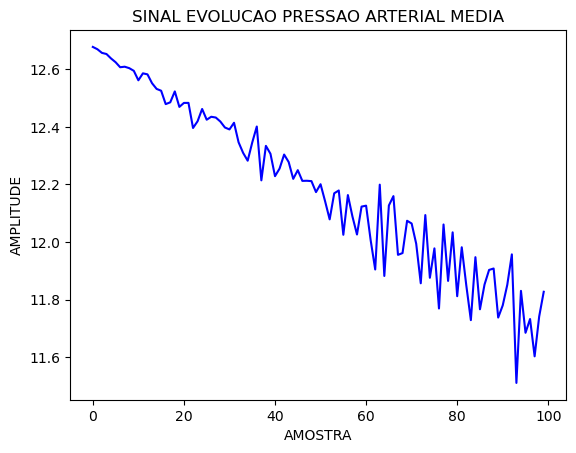

In [15]:
# VETOR PARA ARMAZENAMENTO DOS DADOS - ANALISE DA PRESSAO ARTERIAL

Padrao=pressao[0:24]

Dados = []
Dados = pressao

fator=int(len(Dados)/24)

LISTAPADRAO=[]
LISTAPADRAO.append(Padrao)

rDados=[]

PMedia=[]

for i in range(fator):
    rDados = Dados[i*24:(i+1)*24]
    
    # DEFINIR DataFrame COM OS VALORES LIDOS PARA APLICAR CORRELACAO
    auxDF = []
    DataFrame = []
    
    # z VARIAVEL AUXILIAR PARA MONTAGEM DO DATAFRAME
    auxDF += [(float(Padrao[j]),float(rDados[j])) for j in range(0, len(Padrao))]
    
    # MONTAGEM
    DataFrame = pd.DataFrame(auxDF, columns=["PADRAO", "RECORTE"])

    # CALCULAR A CORRELAÇÃO
    correlacao = DataFrame.corr(method='pearson')
    cp = correlacao['RECORTE'][0]
    print('\nCORRELAÇÃO TEMPORAL: ')
    print('PACOTE : ', i, '[',i*24,": ", (i+1)*24,'] NUMERO DE PADROES: ',len(LISTAPADRAO))
    
    print(correlacao)
    print('DADOS ESTATISTICOS BÁSICOS - TEMPORAL: ')
    print("NUMERO DE AMOSTRAS/CAMPOS: ", DataFrame.shape)
    Estat = DataFrame.describe()
    
    #PRESSAO ARTERIAL
    media = Estat['RECORTE'][1]
    PMedia.append(media)
    print(Estat)
    """
    plt.plot(PMedia, 'b')
    plt.title("SINAL EVOLUCAO PRESSAO ARTERIAL MEDIA")
    plt.xlabel("AMOSTRA")
    plt.ylabel('AMPLITUDE')
    plt.show()
    """
    if (cp<0.7):
        for vpd in range(len(LISTAPADRAO)):
            print("COMPARANDO O PACOTE ", i, " COM O PADRAO: ", vpd, ' - ', LPD[vpd])
            
            rPDaux = LISTAPADRAO[vpd]
            #DEFINIR DataFrame COM OS VALORES LIDOS PARA APLICAR CORRELACAO
            auxDF2 = []
            DataFrame2 = []
            
            # Z VARIAVEL AUXILIAR PARA MONTAGEM DO DATAFRAME
            auxDF2 += [(float(rPDaux[v]), float(rDados[v])) for v in range(len(rDados))]
            
            #MONTAGEM
            DataFrame = pd.DataFrame(auxDF2, columns=['rPADRAO', 'RECORTE'])
            
            #CALCULAR A CORRELAÇÃO
            correlacao = DataFrame.corr(method='pearson')
            cp = correlacao['RECORTE'][0]
            print("CORRELACAO = ", cp)
            
        T = input('DESEJA ARMAZENAR ESTE RECORTE: <S/N>')
        if (T.upper()=='S'):
            #ARMAZENAR EM UMA LISTA
            LISTAPADRAO.append(rDados)
            textodopadrao = input("DIGITAR CODIGO DO ERRO: ")
            LPD.append(textodopadrao)
        
        t = input("DIGITE ALGO: ")
        
plt.plot(PMedia, 'b')
plt.title("SINAL EVOLUCAO PRESSAO ARTERIAL MEDIA")
plt.xlabel('AMOSTRA')
plt.ylabel('AMPLITUDE')
plt.show()


CORRELAÇÃO TEMPORAL: 
PACOTE :  0 [ 0 :  24 ] NUMERO DE PADROES:  1
         PADRAO  RECORTE
PADRAO      1.0      1.0
RECORTE     1.0      1.0
DADOS ESTATISTICOS BÁSICOS - TEMPORAL: 
NUMERO DE AMOSTRAS/CAMPOS:  (24, 2)
          PADRAO    RECORTE
count  24.000000  24.000000
mean   36.748108  36.748108
std     0.142746   0.142746
min    36.456422  36.456422
25%    36.639084  36.639084
50%    36.781835  36.781835
75%    36.875448  36.875448
max    36.914691  36.914691

CORRELAÇÃO TEMPORAL: 
PACOTE :  1 [ 24 :  48 ] NUMERO DE PADROES:  1
           PADRAO   RECORTE
PADRAO   1.000000  0.748521
RECORTE  0.748521  1.000000
DADOS ESTATISTICOS BÁSICOS - TEMPORAL: 
NUMERO DE AMOSTRAS/CAMPOS:  (24, 2)
          PADRAO    RECORTE
count  24.000000  24.000000
mean   36.748108  36.782925
std     0.142746   0.134169
min    36.456422  36.461633
25%    36.639084  36.699560
50%    36.781835  36.809116
75%    36.875448  36.891601
max    36.914691  36.990663

CORRELAÇÃO TEMPORAL: 
PACOTE :  2 [ 48 :  72 

CORRELACAO =  0.7670472693587391
COMPARANDO O PACOTE  39  COM O PADRAO:  2  -  0
CORRELACAO =  0.7932653293967002
COMPARANDO O PACOTE  39  COM O PADRAO:  3  -  0
CORRELACAO =  0.7915322521924774
COMPARANDO O PACOTE  39  COM O PADRAO:  4  -  0
CORRELACAO =  0.7092088641301909
COMPARANDO O PACOTE  39  COM O PADRAO:  5  -  0
CORRELACAO =  0.7969268628945525
COMPARANDO O PACOTE  39  COM O PADRAO:  6  -  0
CORRELACAO =  0.7245306093910628
COMPARANDO O PACOTE  39  COM O PADRAO:  7  -  0
CORRELACAO =  0.6481346641604754
COMPARANDO O PACOTE  39  COM O PADRAO:  8  -  0
CORRELACAO =  0.7328987259882611
COMPARANDO O PACOTE  39  COM O PADRAO:  9  -  0
CORRELACAO =  0.7573756810197955
COMPARANDO O PACOTE  39  COM O PADRAO:  10  -  0
CORRELACAO =  0.7749188888797914
COMPARANDO O PACOTE  39  COM O PADRAO:  11  -  0
CORRELACAO =  0.7862604805722986
COMPARANDO O PACOTE  39  COM O PADRAO:  12  -  0
CORRELACAO =  0.6686244309848458
COMPARANDO O PACOTE  39  COM O PADRAO:  13  -  0
CORRELACAO =  0.67109679

          PADRAO    RECORTE
count  24.000000  24.000000
mean   36.748108  36.944392
std     0.142746   0.172078
min    36.456422  36.582648
25%    36.639084  36.833977
50%    36.781835  36.929289
75%    36.875448  37.059720
max    36.914691  37.251497
COMPARANDO O PACOTE  64  COM O PADRAO:  0  -  CORACAO OK
CORRELACAO =  0.6159090549978425
COMPARANDO O PACOTE  64  COM O PADRAO:  1  -  0
CORRELACAO =  0.4978880760532268
COMPARANDO O PACOTE  64  COM O PADRAO:  2  -  0
CORRELACAO =  0.671165547580684
COMPARANDO O PACOTE  64  COM O PADRAO:  3  -  0
CORRELACAO =  0.7058834403676228
COMPARANDO O PACOTE  64  COM O PADRAO:  4  -  0
CORRELACAO =  0.6255670956547806
COMPARANDO O PACOTE  64  COM O PADRAO:  5  -  0
CORRELACAO =  0.7232774644313354
COMPARANDO O PACOTE  64  COM O PADRAO:  6  -  0
CORRELACAO =  0.5942921240315926
COMPARANDO O PACOTE  64  COM O PADRAO:  7  -  0
CORRELACAO =  0.5543538774414338
COMPARANDO O PACOTE  64  COM O PADRAO:  8  -  0
CORRELACAO =  0.611485991412531
COMPARANDO O

CORRELACAO =  0.5589734327096987
COMPARANDO O PACOTE  81  COM O PADRAO:  2  -  0
CORRELACAO =  0.6426911815681275
COMPARANDO O PACOTE  81  COM O PADRAO:  3  -  0
CORRELACAO =  0.6784267709208387
COMPARANDO O PACOTE  81  COM O PADRAO:  4  -  0
CORRELACAO =  0.4994105088868265
COMPARANDO O PACOTE  81  COM O PADRAO:  5  -  0
CORRELACAO =  0.5923893153639948
COMPARANDO O PACOTE  81  COM O PADRAO:  6  -  0
CORRELACAO =  0.7216525883927495
COMPARANDO O PACOTE  81  COM O PADRAO:  7  -  0
CORRELACAO =  0.5867535108198573
COMPARANDO O PACOTE  81  COM O PADRAO:  8  -  0
CORRELACAO =  0.5355768416795134
COMPARANDO O PACOTE  81  COM O PADRAO:  9  -  0
CORRELACAO =  0.5753268352763363
COMPARANDO O PACOTE  81  COM O PADRAO:  10  -  0
CORRELACAO =  0.6256426176038054
COMPARANDO O PACOTE  81  COM O PADRAO:  11  -  0
CORRELACAO =  0.647473451357956
COMPARANDO O PACOTE  81  COM O PADRAO:  12  -  0
CORRELACAO =  0.6122528280435264
COMPARANDO O PACOTE  81  COM O PADRAO:  13  -  0
CORRELACAO =  0.520722864

CORRELACAO =  0.3935562320409571
COMPARANDO O PACOTE  93  COM O PADRAO:  8  -  0
CORRELACAO =  0.44870011367187596
COMPARANDO O PACOTE  93  COM O PADRAO:  9  -  0
CORRELACAO =  0.4440365935953648
COMPARANDO O PACOTE  93  COM O PADRAO:  10  -  0
CORRELACAO =  0.501781009408425
COMPARANDO O PACOTE  93  COM O PADRAO:  11  -  0
CORRELACAO =  0.5156878813772159
COMPARANDO O PACOTE  93  COM O PADRAO:  12  -  0
CORRELACAO =  0.4481806982732689
COMPARANDO O PACOTE  93  COM O PADRAO:  13  -  0
CORRELACAO =  0.41398117531631223
COMPARANDO O PACOTE  93  COM O PADRAO:  14  -  0
CORRELACAO =  0.5068485547801944
COMPARANDO O PACOTE  93  COM O PADRAO:  15  -  0
CORRELACAO =  0.33050023788750277
COMPARANDO O PACOTE  93  COM O PADRAO:  16  -  0
CORRELACAO =  0.2895699071675149
COMPARANDO O PACOTE  93  COM O PADRAO:  17  -  0
CORRELACAO =  0.553483647485834
COMPARANDO O PACOTE  93  COM O PADRAO:  18  -  0
CORRELACAO =  0.4100172373980048
COMPARANDO O PACOTE  93  COM O PADRAO:  19  -  0
CORRELACAO =  0.4

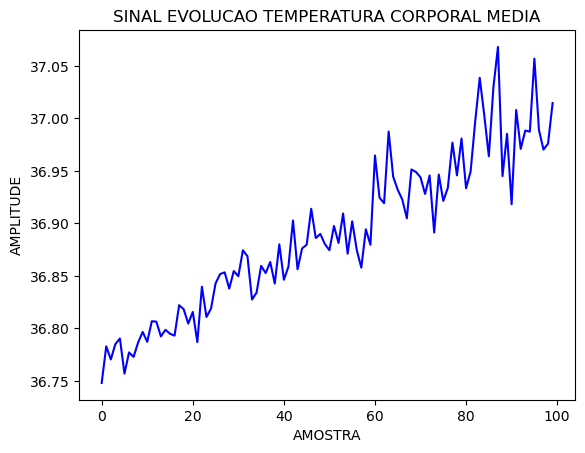

In [16]:
# VETOR PARA ARMAZENAMENTO DOS DADOS - ANALISE DA TEMPERATURA CORPORAL

Padrao=temperatura[0:24]

Dados = []
Dados = temperatura

fator=int(len(Dados)/24)

LISTAPADRAO=[]
LISTAPADRAO.append(Padrao)

rDados=[]

TMedia=[]

for i in range(fator):
    rDados = Dados[i*24:(i+1)*24]
    
    # DEFINIR DataFrame COM OS VALORES LIDOS PARA APLICAR CORRELACAO
    auxDF = []
    DataFrame = []
    
    # z VARIAVEL AUXILIAR PARA MONTAGEM DO DATAFRAME
    auxDF += [(float(Padrao[j]),float(rDados[j])) for j in range(0, len(Padrao))]
    
    # MONTAGEM
    DataFrame = pd.DataFrame(auxDF, columns=["PADRAO", "RECORTE"])

    
    # CALCULAR A CORRELAÇÃO
    correlacao = DataFrame.corr(method='pearson')
    cp = correlacao['RECORTE'][0]
    print('\nCORRELAÇÃO TEMPORAL: ')
    print('PACOTE : ', i, '[',i*24,": ", (i+1)*24,'] NUMERO DE PADROES: ',len(LISTAPADRAO))
    
    print(correlacao)
    print('DADOS ESTATISTICOS BÁSICOS - TEMPORAL: ')
    print("NUMERO DE AMOSTRAS/CAMPOS: ", DataFrame.shape)
    Estat = DataFrame.describe()
    #PRESSAO ARTERIAL
    media = Estat['RECORTE'][1]
    TMedia.append(media)
    print(Estat)
    """
    plt.plot(TMedia, 'b')
    plt.title("SINAL EVOLUCAO TEMPERATURA CORPORAL MEDIA MEDIA")
    plt.xlabel("AMOSTRA")
    plt.ylabel('AMPLITUDE')
    plt.show()
    """
    if (cp<0.7):
        for vpd in range(len(LISTAPADRAO)):
            print("COMPARANDO O PACOTE ", i, " COM O PADRAO: ", vpd, ' - ', LPD[vpd])
            
            rPDaux = LISTAPADRAO[vpd]
            #DEFINIR DataFrame COM OS VALORES LIDOS PARA APLICAR CORRELACAO
            auxDF2 = []
            DataFrame2 = []
            
            # VARIAVEL AUXILIAR PARA MONTAGEM DO DATAFRAME
            auxDF2 += [(float(rPDaux[v]), float(rDados[v])) for v in range(len(rDados))]
            
            #MONTAGEM
            DataFrame = pd.DataFrame(auxDF2, columns=['rPADRAO', 'RECORTE'])
            
            #CALCULAR A CORRELAÇÃO
            correlacao = DataFrame.corr(method='pearson')
            cp = correlacao['RECORTE'][0]
            print("CORRELACAO = ", cp)
            
        T = 's' #input('DESEJA ARMAZENAR ESTE RECORTE: <S/N>')
        if (T.upper()=='S'):
            #ARMAZENAR EM UMA LISTA
            LISTAPADRAO.append(rDados)
            textodopadrao = '0' #input("DIGITAR CODIGO DO ERRO: ")
            LPD.append(textodopadrao)
        
        #t = input("DIGITE ALGO: ")
        print(f"Digite Algo: Baixa Correlação corr: {cp:.2f}")
        
plt.plot(TMedia, 'b')
plt.title("SINAL EVOLUCAO TEMPERATURA CORPORAL MEDIA")
plt.xlabel('AMOSTRA')
plt.ylabel('AMPLITUDE')
plt.show()

## Exercicio 2:

### Pela análise nota-se que o batimento cardiáco e a pressão arterial os valores médios decairam, já a temperatura houve um processo inverso, ela teve um aumento. Ao contrário do que houve com batimento e com a pressão, que mantiveram a sua correlação acima de 0.7 em todos os pacotes, a temperatura não manteve este padrão de correlação, apresentando baixa correlação da temperatura entre os dias, revelando que a temperatura pode variar de forma expressiva entre os dias.

************************************************************
CORRELACAO ENTRE BATIMENTO CARDIACO E PRESSÃO ARTERIAL
************************************************************

CORRELAÇÃO TEMPORAL: PACOTE: 0 [0:24] NUMERO DE PADROES: 1
                   PADRAO_BATIMENTO  PADRAO_PRESSAO  RECORTE_BATIMENTO  \
PADRAO_BATIMENTO                1.0             1.0                1.0   
PADRAO_PRESSAO                  1.0             1.0                1.0   
RECORTE_BATIMENTO               1.0             1.0                1.0   
RECORTE_PRESSAO                 1.0             1.0                1.0   

                   RECORTE_PRESSAO  
PADRAO_BATIMENTO               1.0  
PADRAO_PRESSAO                 1.0  
RECORTE_BATIMENTO              1.0  
RECORTE_PRESSAO                1.0  
DADOS ESTATISTICOS BÁSICOS - TEMPORAL: 
NUMERO DE AMOSTRAS/CAMPOS:  (24, 4)


       PADRAO_BATIMENTO  PADRAO_PRESSAO  RECORTE_BATIMENTO  RECORTE_PRESSAO
count         24.000000       24.000000          24.0

       PADRAO_BATIMENTO  PADRAO_PRESSAO  RECORTE_BATIMENTO  RECORTE_PRESSAO
count         24.000000       24.000000          24.000000        24.000000
mean          71.356588       12.678294          70.524313        12.282723
std            2.415405        1.207703           2.222834         1.248334
min           66.535898       10.267949          66.135609         9.682154
25%           69.826352       11.913176          69.017876        11.508628
50%           72.000000       13.000000          71.050851        12.595411
75%           73.464102       13.732051          72.219246        13.387937
max           74.000000       14.000000          73.694637        13.665612

CORRELAÇÃO TEMPORAL: PACOTE: 35 [840:864] NUMERO DE PADROES: 1
                   PADRAO_BATIMENTO  PADRAO_PRESSAO  RECORTE_BATIMENTO  \
PADRAO_BATIMENTO           1.000000        1.000000           0.981608   
PADRAO_PRESSAO             1.000000        1.000000           0.981608   
RECORTE_BATIMENTO          0.9

       PADRAO_BATIMENTO  PADRAO_PRESSAO  RECORTE_BATIMENTO  RECORTE_PRESSAO
count         24.000000       24.000000          24.000000        24.000000
mean          71.356588       12.678294          70.037384        12.073894
std            2.415405        1.207703           2.679180         1.131070
min           66.535898       10.267949          65.947573         9.944508
25%           69.826352       11.913176          67.054559        11.345623
50%           72.000000       13.000000          70.359679        12.260031
75%           73.464102       13.732051          72.273152        12.871682
max           74.000000       14.000000          73.404719        13.948675

CORRELAÇÃO TEMPORAL: PACOTE: 70 [1680:1704] NUMERO DE PADROES: 1
                   PADRAO_BATIMENTO  PADRAO_PRESSAO  RECORTE_BATIMENTO  \
PADRAO_BATIMENTO           1.000000        1.000000           0.881174   
PADRAO_PRESSAO             1.000000        1.000000           0.881174   
RECORTE_BATIMENTO          0

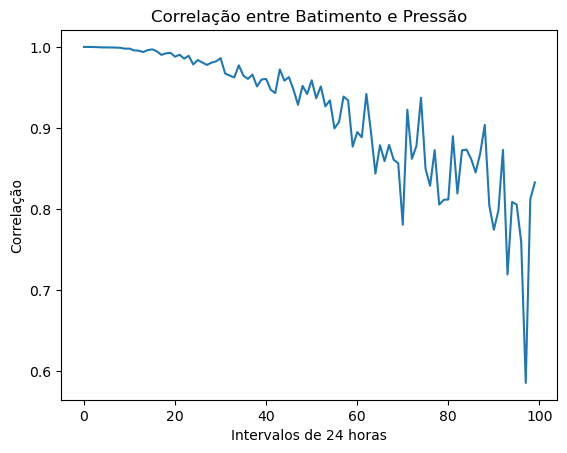

In [23]:
 print("*"*60)
 print("CORRELACAO ENTRE BATIMENTO CARDIACO E PRESSÃO ARTERIAL")
 print("*"*60)

Padrao_batimento = batimento[0:24] # 1 dia de batimentos
Padrao_pressao = pressao[0:24] # 1 dia de pressao

Dados_batimento = batimento # todosdados sobre batimento 
Dados_pressao = pressao # todos dados sobre pressao
 
fator = len(Dados_batimento) // 24 #fato é a quantidade de dias medidos

LISTAPADRAO_batimento = [Padrao_batimento] #lista de lista de padrão batimento
LISTAPADRAO_pressao = [Padrao_pressao] #lista de lista com padrão pressão

BMedia = [] # media para batimentos
PMedia = [] #media para pressão
correlacoes = [] # correlação

for i in range(fator): # um loop por dia
    rDados_batimento = Dados_batimento[i * 24:(i + 1) * 24] # aqui selecionamos dados de um dia sobre batimento
    rDados_pressao = Dados_pressao[i * 24:(i + 1) * 24]  # aqui selecionamos dados de um dia de pressão
    

    # DEFINIR DataFrame COM OS VALORES LIDOS PARA APLICAR CORRELACAO
    DataFrame = pd.DataFrame({
        "PADRAO_BATIMENTO": Padrao_batimento,
        "PADRAO_PRESSAO": Padrao_pressao,
        "RECORTE_BATIMENTO": rDados_batimento,
        "RECORTE_PRESSAO": rDados_pressao
    }) # DF montado com dados de um dia de batimento

    # CALCULAR A CORRELAÇÃO
    correlacao = DataFrame.corr(method='pearson') #cálculo de correlação utilizando o método de Pearson
    cp_batimento_pressao = correlacao['RECORTE_BATIMENTO']['RECORTE_PRESSAO'] #aplicando a correlação sobre os dados de batimento e pressao

    print(f'\nCORRELAÇÃO TEMPORAL: PACOTE: {i} [{i * 24}:{(i + 1) * 24}] NUMERO DE PADROES: {len(LISTAPADRAO_batimento)}') #correlação diária ente dados
    print(correlacao)

    print('DADOS ESTATISTICOS BÁSICOS - TEMPORAL: ') # cshape do DF diario
    print("NUMERO DE AMOSTRAS/CAMPOS: ", DataFrame.shape)
    
    print("\n")
    
    Estat = DataFrame.describe() # descrições estatisticas do dia

    # BATIMENTO E PRESSAO MEDIA
    batimento_media = Estat.loc['mean', 'RECORTE_BATIMENTO'] # adição de media no no df
    pressao_media = Estat.loc['mean', 'RECORTE_PRESSAO']

    BMedia.append(batimento_media)
    PMedia.append(pressao_media)

    print(Estat)

    correlacoes.append(cp_batimento_pressao)

# CONVERTER A LISTA DE CORRELAÇÕES PARA UM DATAFRAME
correlacoes_df = pd.DataFrame(correlacoes, columns=['Correlação Batimento/Pressão'])
correlacoes_df
plt.plot(correlacoes_df)
plt.title('Correlação entre Batimento e Pressão')
plt.xlabel('Intervalos de 24 horas')
plt.ylabel('Correlação')
plt.show()


PACOTE 1: 
MMÉDIA DE BATIMENTOS: 71.35658775419647 
MEDIANA DE BATIMENTOS: 72.0 
MODA DE BATIMENTOS: 70.69459271066772 
DESVIO PADRÃO DE BATIMENTOS: 2.364548718860021


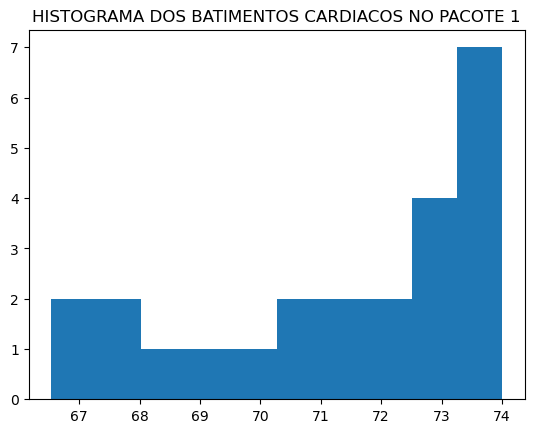

PACOTE 2: 
MMÉDIA DE BATIMENTOS: 71.32768219226271 
MEDIANA DE BATIMENTOS: 71.9728607238787 
MODA DE BATIMENTOS: 66.49238747261185 
DESVIO PADRÃO DE BATIMENTOS: 2.3670819462028936


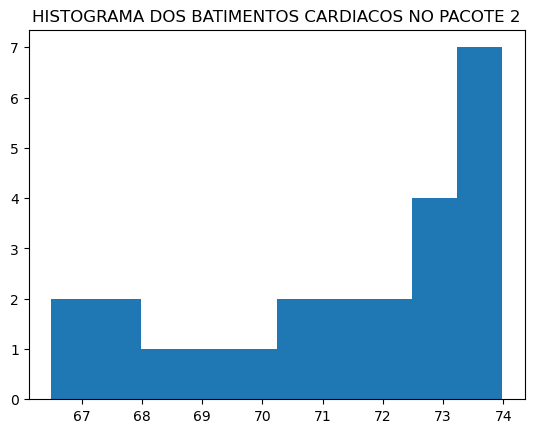

PACOTE 3: 
MMÉDIA DE BATIMENTOS: 71.31365691524128 
MEDIANA DE BATIMENTOS: 71.9471655648756 
MODA DE BATIMENTOS: 66.47596630230849 
DESVIO PADRÃO DE BATIMENTOS: 2.3696521904128427


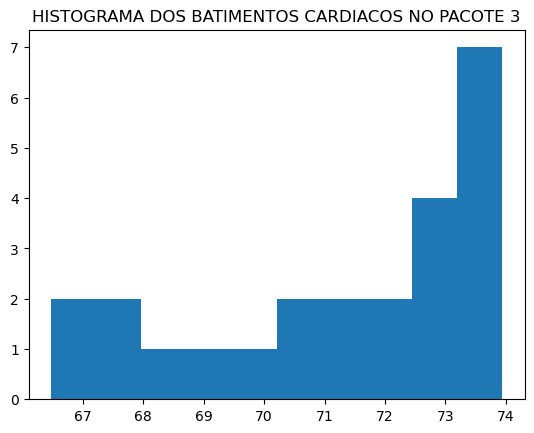

PACOTE 4: 
MMÉDIA DE BATIMENTOS: 71.27651558499123 
MEDIANA DE BATIMENTOS: 71.90897422902003 
MODA DE BATIMENTOS: 66.415649694063 
DESVIO PADRÃO DE BATIMENTOS: 2.3681767027150564


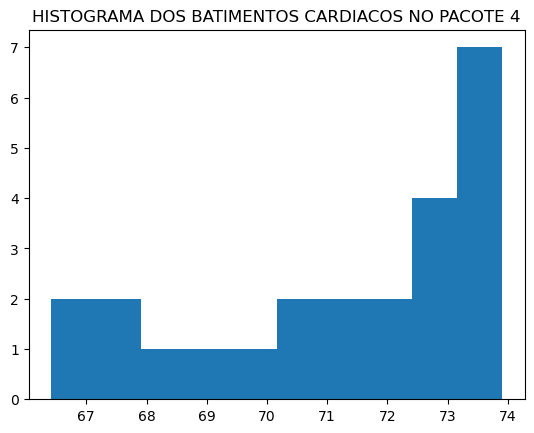

PACOTE 5: 
MMÉDIA DE BATIMENTOS: 71.25583757322164 
MEDIANA DE BATIMENTOS: 71.95809125784834 
MODA DE BATIMENTOS: 66.37828999229329 
DESVIO PADRÃO DE BATIMENTOS: 2.37775341623524


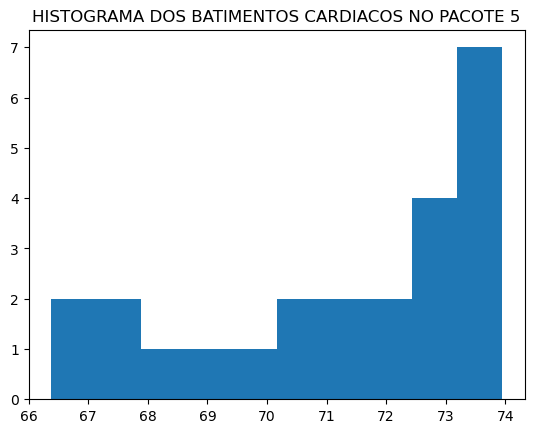

PACOTE 6: 
MMÉDIA DE BATIMENTOS: 71.24155779703192 
MEDIANA DE BATIMENTOS: 71.87733966824234 
MODA DE BATIMENTOS: 66.4316710178193 
DESVIO PADRÃO DE BATIMENTOS: 2.363461006665108


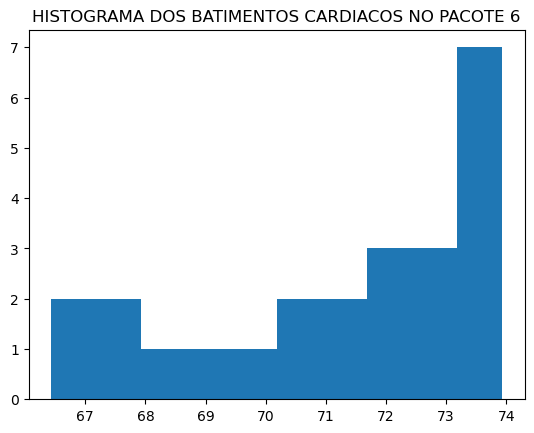

PACOTE 7: 
MMÉDIA DE BATIMENTOS: 71.18496804402442 
MEDIANA DE BATIMENTOS: 71.95446436084487 
MODA DE BATIMENTOS: 66.2472200255958 
DESVIO PADRÃO DE BATIMENTOS: 2.3786285108947602


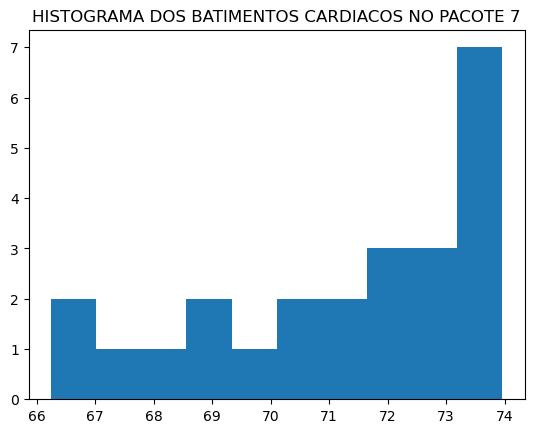

PACOTE 8: 
MMÉDIA DE BATIMENTOS: 71.20447293744998 
MEDIANA DE BATIMENTOS: 71.77122765060025 
MODA DE BATIMENTOS: 66.35526820485475 
DESVIO PADRÃO DE BATIMENTOS: 2.3613320828036146


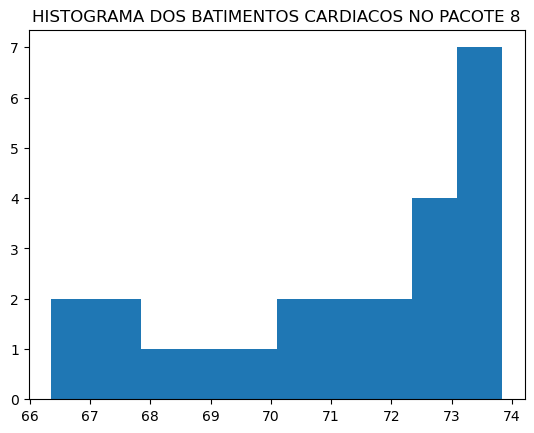

PACOTE 9: 
MMÉDIA DE BATIMENTOS: 71.15432751203826 
MEDIANA DE BATIMENTOS: 71.83799311646976 
MODA DE BATIMENTOS: 66.28469276285988 
DESVIO PADRÃO DE BATIMENTOS: 2.382862103737984


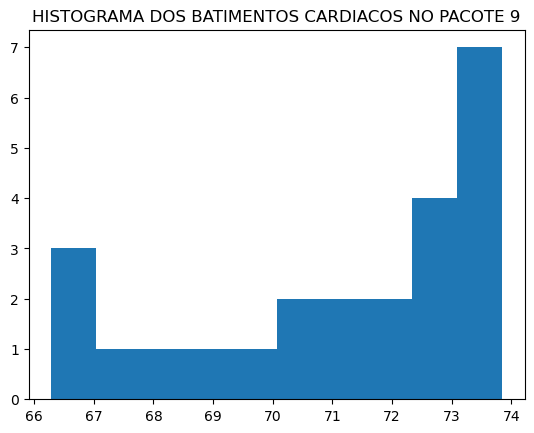

PACOTE 10: 
MMÉDIA DE BATIMENTOS: 71.1129228006587 
MEDIANA DE BATIMENTOS: 71.64749934935591 
MODA DE BATIMENTOS: 66.1876255208004 
DESVIO PADRÃO DE BATIMENTOS: 2.3995181154706704


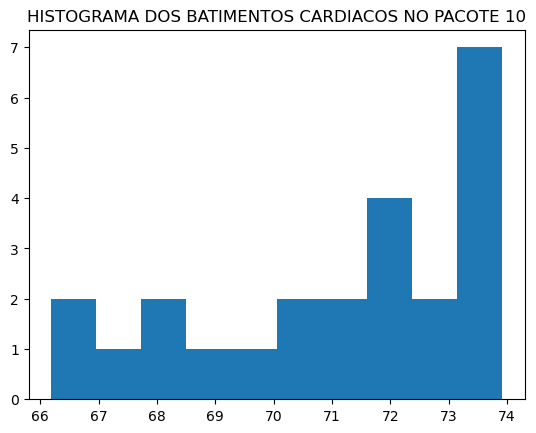

PACOTE 11: 
MMÉDIA DE BATIMENTOS: 71.1343396505893 
MEDIANA DE BATIMENTOS: 71.62775512591173 
MODA DE BATIMENTOS: 66.15173381663199 
DESVIO PADRÃO DE BATIMENTOS: 2.414905999967278


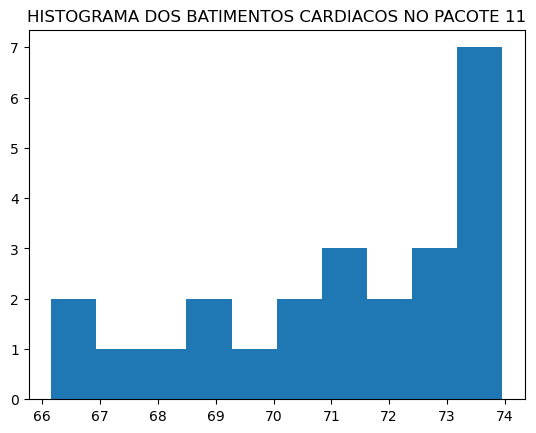

PACOTE 12: 
MMÉDIA DE BATIMENTOS: 71.09043097621186 
MEDIANA DE BATIMENTOS: 71.67559928812494 
MODA DE BATIMENTOS: 66.38411005449925 
DESVIO PADRÃO DE BATIMENTOS: 2.379569244303233


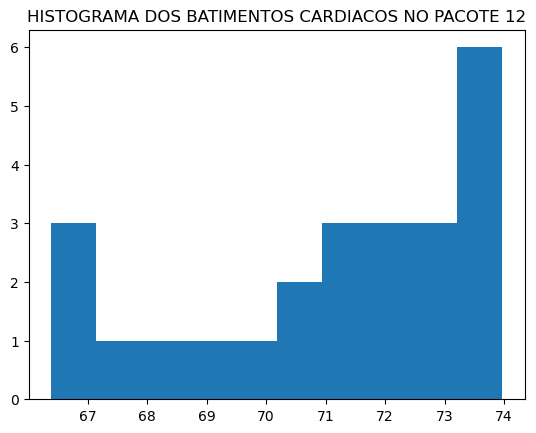

PACOTE 13: 
MMÉDIA DE BATIMENTOS: 71.0753978717119 
MEDIANA DE BATIMENTOS: 71.70664852976333 
MODA DE BATIMENTOS: 66.48564899646811 
DESVIO PADRÃO DE BATIMENTOS: 2.3027147255186096


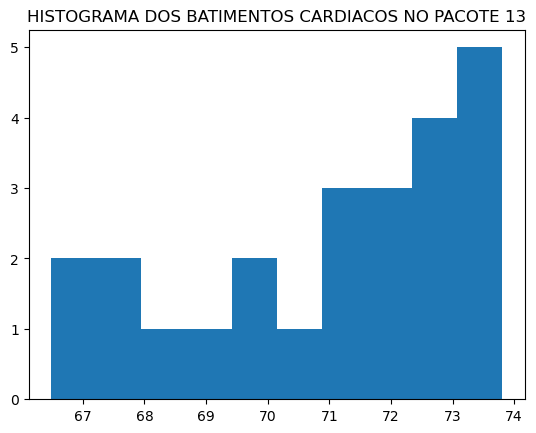

PACOTE 14: 
MMÉDIA DE BATIMENTOS: 71.01118138937038 
MEDIANA DE BATIMENTOS: 71.38912243863699 
MODA DE BATIMENTOS: 66.3483044540912 
DESVIO PADRÃO DE BATIMENTOS: 2.299885200389723


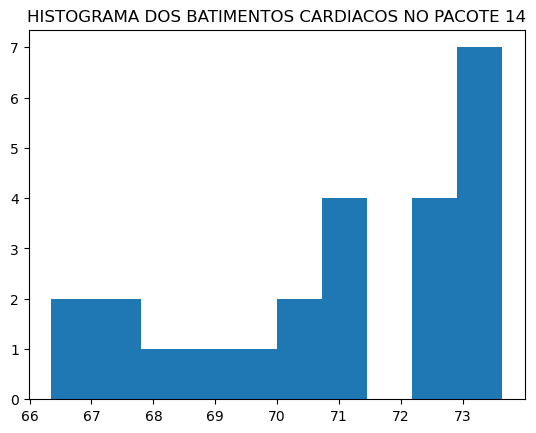

PACOTE 15: 
MMÉDIA DE BATIMENTOS: 71.04170938918004 
MEDIANA DE BATIMENTOS: 71.4819105742441 
MODA DE BATIMENTOS: 66.44689439260966 
DESVIO PADRÃO DE BATIMENTOS: 2.2986795840327208


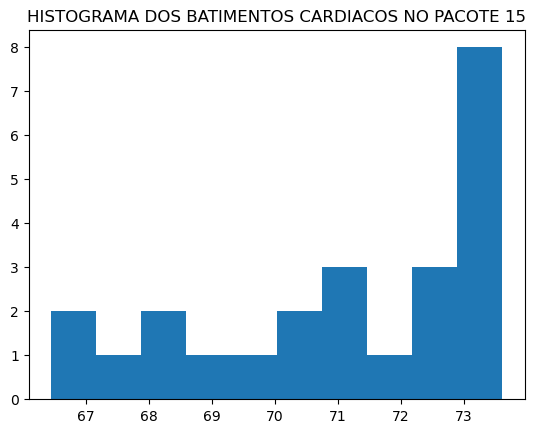

PACOTE 16: 
MMÉDIA DE BATIMENTOS: 70.9230935934807 
MEDIANA DE BATIMENTOS: 71.58638795818531 
MODA DE BATIMENTOS: 66.4796298272884 
DESVIO PADRÃO DE BATIMENTOS: 2.3921771640252105


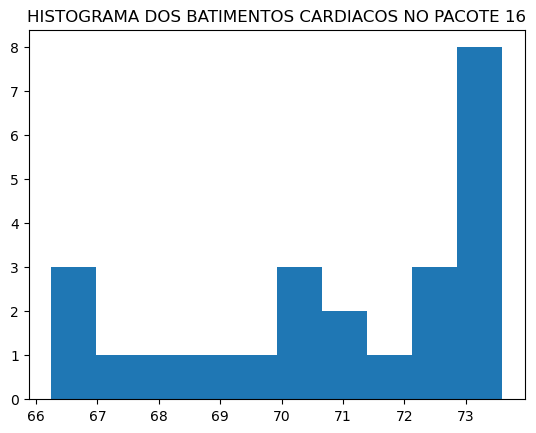

PACOTE 17: 
MMÉDIA DE BATIMENTOS: 70.83521948098283 
MEDIANA DE BATIMENTOS: 71.47971847681318 
MODA DE BATIMENTOS: 66.02928316369218 
DESVIO PADRÃO DE BATIMENTOS: 2.3933236302335787


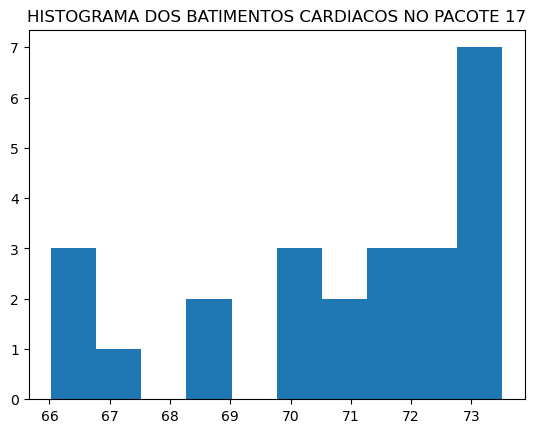

PACOTE 18: 
MMÉDIA DE BATIMENTOS: 70.93940415159113 
MEDIANA DE BATIMENTOS: 71.72265226976384 
MODA DE BATIMENTOS: 66.53387862384551 
DESVIO PADRÃO DE BATIMENTOS: 2.35506761615307


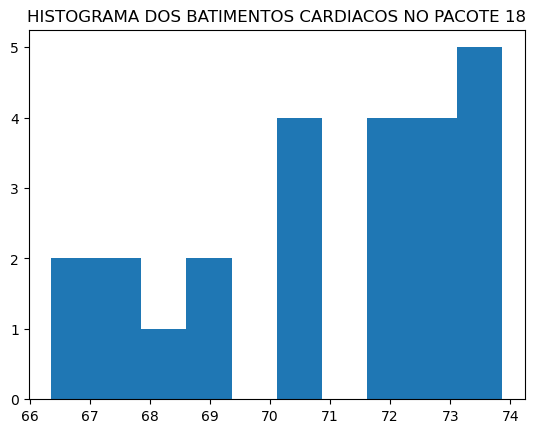

PACOTE 19: 
MMÉDIA DE BATIMENTOS: 70.85896914491347 
MEDIANA DE BATIMENTOS: 71.75409737586017 
MODA DE BATIMENTOS: 66.44513695278877 
DESVIO PADRÃO DE BATIMENTOS: 2.339754316457858


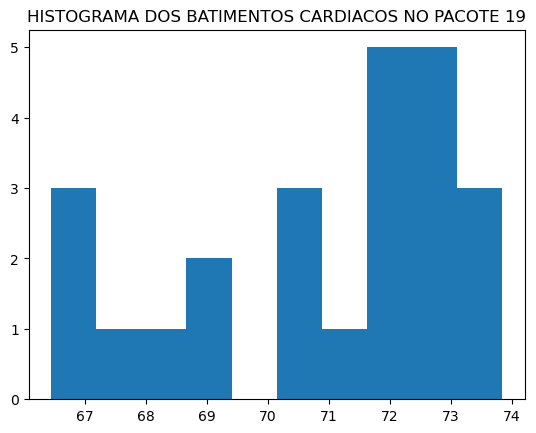

PACOTE 20: 
MMÉDIA DE BATIMENTOS: 70.80961860988835 
MEDIANA DE BATIMENTOS: 71.51696394619293 
MODA DE BATIMENTOS: 66.1234004884917 
DESVIO PADRÃO DE BATIMENTOS: 2.387399514789865


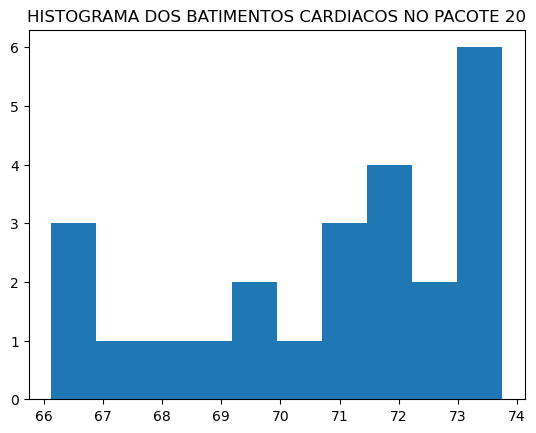

PACOTE 21: 
MMÉDIA DE BATIMENTOS: 70.81105729002313 
MEDIANA DE BATIMENTOS: 71.44817864501226 
MODA DE BATIMENTOS: 65.92914913340478 
DESVIO PADRÃO DE BATIMENTOS: 2.3035791801248506


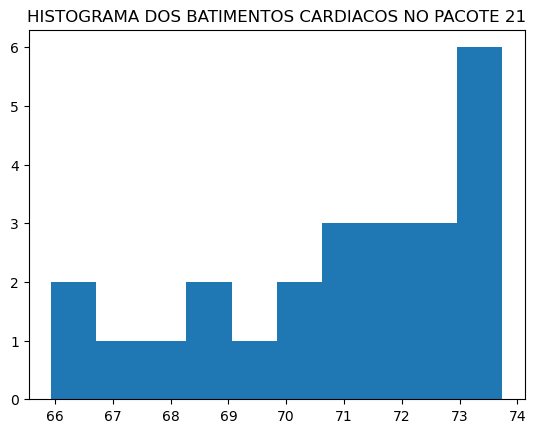

PACOTE 22: 
MMÉDIA DE BATIMENTOS: 70.8030662756389 
MEDIANA DE BATIMENTOS: 71.51108065386997 
MODA DE BATIMENTOS: 66.24031860645255 
DESVIO PADRÃO DE BATIMENTOS: 2.330886613529049


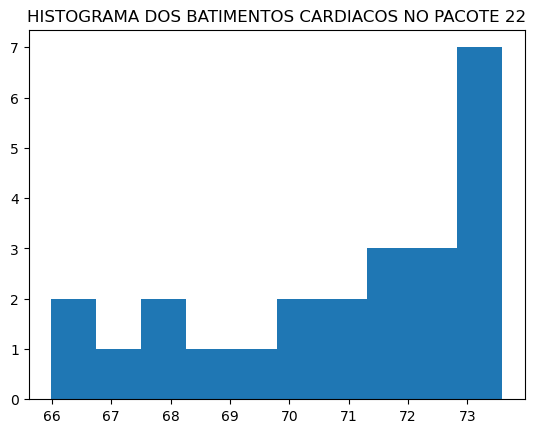

PACOTE 23: 
MMÉDIA DE BATIMENTOS: 70.69397588189047 
MEDIANA DE BATIMENTOS: 71.39465469509972 
MODA DE BATIMENTOS: 66.53376015611569 
DESVIO PADRÃO DE BATIMENTOS: 2.2794207438317495


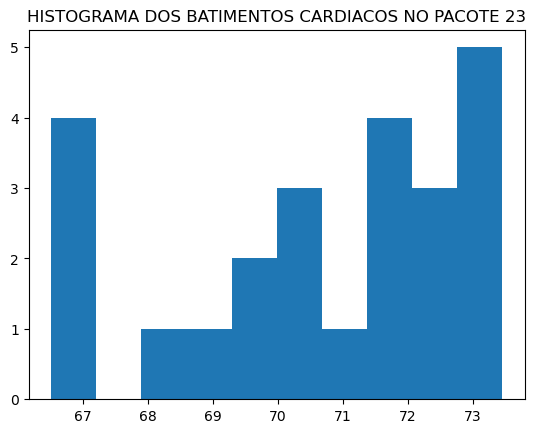

PACOTE 24: 
MMÉDIA DE BATIMENTOS: 70.81215270114507 
MEDIANA DE BATIMENTOS: 71.27475940783687 
MODA DE BATIMENTOS: 65.97634212597536 
DESVIO PADRÃO DE BATIMENTOS: 2.371665429502139


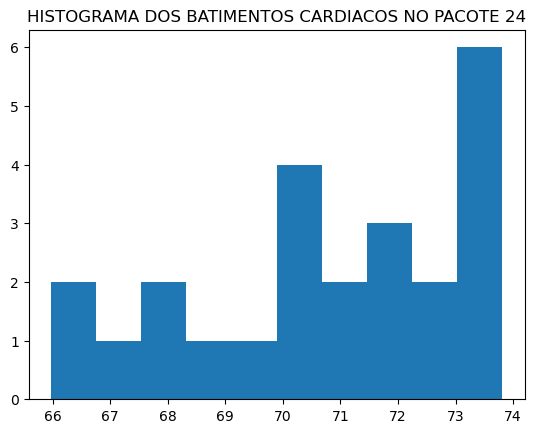

PACOTE 25: 
MMÉDIA DE BATIMENTOS: 70.70521788785004 
MEDIANA DE BATIMENTOS: 71.30432335584698 
MODA DE BATIMENTOS: 65.88844890237927 
DESVIO PADRÃO DE BATIMENTOS: 2.315118653670329


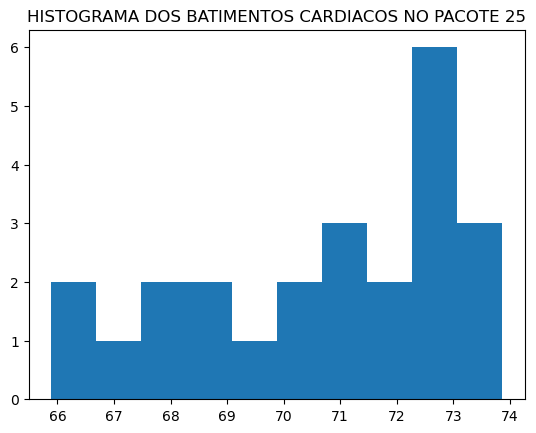

PACOTE 26: 
MMÉDIA DE BATIMENTOS: 70.80369873783381 
MEDIANA DE BATIMENTOS: 71.44193139088321 
MODA DE BATIMENTOS: 65.68262951437094 
DESVIO PADRÃO DE BATIMENTOS: 2.3458796310617562


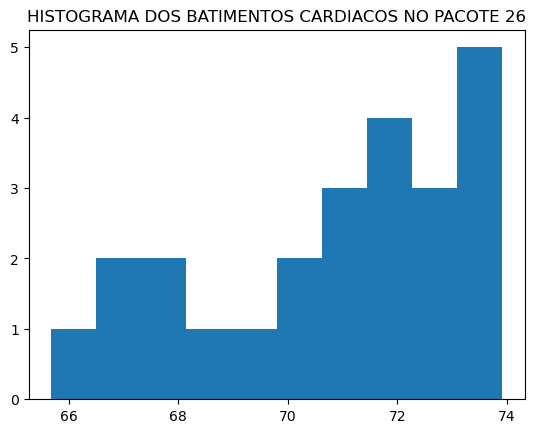

PACOTE 27: 
MMÉDIA DE BATIMENTOS: 70.74636710877782 
MEDIANA DE BATIMENTOS: 71.41935554272123 
MODA DE BATIMENTOS: 66.0582716386909 
DESVIO PADRÃO DE BATIMENTOS: 2.4753268234348904


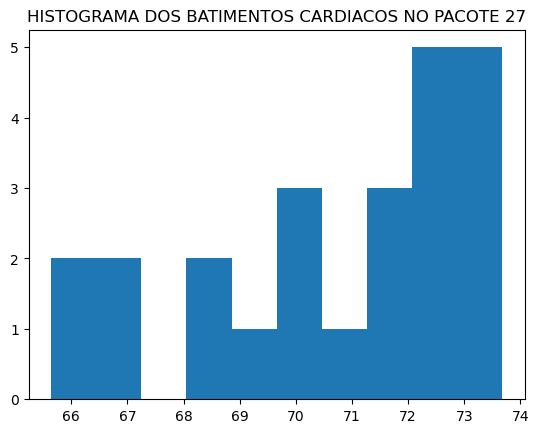

PACOTE 28: 
MMÉDIA DE BATIMENTOS: 70.66321337674715 
MEDIANA DE BATIMENTOS: 71.62094033750478 
MODA DE BATIMENTOS: 65.66949294273925 
DESVIO PADRÃO DE BATIMENTOS: 2.4212371722513835


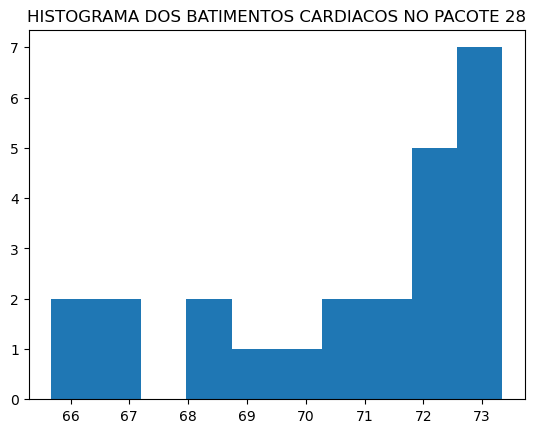

PACOTE 29: 
MMÉDIA DE BATIMENTOS: 70.52115974097724 
MEDIANA DE BATIMENTOS: 71.45836358447883 
MODA DE BATIMENTOS: 65.30384986415658 
DESVIO PADRÃO DE BATIMENTOS: 2.491625568471024


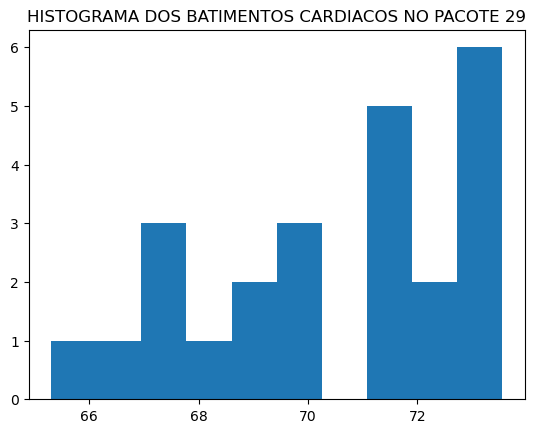

PACOTE 30: 
MMÉDIA DE BATIMENTOS: 70.50409550239603 
MEDIANA DE BATIMENTOS: 71.13013072957884 
MODA DE BATIMENTOS: 65.97167888324793 
DESVIO PADRÃO DE BATIMENTOS: 2.3877411363658156


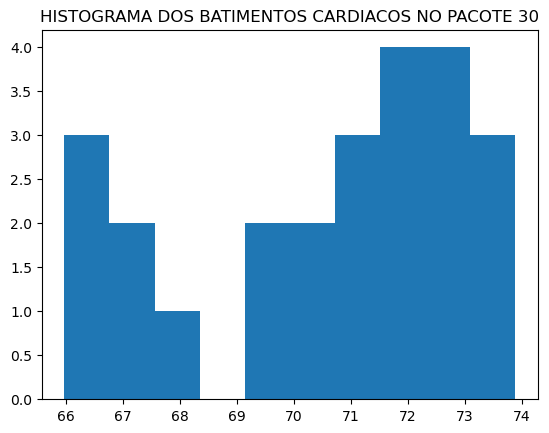

PACOTE 31: 
MMÉDIA DE BATIMENTOS: 70.55875550349224 
MEDIANA DE BATIMENTOS: 71.24436243293522 
MODA DE BATIMENTOS: 65.47174095236122 
DESVIO PADRÃO DE BATIMENTOS: 2.494478874298153


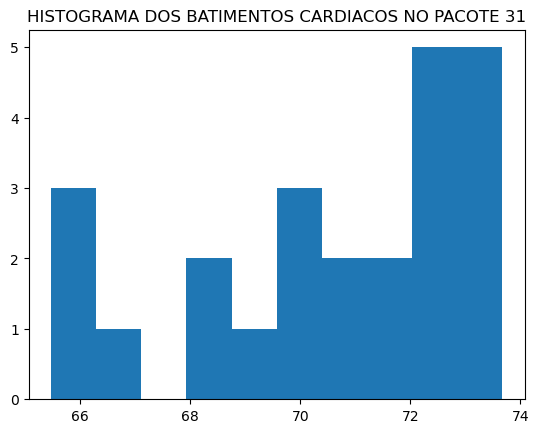

PACOTE 32: 
MMÉDIA DE BATIMENTOS: 70.65364486713995 
MEDIANA DE BATIMENTOS: 71.23549709468546 
MODA DE BATIMENTOS: 65.5592389386921 
DESVIO PADRÃO DE BATIMENTOS: 2.382445411765985


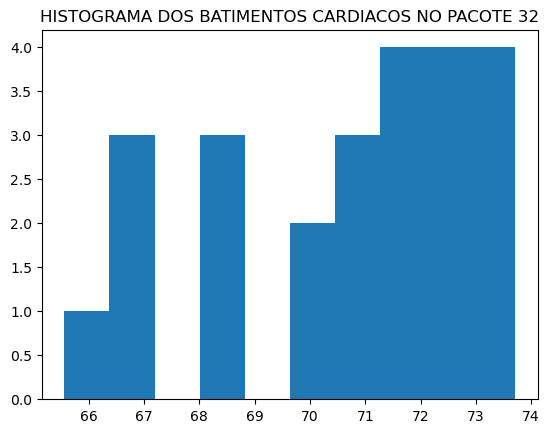

PACOTE 33: 
MMÉDIA DE BATIMENTOS: 70.5069180457997 
MEDIANA DE BATIMENTOS: 71.14193598143459 
MODA DE BATIMENTOS: 65.61864973517768 
DESVIO PADRÃO DE BATIMENTOS: 2.3978672814566395


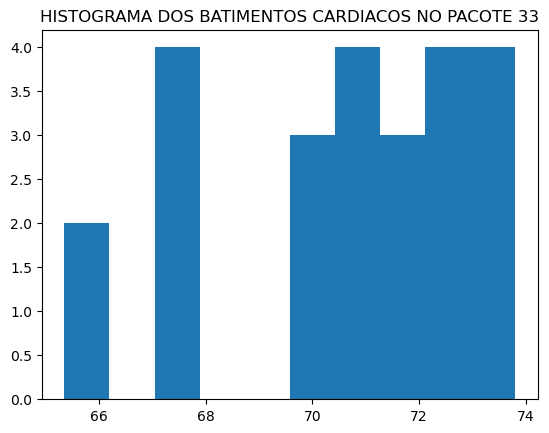

PACOTE 34: 
MMÉDIA DE BATIMENTOS: 70.53675564534636 
MEDIANA DE BATIMENTOS: 71.54467128556948 
MODA DE BATIMENTOS: 65.0072204689596 
DESVIO PADRÃO DE BATIMENTOS: 2.5080681543339676


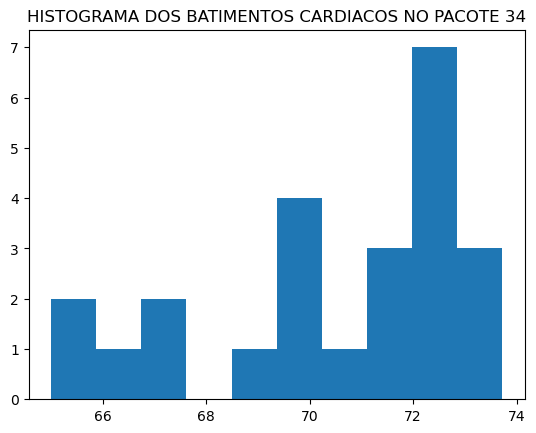

PACOTE 35: 
MMÉDIA DE BATIMENTOS: 70.52431283932721 
MEDIANA DE BATIMENTOS: 71.05085075331039 
MODA DE BATIMENTOS: 66.13560946277701 
DESVIO PADRÃO DE BATIMENTOS: 2.1760326420912044


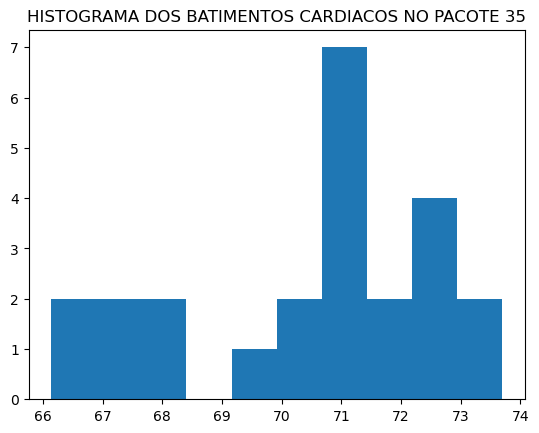

PACOTE 36: 
MMÉDIA DE BATIMENTOS: 70.53867681908747 
MEDIANA DE BATIMENTOS: 71.1344189418785 
MODA DE BATIMENTOS: 65.22682961948604 
DESVIO PADRÃO DE BATIMENTOS: 2.3887396807857124


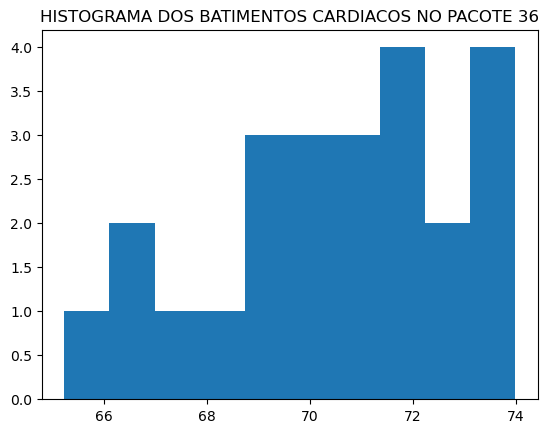

PACOTE 37: 
MMÉDIA DE BATIMENTOS: 70.56743800591036 
MEDIANA DE BATIMENTOS: 70.965815953038 
MODA DE BATIMENTOS: 65.45407568302028 
DESVIO PADRÃO DE BATIMENTOS: 2.388664385375553


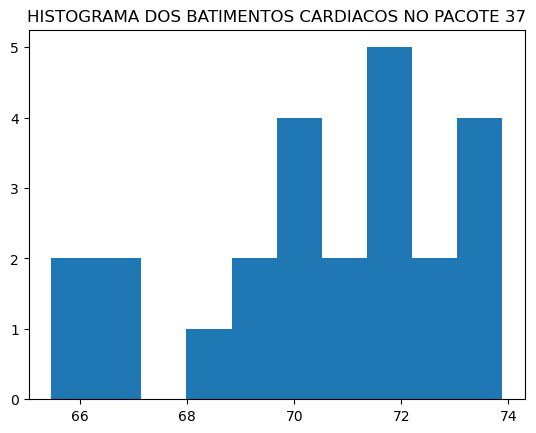

PACOTE 38: 
MMÉDIA DE BATIMENTOS: 70.32182068200784 
MEDIANA DE BATIMENTOS: 71.07416471481409 
MODA DE BATIMENTOS: 65.91551784951105 
DESVIO PADRÃO DE BATIMENTOS: 2.473434181736829


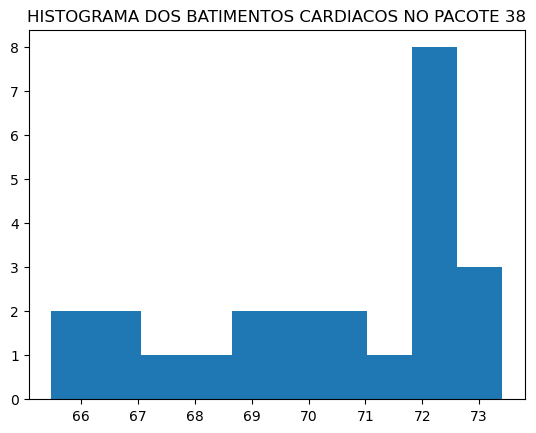

PACOTE 39: 
MMÉDIA DE BATIMENTOS: 70.36348478739313 
MEDIANA DE BATIMENTOS: 71.14003722115743 
MODA DE BATIMENTOS: 65.13772469878863 
DESVIO PADRÃO DE BATIMENTOS: 2.576460503286488


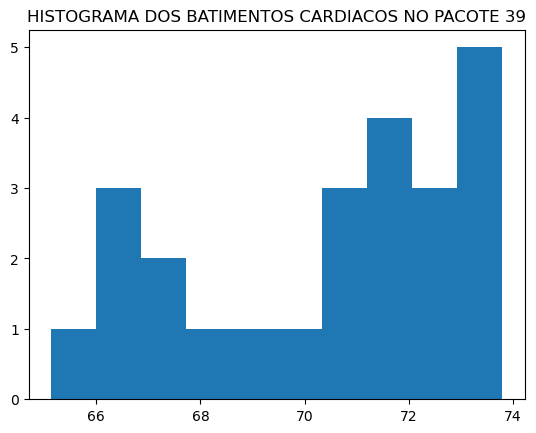

PACOTE 40: 
MMÉDIA DE BATIMENTOS: 71.79389681256121 
MEDIANA DE BATIMENTOS: 71.06398552804315 
MODA DE BATIMENTOS: 65.85436801760072 
DESVIO PADRÃO DE BATIMENTOS: 6.67053501193183


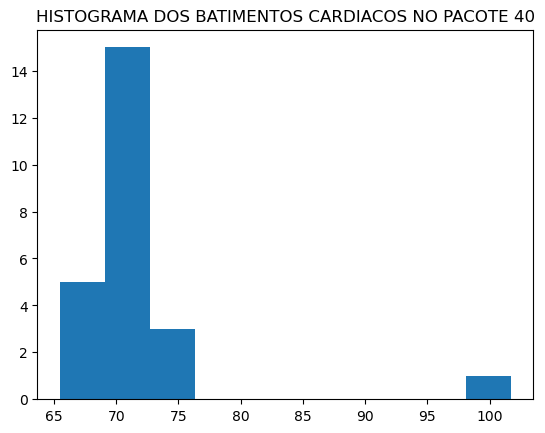

PACOTE 41: 
MMÉDIA DE BATIMENTOS: 70.41416734404002 
MEDIANA DE BATIMENTOS: 71.32481703398264 
MODA DE BATIMENTOS: 65.91059983468888 
DESVIO PADRÃO DE BATIMENTOS: 2.3190220427880224


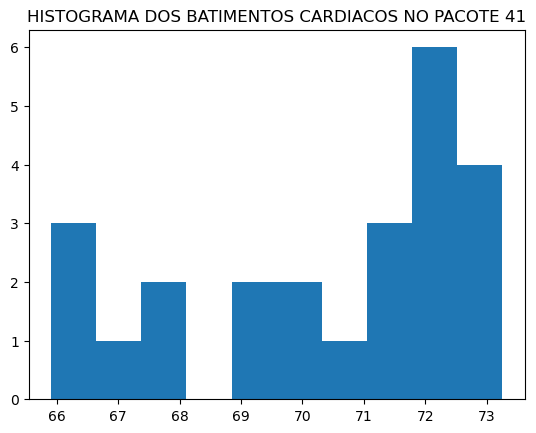

PACOTE 42: 
MMÉDIA DE BATIMENTOS: 70.31011929930465 
MEDIANA DE BATIMENTOS: 70.8324248575918 
MODA DE BATIMENTOS: 65.01565589248564 
DESVIO PADRÃO DE BATIMENTOS: 2.456061629143447


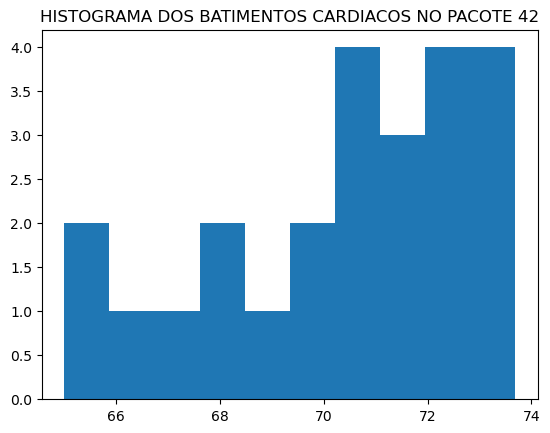

PACOTE 43: 
MMÉDIA DE BATIMENTOS: 70.11559058390331 
MEDIANA DE BATIMENTOS: 70.80298429687784 
MODA DE BATIMENTOS: 64.53697014804308 
DESVIO PADRÃO DE BATIMENTOS: 2.610572938702189


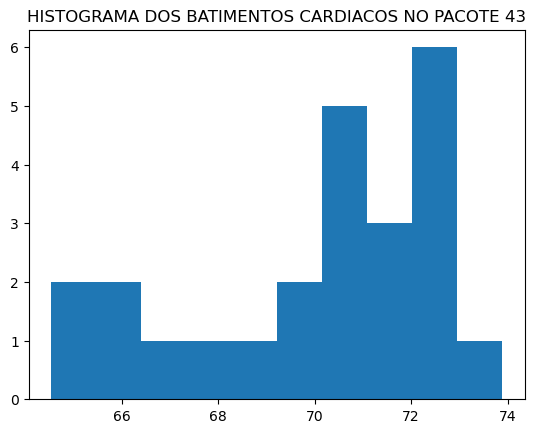

PACOTE 44: 
MMÉDIA DE BATIMENTOS: 70.33876041823665 
MEDIANA DE BATIMENTOS: 70.83239914796229 
MODA DE BATIMENTOS: 64.60425544984234 
DESVIO PADRÃO DE BATIMENTOS: 2.4977260289192995


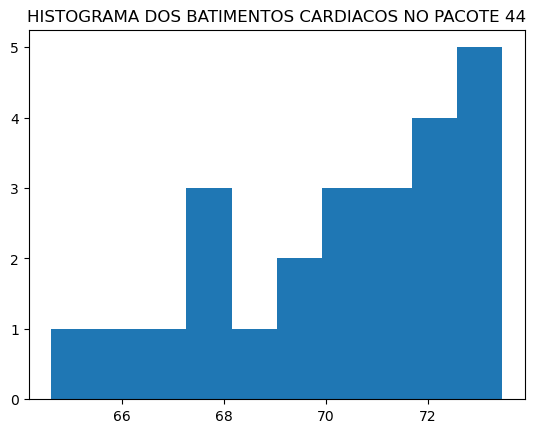

PACOTE 45: 
MMÉDIA DE BATIMENTOS: 70.20532338566305 
MEDIANA DE BATIMENTOS: 70.95000432490305 
MODA DE BATIMENTOS: 65.56889791785906 
DESVIO PADRÃO DE BATIMENTOS: 2.633052831638198


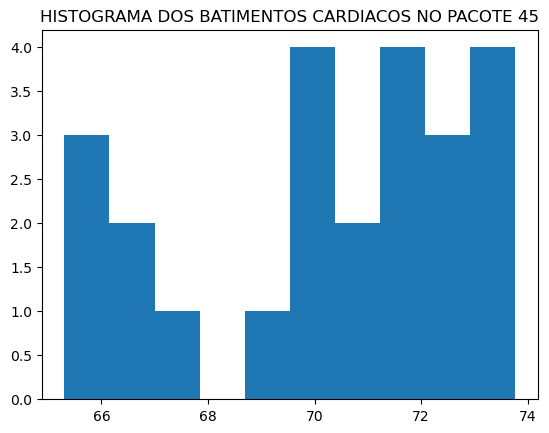

PACOTE 46: 
MMÉDIA DE BATIMENTOS: 70.21559754629344 
MEDIANA DE BATIMENTOS: 70.89838924117845 
MODA DE BATIMENTOS: 64.95756659300149 
DESVIO PADRÃO DE BATIMENTOS: 2.727359903887294


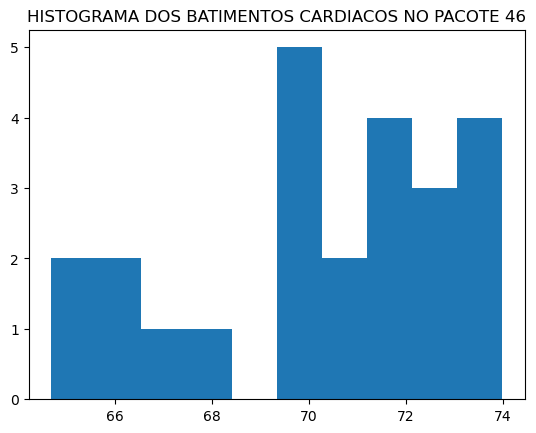

PACOTE 47: 
MMÉDIA DE BATIMENTOS: 70.15876717148367 
MEDIANA DE BATIMENTOS: 70.61317714043838 
MODA DE BATIMENTOS: 65.72678929045222 
DESVIO PADRÃO DE BATIMENTOS: 2.316744322324402


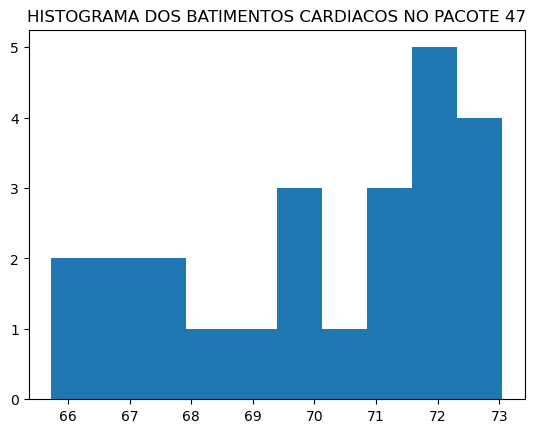

PACOTE 48: 
MMÉDIA DE BATIMENTOS: 70.38141963873748 
MEDIANA DE BATIMENTOS: 70.75473389795879 
MODA DE BATIMENTOS: 66.25993452828874 
DESVIO PADRÃO DE BATIMENTOS: 2.3970291041450036


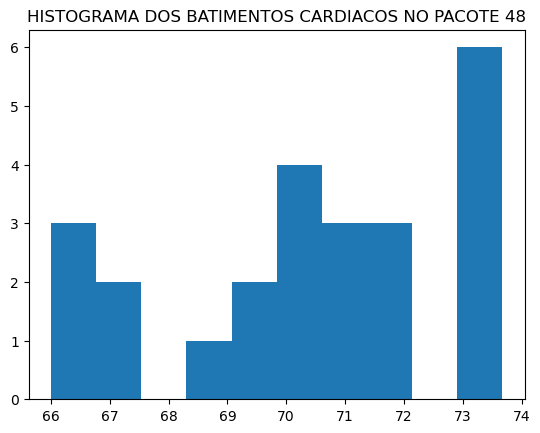

PACOTE 49: 
MMÉDIA DE BATIMENTOS: 70.11813714307634 
MEDIANA DE BATIMENTOS: 70.62962047165495 
MODA DE BATIMENTOS: 64.75520686862235 
DESVIO PADRÃO DE BATIMENTOS: 2.333942223695505


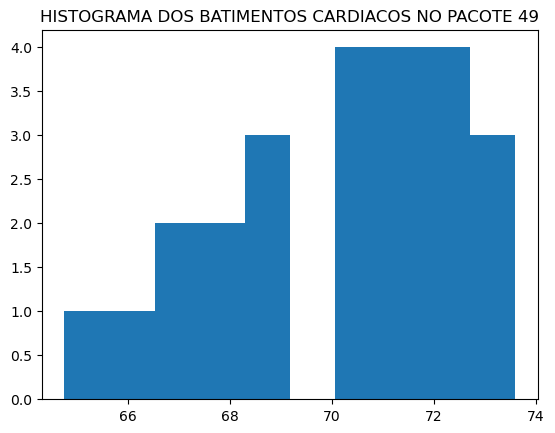

PACOTE 50: 
MMÉDIA DE BATIMENTOS: 70.09318236304048 
MEDIANA DE BATIMENTOS: 70.69391394805416 
MODA DE BATIMENTOS: 64.20219421203605 
DESVIO PADRÃO DE BATIMENTOS: 2.6865833039917737


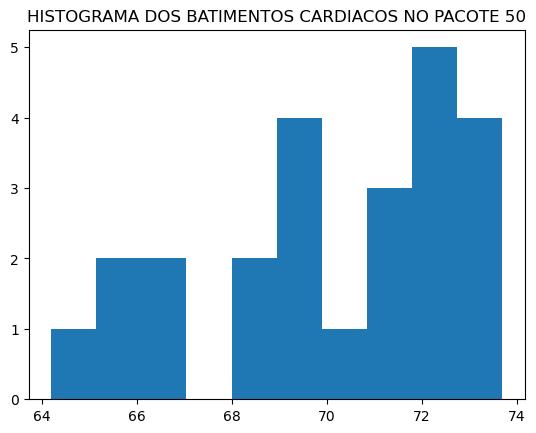

PACOTE 51: 
MMÉDIA DE BATIMENTOS: 69.77987721435109 
MEDIANA DE BATIMENTOS: 70.43694380617123 
MODA DE BATIMENTOS: 64.39131565975715 
DESVIO PADRÃO DE BATIMENTOS: 2.405602766860954


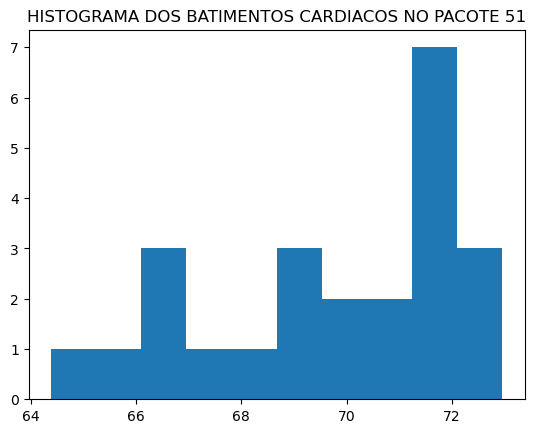

PACOTE 52: 
MMÉDIA DE BATIMENTOS: 70.03121926592007 
MEDIANA DE BATIMENTOS: 70.20612841400788 
MODA DE BATIMENTOS: 64.65618467467847 
DESVIO PADRÃO DE BATIMENTOS: 2.588568266784427


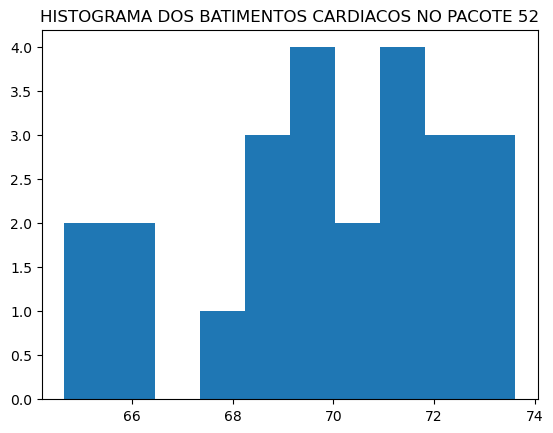

PACOTE 53: 
MMÉDIA DE BATIMENTOS: 70.10697106060381 
MEDIANA DE BATIMENTOS: 70.64915059151251 
MODA DE BATIMENTOS: 64.89996852127801 
DESVIO PADRÃO DE BATIMENTOS: 2.4686704737559597


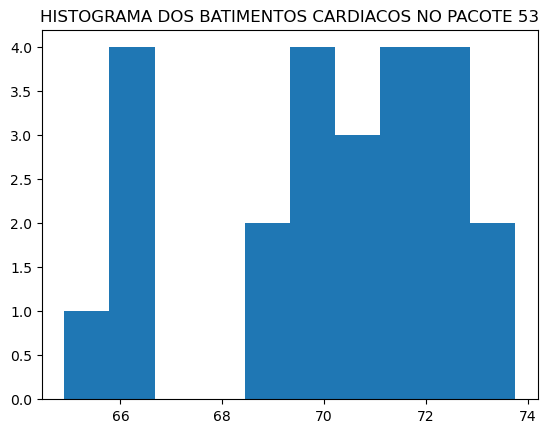

PACOTE 54: 
MMÉDIA DE BATIMENTOS: 70.03794421596048 
MEDIANA DE BATIMENTOS: 70.44957451528467 
MODA DE BATIMENTOS: 65.05237405605757 
DESVIO PADRÃO DE BATIMENTOS: 2.209776686743987


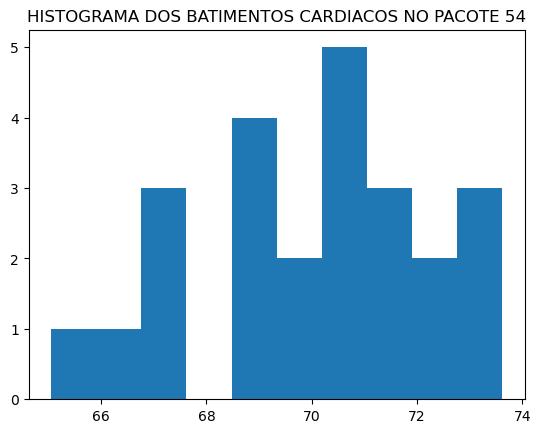

PACOTE 55: 
MMÉDIA DE BATIMENTOS: 69.77046259062827 
MEDIANA DE BATIMENTOS: 70.17961502017513 
MODA DE BATIMENTOS: 65.86619733839638 
DESVIO PADRÃO DE BATIMENTOS: 2.6081737297361025


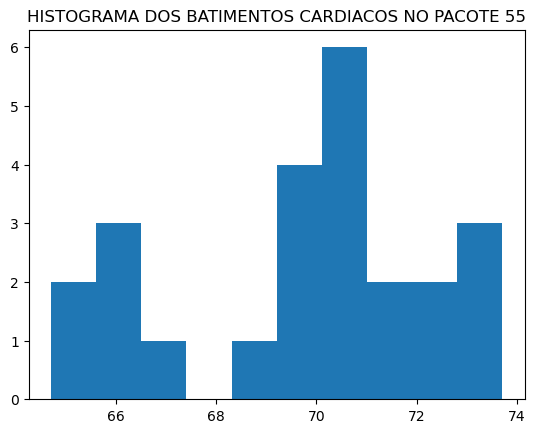

PACOTE 56: 
MMÉDIA DE BATIMENTOS: 70.09758960311198 
MEDIANA DE BATIMENTOS: 70.57401321847212 
MODA DE BATIMENTOS: 66.49388278996805 
DESVIO PADRÃO DE BATIMENTOS: 2.283131308565884


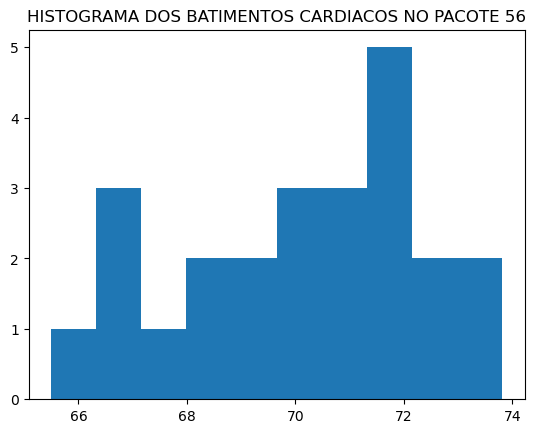

PACOTE 57: 
MMÉDIA DE BATIMENTOS: 70.13056249163138 
MEDIANA DE BATIMENTOS: 70.43828715325924 
MODA DE BATIMENTOS: 65.60903891479953 
DESVIO PADRÃO DE BATIMENTOS: 2.286072743939349


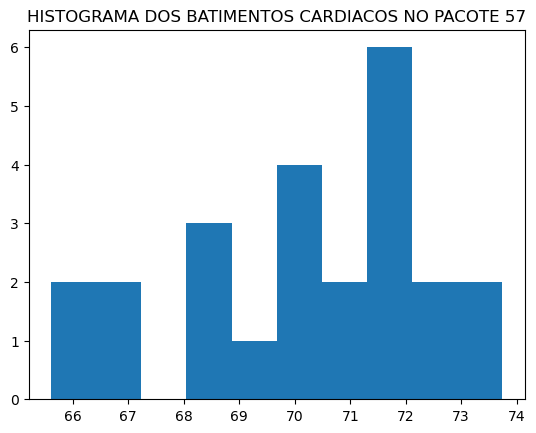

PACOTE 58: 
MMÉDIA DE BATIMENTOS: 71.27929657186813 
MEDIANA DE BATIMENTOS: 70.5227593654584 
MODA DE BATIMENTOS: 65.35139692985541 
DESVIO PADRÃO DE BATIMENTOS: 6.672130212912255


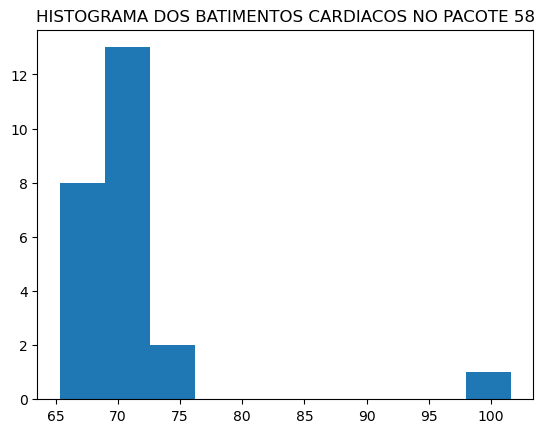

PACOTE 59: 
MMÉDIA DE BATIMENTOS: 69.92879506973628 
MEDIANA DE BATIMENTOS: 70.59476061059262 
MODA DE BATIMENTOS: 64.05731038199934 
DESVIO PADRÃO DE BATIMENTOS: 2.499348521748038


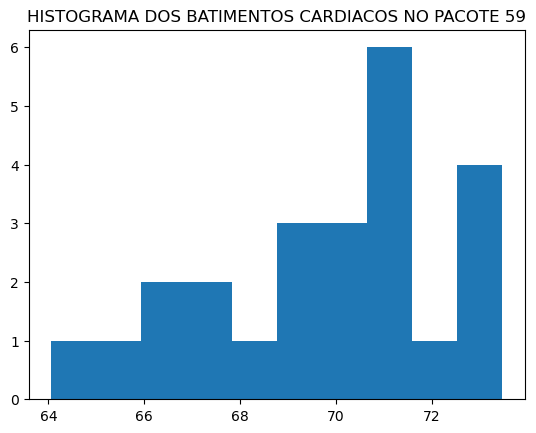

PACOTE 60: 
MMÉDIA DE BATIMENTOS: 69.83168718256688 
MEDIANA DE BATIMENTOS: 70.7015317173398 
MODA DE BATIMENTOS: 64.03841705141461 
DESVIO PADRÃO DE BATIMENTOS: 2.5694956381193625


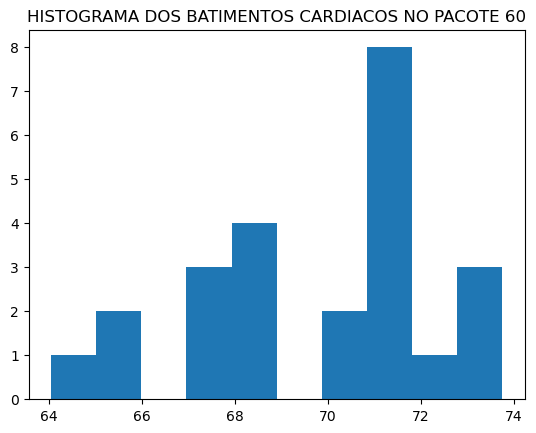

PACOTE 61: 
MMÉDIA DE BATIMENTOS: 69.70448234786853 
MEDIANA DE BATIMENTOS: 69.9942481450233 
MODA DE BATIMENTOS: 64.33035233047913 
DESVIO PADRÃO DE BATIMENTOS: 2.4327775682370416


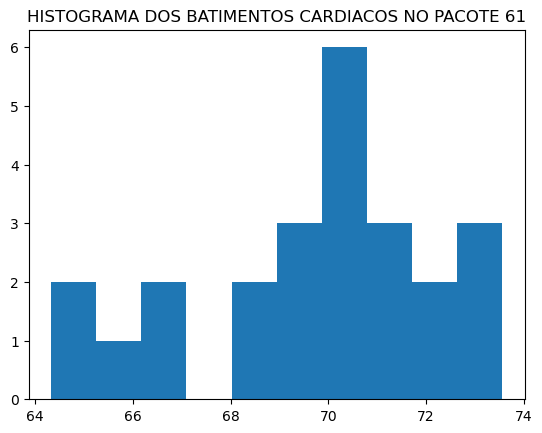

PACOTE 62: 
MMÉDIA DE BATIMENTOS: 70.1385970681787 
MEDIANA DE BATIMENTOS: 70.78614557312252 
MODA DE BATIMENTOS: 66.37888750298818 
DESVIO PADRÃO DE BATIMENTOS: 2.548730248051261


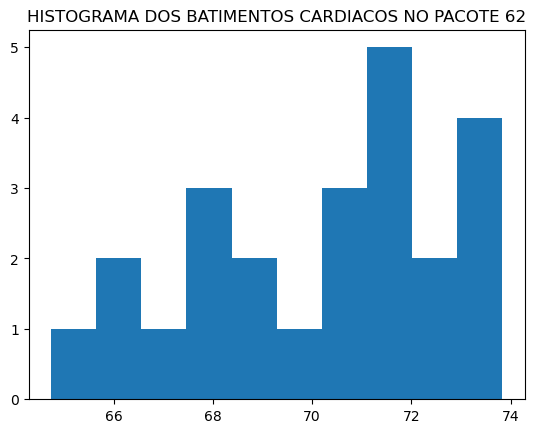

PACOTE 63: 
MMÉDIA DE BATIMENTOS: 69.70470990453173 
MEDIANA DE BATIMENTOS: 70.41132749136875 
MODA DE BATIMENTOS: 65.47245096301272 
DESVIO PADRÃO DE BATIMENTOS: 2.5924552172291198


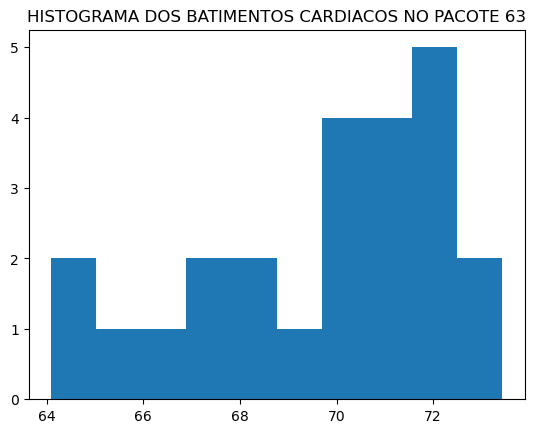

PACOTE 64: 
MMÉDIA DE BATIMENTOS: 69.79001632524356 
MEDIANA DE BATIMENTOS: 70.69836124889261 
MODA DE BATIMENTOS: 66.07256508626635 
DESVIO PADRÃO DE BATIMENTOS: 2.6802647602293885


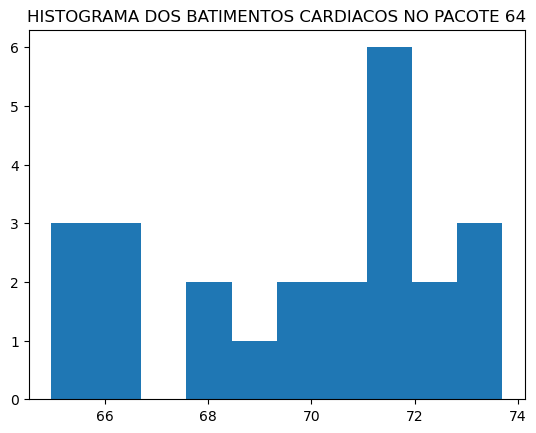

PACOTE 65: 
MMÉDIA DE BATIMENTOS: 69.87821049923724 
MEDIANA DE BATIMENTOS: 70.3163753374935 
MODA DE BATIMENTOS: 64.01198176161012 
DESVIO PADRÃO DE BATIMENTOS: 2.3426414771040287


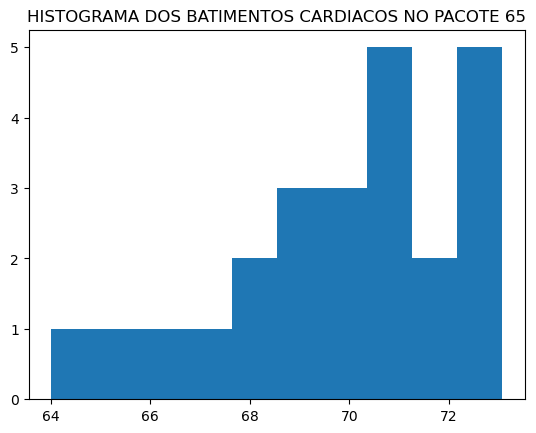

PACOTE 66: 
MMÉDIA DE BATIMENTOS: 69.49172045171382 
MEDIANA DE BATIMENTOS: 70.02226791408881 
MODA DE BATIMENTOS: 65.05141736543789 
DESVIO PADRÃO DE BATIMENTOS: 2.5976177297684035


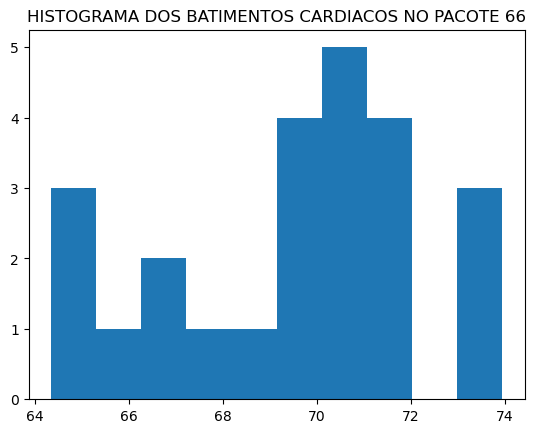

PACOTE 67: 
MMÉDIA DE BATIMENTOS: 70.00555330655463 
MEDIANA DE BATIMENTOS: 70.72905516044301 
MODA DE BATIMENTOS: 63.71711128694047 
DESVIO PADRÃO DE BATIMENTOS: 2.70534072184787


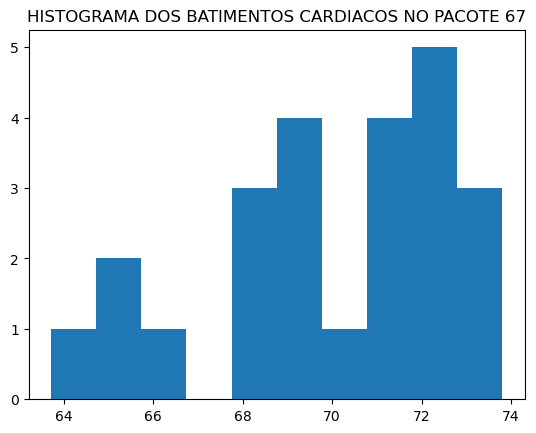

PACOTE 68: 
MMÉDIA DE BATIMENTOS: 69.89836179713576 
MEDIANA DE BATIMENTOS: 70.69461264079777 
MODA DE BATIMENTOS: 63.23368923251178 
DESVIO PADRÃO DE BATIMENTOS: 2.7877110890511925


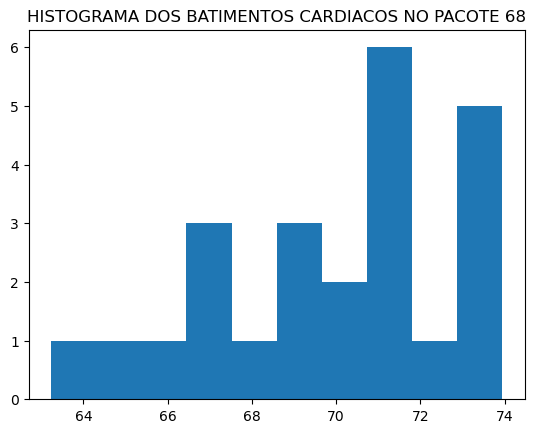

PACOTE 69: 
MMÉDIA DE BATIMENTOS: 69.6398901743642 
MEDIANA DE BATIMENTOS: 70.35978136659264 
MODA DE BATIMENTOS: 64.90796673296632 
DESVIO PADRÃO DE BATIMENTOS: 2.638008729164959


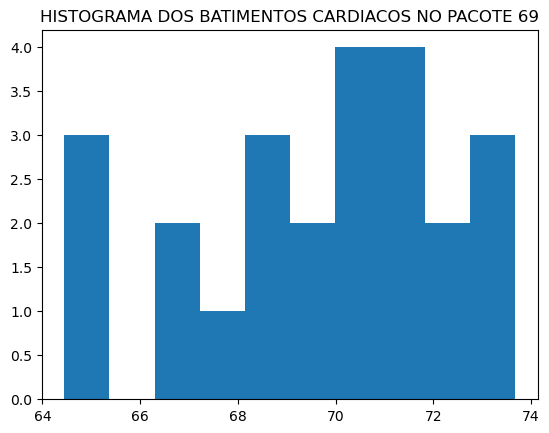

PACOTE 70: 
MMÉDIA DE BATIMENTOS: 70.03738432977197 
MEDIANA DE BATIMENTOS: 70.35967920740322 
MODA DE BATIMENTOS: 65.9475732123542 
DESVIO PADRÃO DE BATIMENTOS: 2.622769425825032


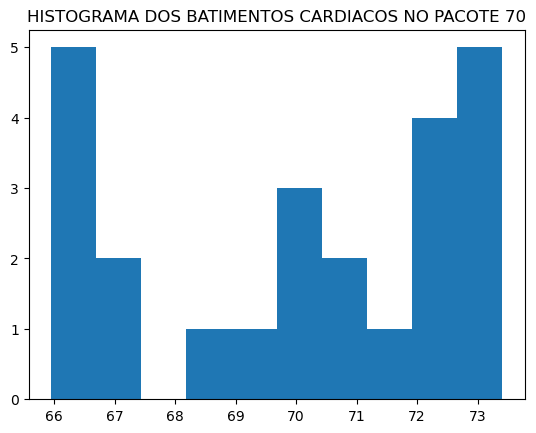

PACOTE 71: 
MMÉDIA DE BATIMENTOS: 69.5733341505208 
MEDIANA DE BATIMENTOS: 70.03784131388315 
MODA DE BATIMENTOS: 63.69444235923995 
DESVIO PADRÃO DE BATIMENTOS: 2.3918296770080025


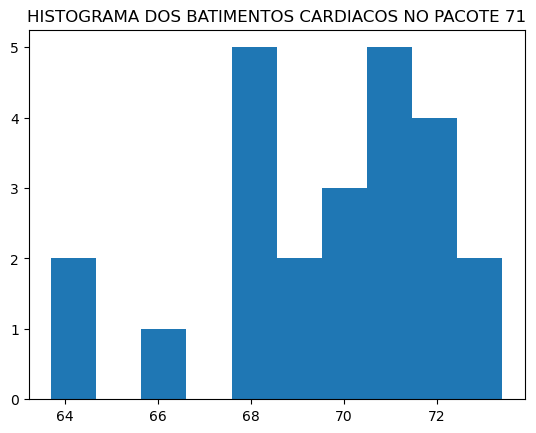

PACOTE 72: 
MMÉDIA DE BATIMENTOS: 69.58730203314042 
MEDIANA DE BATIMENTOS: 70.69508299248315 
MODA DE BATIMENTOS: 64.5097847671417 
DESVIO PADRÃO DE BATIMENTOS: 2.5239148419483826


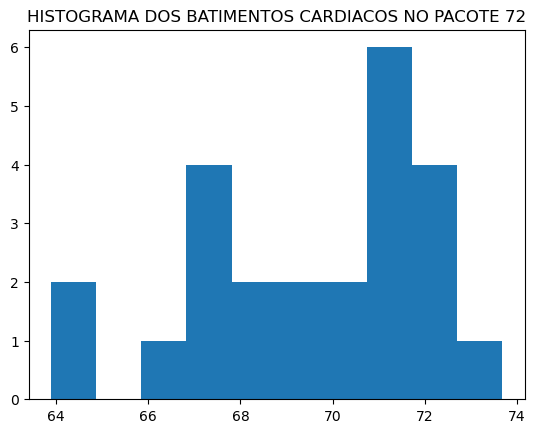

PACOTE 73: 
MMÉDIA DE BATIMENTOS: 69.46112896006088 
MEDIANA DE BATIMENTOS: 69.18288312790003 
MODA DE BATIMENTOS: 65.91441726490156 
DESVIO PADRÃO DE BATIMENTOS: 2.55571165778377


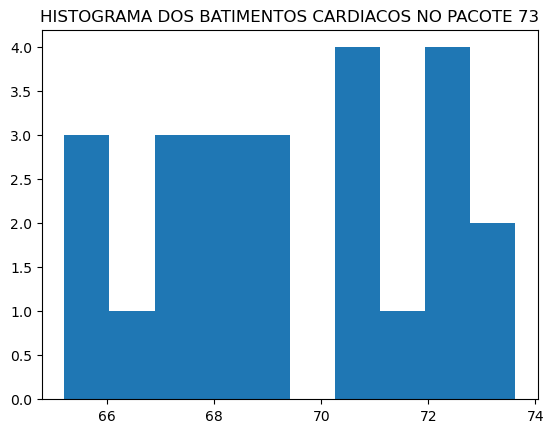

PACOTE 74: 
MMÉDIA DE BATIMENTOS: 69.43332978100466 
MEDIANA DE BATIMENTOS: 70.57951843126828 
MODA DE BATIMENTOS: 64.96814175255983 
DESVIO PADRÃO DE BATIMENTOS: 2.9259203726128495


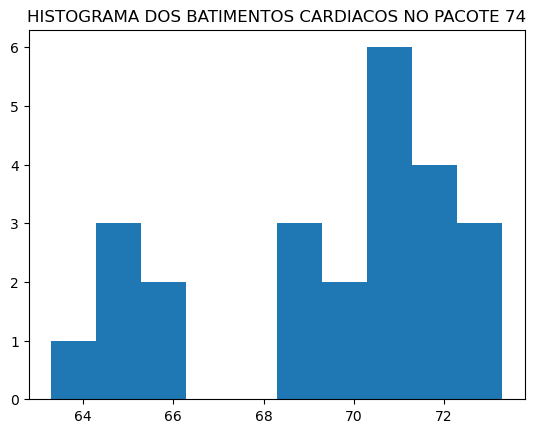

PACOTE 75: 
MMÉDIA DE BATIMENTOS: 70.57164254424104 
MEDIANA DE BATIMENTOS: 70.19598351445265 
MODA DE BATIMENTOS: 64.20186068965279 
DESVIO PADRÃO DE BATIMENTOS: 6.919664105894063


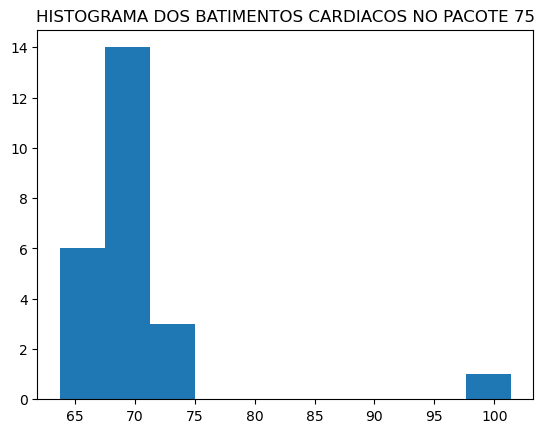

PACOTE 76: 
MMÉDIA DE BATIMENTOS: 69.16251101622868 
MEDIANA DE BATIMENTOS: 69.21195918592483 
MODA DE BATIMENTOS: 66.15133746613823 
DESVIO PADRÃO DE BATIMENTOS: 2.4706474824497193


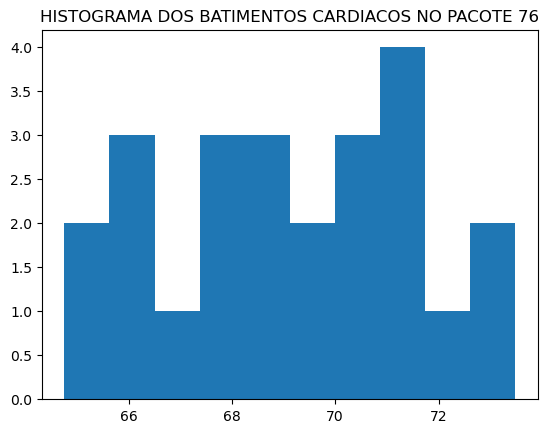

PACOTE 77: 
MMÉDIA DE BATIMENTOS: 69.30926846541315 
MEDIANA DE BATIMENTOS: 70.25080167259102 
MODA DE BATIMENTOS: 62.79983781715603 
DESVIO PADRÃO DE BATIMENTOS: 2.7427730594832354


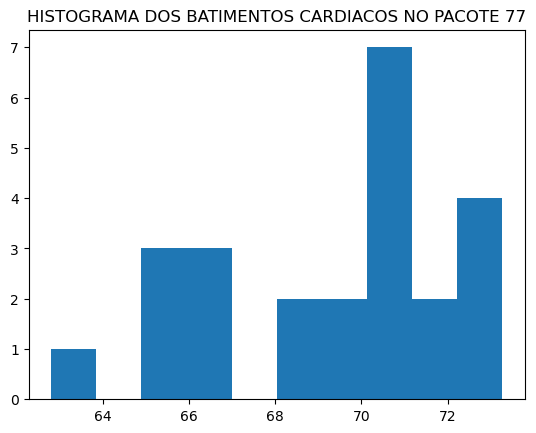

PACOTE 78: 
MMÉDIA DE BATIMENTOS: 69.6442187288453 
MEDIANA DE BATIMENTOS: 69.7714864210773 
MODA DE BATIMENTOS: 63.73288128077815 
DESVIO PADRÃO DE BATIMENTOS: 2.6976954821894696


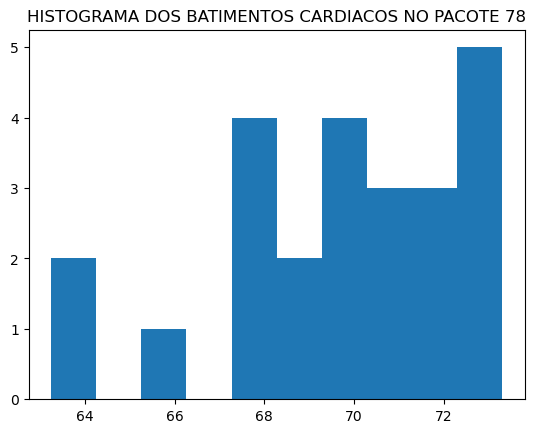

PACOTE 79: 
MMÉDIA DE BATIMENTOS: 69.40141355123589 
MEDIANA DE BATIMENTOS: 70.12619629261914 
MODA DE BATIMENTOS: 64.7375123906858 
DESVIO PADRÃO DE BATIMENTOS: 2.6657251821578063


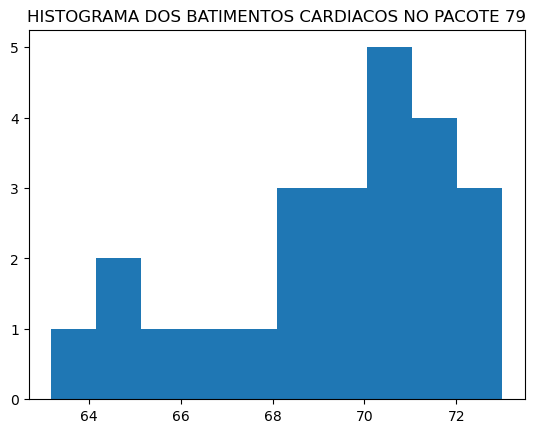

PACOTE 80: 
MMÉDIA DE BATIMENTOS: 69.26997416195327 
MEDIANA DE BATIMENTOS: 69.78270093693416 
MODA DE BATIMENTOS: 63.23734552389497 
DESVIO PADRÃO DE BATIMENTOS: 2.4830183910591725


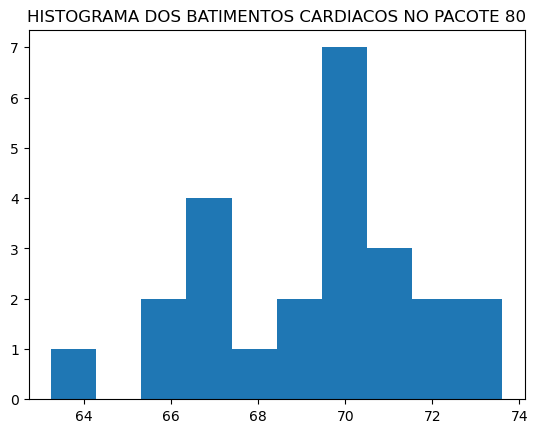

PACOTE 81: 
MMÉDIA DE BATIMENTOS: 69.62601096212946 
MEDIANA DE BATIMENTOS: 69.61559471836364 
MODA DE BATIMENTOS: 66.23105073284215 
DESVIO PADRÃO DE BATIMENTOS: 2.309740506585799


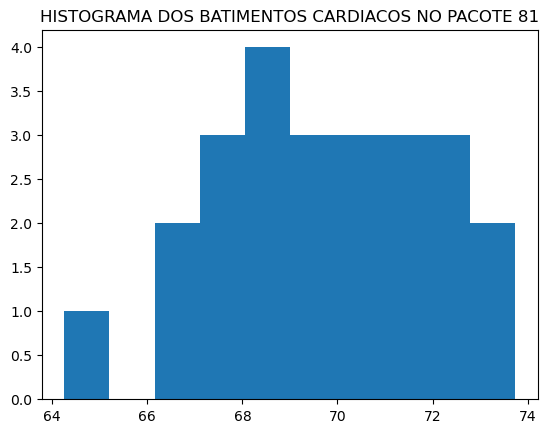

PACOTE 82: 
MMÉDIA DE BATIMENTOS: 69.41593467085762 
MEDIANA DE BATIMENTOS: 70.7761793018687 
MODA DE BATIMENTOS: 63.78895892636599 
DESVIO PADRÃO DE BATIMENTOS: 2.9050593322793543


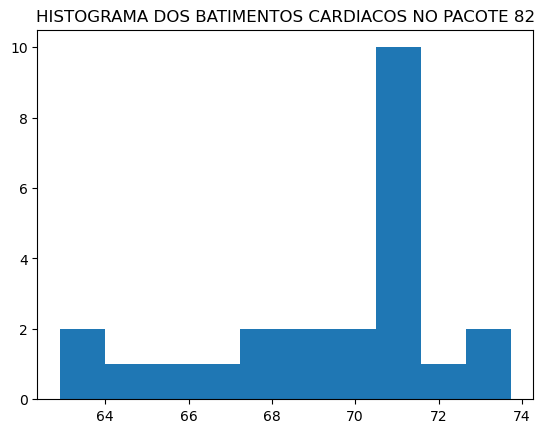

PACOTE 83: 
MMÉDIA DE BATIMENTOS: 69.71597032018165 
MEDIANA DE BATIMENTOS: 70.59923223743273 
MODA DE BATIMENTOS: 63.31394239696327 
DESVIO PADRÃO DE BATIMENTOS: 2.792821503055731


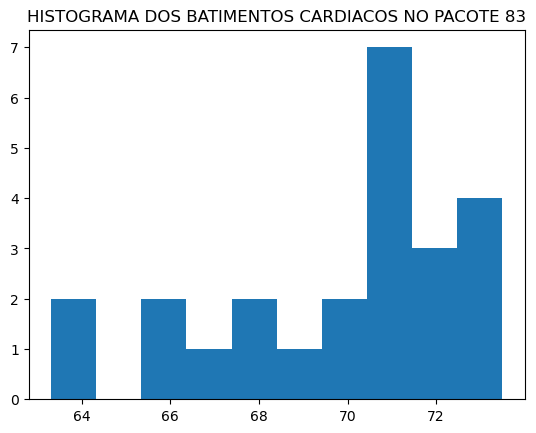

PACOTE 84: 
MMÉDIA DE BATIMENTOS: 69.25090309796134 
MEDIANA DE BATIMENTOS: 69.516714500978 
MODA DE BATIMENTOS: 64.20992382177238 
DESVIO PADRÃO DE BATIMENTOS: 2.678445332406768


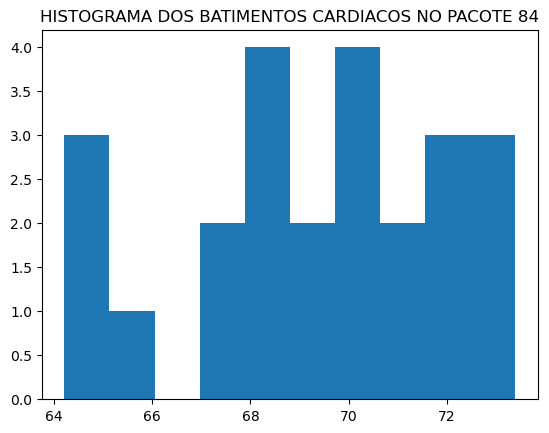

PACOTE 85: 
MMÉDIA DE BATIMENTOS: 68.87103599383983 
MEDIANA DE BATIMENTOS: 69.8577325120244 
MODA DE BATIMENTOS: 63.86714941096837 
DESVIO PADRÃO DE BATIMENTOS: 2.515558254975027


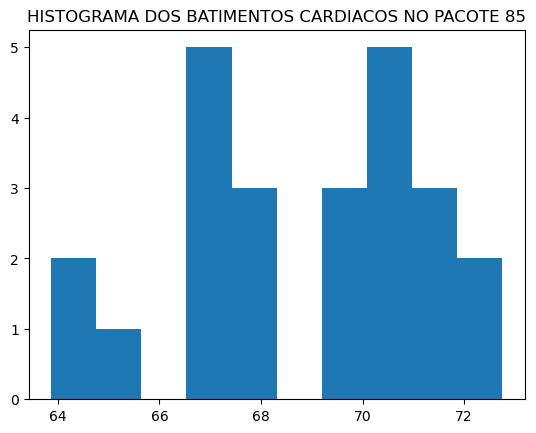

PACOTE 86: 
MMÉDIA DE BATIMENTOS: 69.7142252625756 
MEDIANA DE BATIMENTOS: 70.55866362571238 
MODA DE BATIMENTOS: 63.375734290263026 
DESVIO PADRÃO DE BATIMENTOS: 2.373356944462137


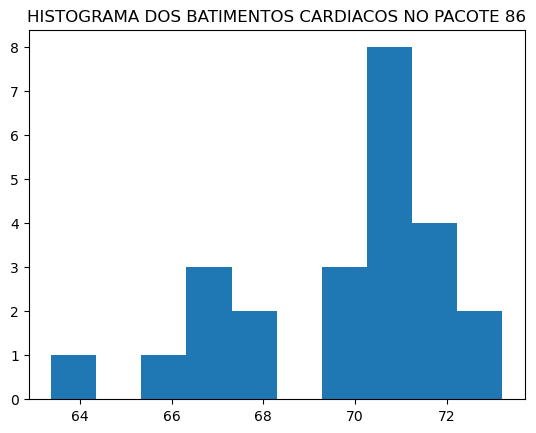

PACOTE 87: 
MMÉDIA DE BATIMENTOS: 69.42650613568337 
MEDIANA DE BATIMENTOS: 69.58745905347234 
MODA DE BATIMENTOS: 66.48498056392857 
DESVIO PADRÃO DE BATIMENTOS: 2.570004354438893


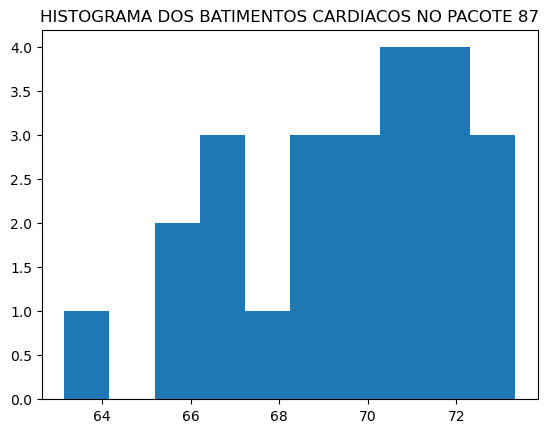

PACOTE 88: 
MMÉDIA DE BATIMENTOS: 69.40789174440783 
MEDIANA DE BATIMENTOS: 69.64420221169306 
MODA DE BATIMENTOS: 65.9545922964235 
DESVIO PADRÃO DE BATIMENTOS: 2.6143345548382735


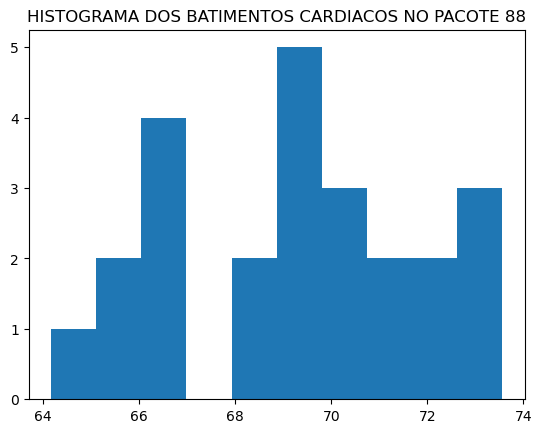

PACOTE 89: 
MMÉDIA DE BATIMENTOS: 69.07357559539521 
MEDIANA DE BATIMENTOS: 69.82979184994821 
MODA DE BATIMENTOS: 63.550593907424876 
DESVIO PADRÃO DE BATIMENTOS: 2.74749864921114


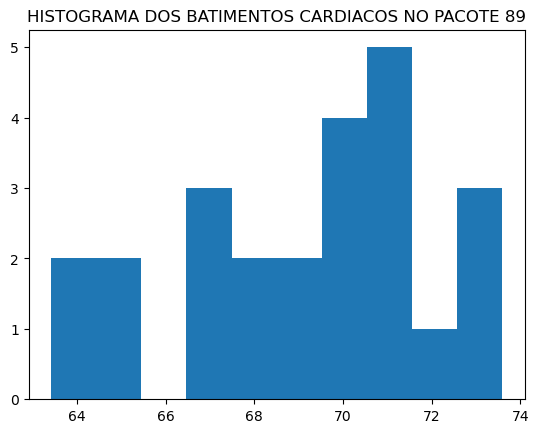

PACOTE 90: 
MMÉDIA DE BATIMENTOS: 69.16350206426081 
MEDIANA DE BATIMENTOS: 69.5572637519258 
MODA DE BATIMENTOS: 63.932640472639946 
DESVIO PADRÃO DE BATIMENTOS: 2.442796990230325


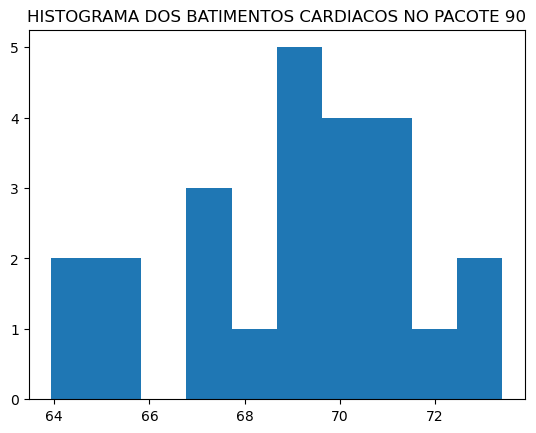

PACOTE 91: 
MMÉDIA DE BATIMENTOS: 69.02470878644426 
MEDIANA DE BATIMENTOS: 69.45747063147766 
MODA DE BATIMENTOS: 64.25853197275272 
DESVIO PADRÃO DE BATIMENTOS: 2.5724615030618048


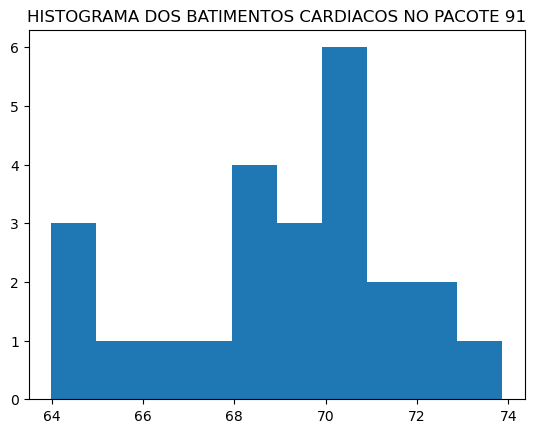

PACOTE 92: 
MMÉDIA DE BATIMENTOS: 68.46387389841651 
MEDIANA DE BATIMENTOS: 68.98534030999059 
MODA DE BATIMENTOS: 63.73164055856782 
DESVIO PADRÃO DE BATIMENTOS: 2.5266849729426104


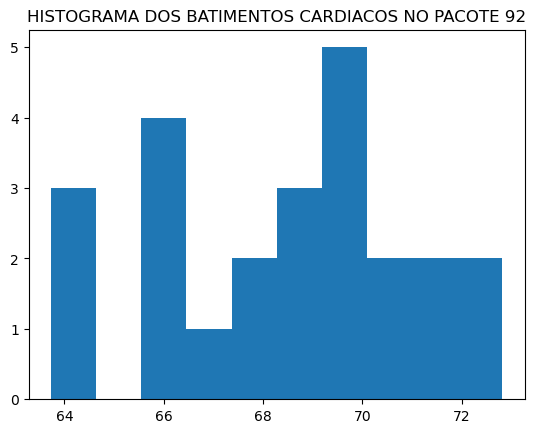

PACOTE 93: 
MMÉDIA DE BATIMENTOS: 68.71219650826465 
MEDIANA DE BATIMENTOS: 69.40718606768456 
MODA DE BATIMENTOS: 62.012924362682895 
DESVIO PADRÃO DE BATIMENTOS: 2.9240566096960237


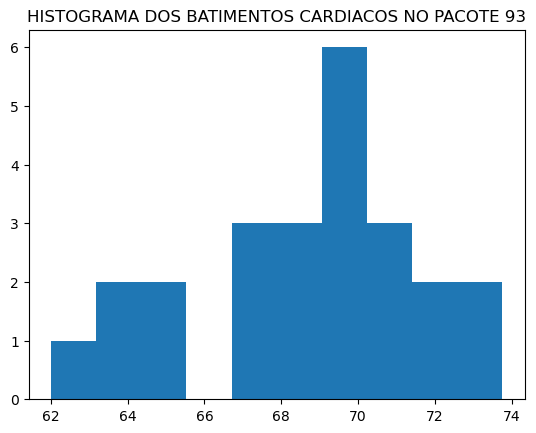

PACOTE 94: 
MMÉDIA DE BATIMENTOS: 68.99031381007939 
MEDIANA DE BATIMENTOS: 69.85982268221468 
MODA DE BATIMENTOS: 62.31833972259348 
DESVIO PADRÃO DE BATIMENTOS: 2.784493488893564


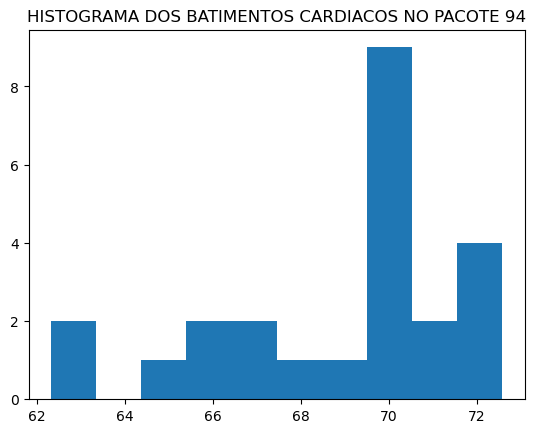

PACOTE 95: 
MMÉDIA DE BATIMENTOS: 68.7020346570571 
MEDIANA DE BATIMENTOS: 68.86737033640162 
MODA DE BATIMENTOS: 64.51822901053619 
DESVIO PADRÃO DE BATIMENTOS: 2.986272165057327


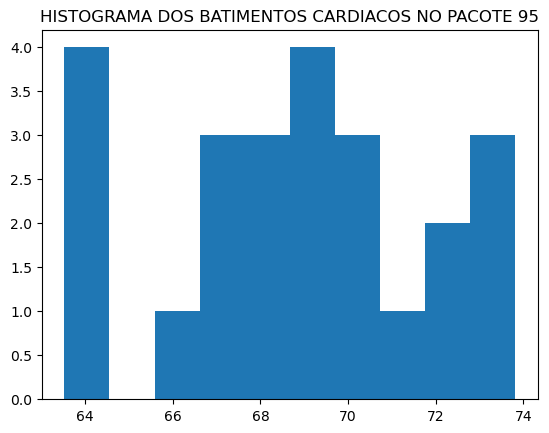

PACOTE 96: 
MMÉDIA DE BATIMENTOS: 68.50299956947622 
MEDIANA DE BATIMENTOS: 68.749871579397 
MODA DE BATIMENTOS: 63.01123625224398 
DESVIO PADRÃO DE BATIMENTOS: 2.3798985740910132


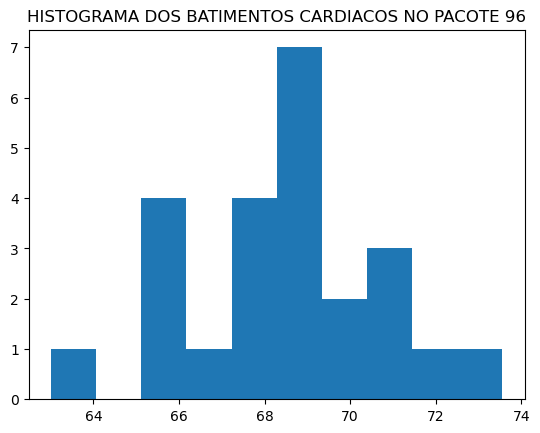

PACOTE 97: 
MMÉDIA DE BATIMENTOS: 68.38952893551976 
MEDIANA DE BATIMENTOS: 68.6106498586401 
MODA DE BATIMENTOS: 64.44660047007179 
DESVIO PADRÃO DE BATIMENTOS: 2.530484397793729


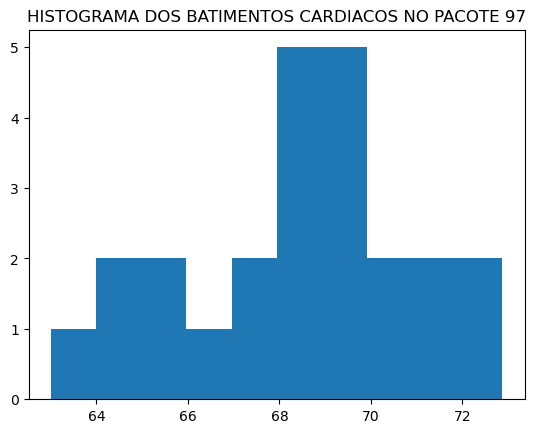

PACOTE 98: 
MMÉDIA DE BATIMENTOS: 69.44859040499766 
MEDIANA DE BATIMENTOS: 69.64828047890298 
MODA DE BATIMENTOS: 65.60876989090656 
DESVIO PADRÃO DE BATIMENTOS: 2.417772546830036


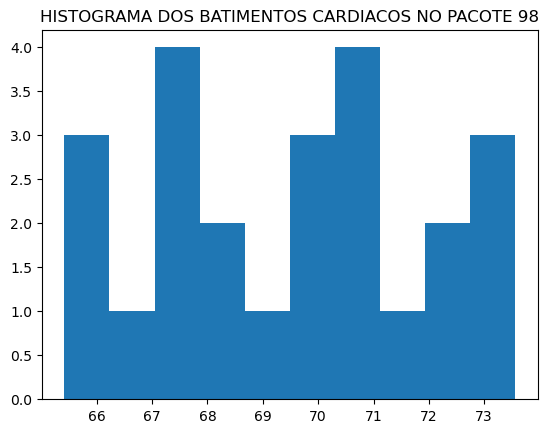

PACOTE 99: 
MMÉDIA DE BATIMENTOS: 68.6000995954777 
MEDIANA DE BATIMENTOS: 69.31210156202866 
MODA DE BATIMENTOS: 65.03632283439558 
DESVIO PADRÃO DE BATIMENTOS: 2.46508780963997


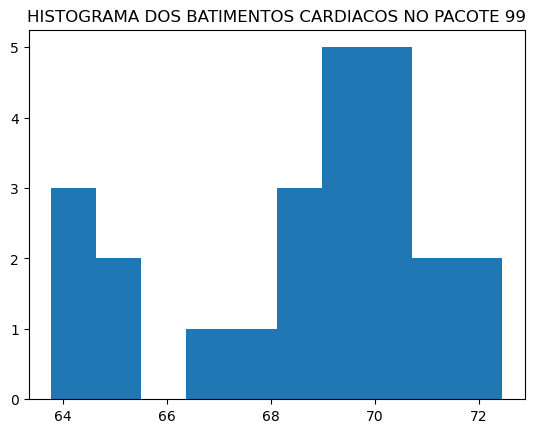

PACOTE 100: 
MMÉDIA DE BATIMENTOS: 69.11382646016725 
MEDIANA DE BATIMENTOS: 69.26492428876386 
MODA DE BATIMENTOS: 62.77955069288347 
DESVIO PADRÃO DE BATIMENTOS: 3.0853327603457616


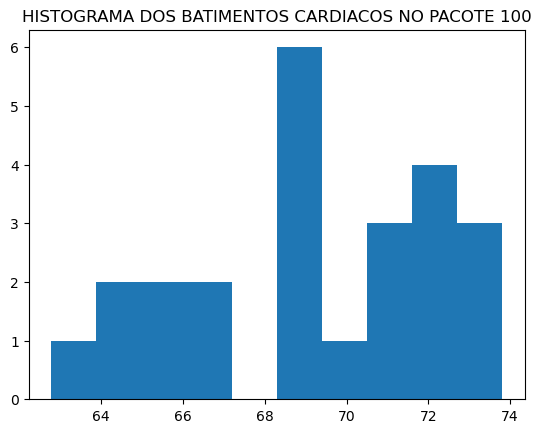

PACOTE 1: 
MÉDIA DE PRESSÃO: 12.678293877098232 
MEDIANA DE PRESSAO: 13.0, 
MODA DE PRESSÃO: 12.34729635533386, 
DESVIO PADRÃO DE PRESSÃO: 1.18227435943001


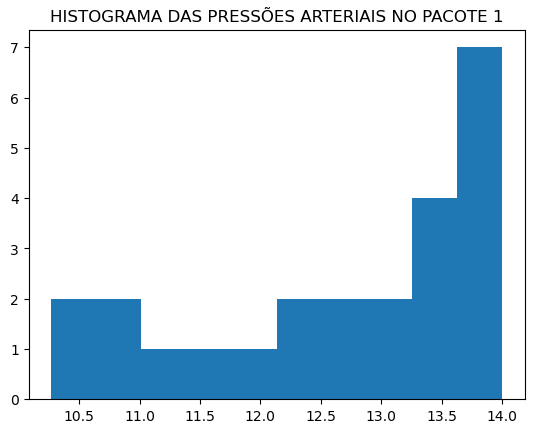

PACOTE 2: 
MÉDIA DE PRESSÃO: 12.670285749807933 
MEDIANA DE PRESSAO: 12.992623727695289, 
MODA DE PRESSÃO: 10.261652456058613, 
DESVIO PADRÃO DE PRESSÃO: 1.1809350082425027


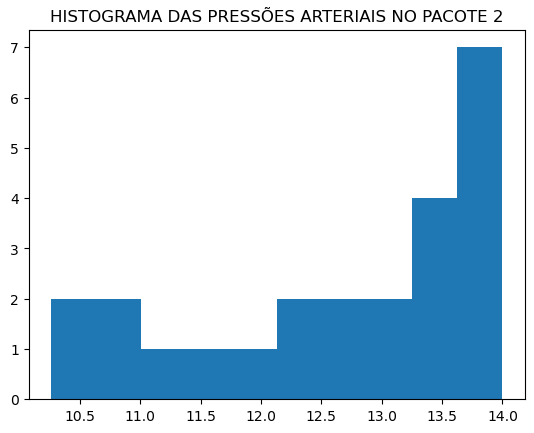

PACOTE 3: 
MÉDIA DE PRESSÃO: 12.657576122420435 
MEDIANA DE PRESSAO: 12.993650496658336, 
MODA DE PRESSÃO: 10.23236353227713, 
DESVIO PADRÃO DE PRESSÃO: 1.1804981295714891


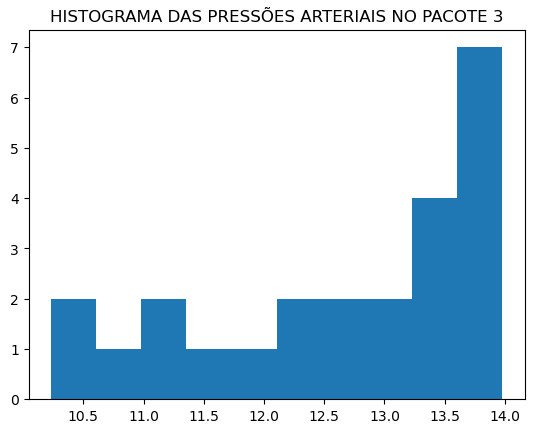

PACOTE 4: 
MÉDIA DE PRESSÃO: 12.65362211288322 
MEDIANA DE PRESSAO: 12.987841423841495, 
MODA DE PRESSÃO: 10.208671013770672, 
DESVIO PADRÃO DE PRESSÃO: 1.1888583771209094


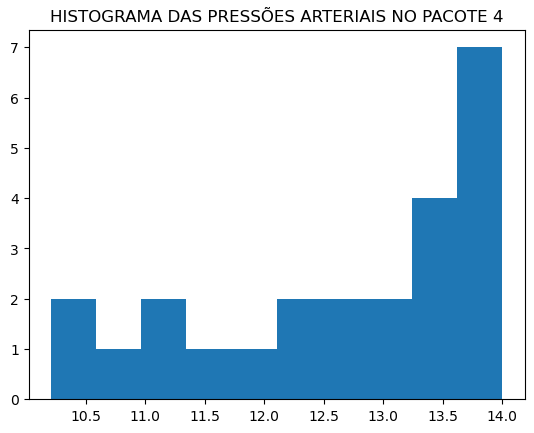

PACOTE 5: 
MÉDIA DE PRESSÃO: 12.638162738058421 
MEDIANA DE PRESSAO: 12.929456794598948, 
MODA DE PRESSÃO: 10.19032334419402, 
DESVIO PADRÃO DE PRESSÃO: 1.1875886168524008


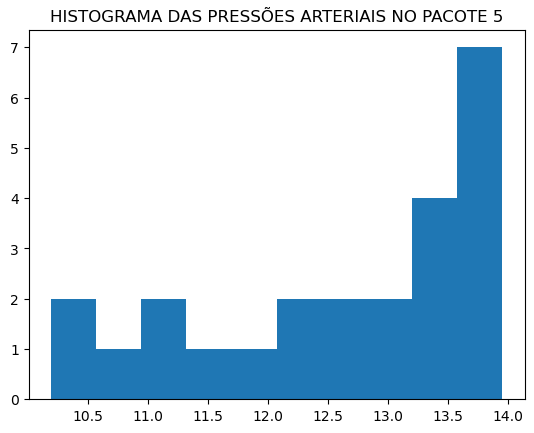

PACOTE 6: 
MÉDIA DE PRESSÃO: 12.625102889046238 
MEDIANA DE PRESSAO: 12.943214902352246, 
MODA DE PRESSÃO: 10.246777217189544, 
DESVIO PADRÃO DE PRESSÃO: 1.1754400875866318


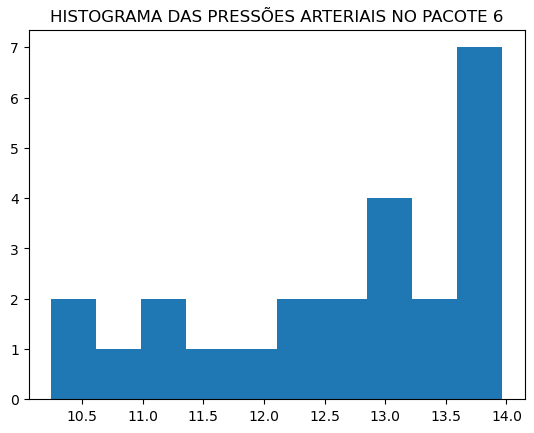

PACOTE 7: 
MÉDIA DE PRESSÃO: 12.607676843849637 
MEDIANA DE PRESSAO: 12.932003469981119, 
MODA DE PRESSÃO: 10.158841447486914, 
DESVIO PADRÃO DE PRESSÃO: 1.1802077238241564


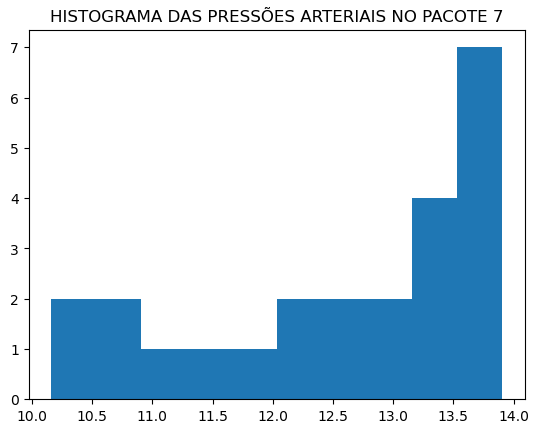

PACOTE 8: 
MÉDIA DE PRESSÃO: 12.609517543786547 
MEDIANA DE PRESSAO: 12.939650359755488, 
MODA DE PRESSÃO: 10.24139144391849, 
DESVIO PADRÃO DE PRESSÃO: 1.1801215214168574


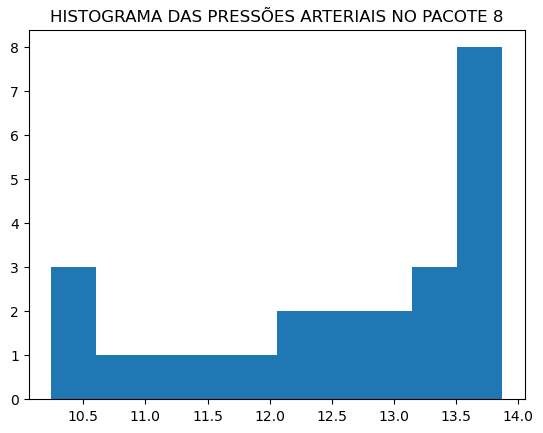

PACOTE 9: 
MÉDIA DE PRESSÃO: 12.604444495719319 
MEDIANA DE PRESSAO: 12.910847138127291, 
MODA DE PRESSÃO: 10.244898942357864, 
DESVIO PADRÃO DE PRESSÃO: 1.1782422883352848


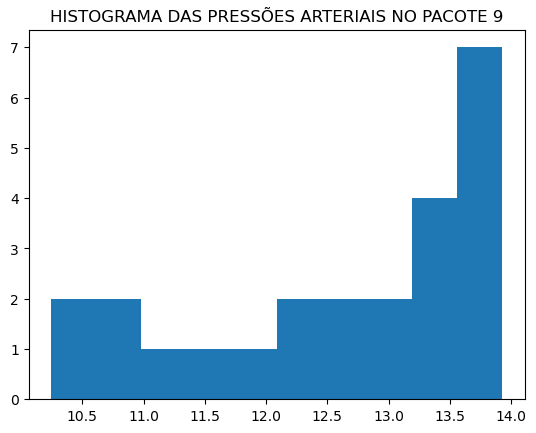

PACOTE 10: 
MÉDIA DE PRESSÃO: 12.59514823699939 
MEDIANA DE PRESSAO: 12.892978339769982, 
MODA DE PRESSÃO: 10.166441598584317, 
DESVIO PADRÃO DE PRESSÃO: 1.175930834920505


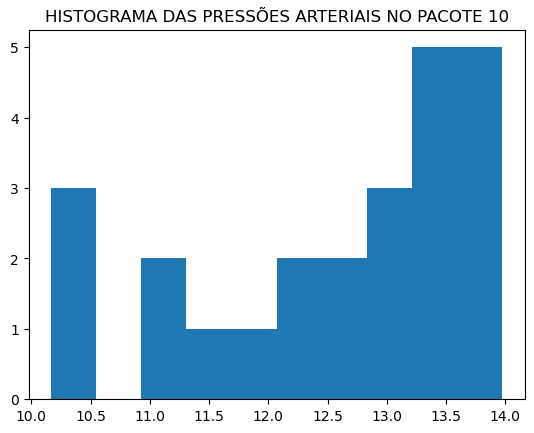

PACOTE 11: 
MÉDIA DE PRESSÃO: 12.562259686336366 
MEDIANA DE PRESSAO: 12.916348878854112, 
MODA DE PRESSÃO: 10.107897209946652, 
DESVIO PADRÃO DE PRESSÃO: 1.182504726973287


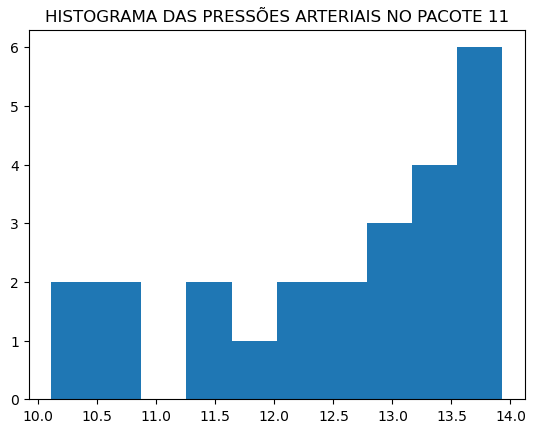

PACOTE 12: 
MÉDIA DE PRESSÃO: 12.586448450701775 
MEDIANA DE PRESSAO: 12.906223164642904, 
MODA DE PRESSÃO: 10.14354086090836, 
DESVIO PADRÃO DE PRESSÃO: 1.2081336562497869


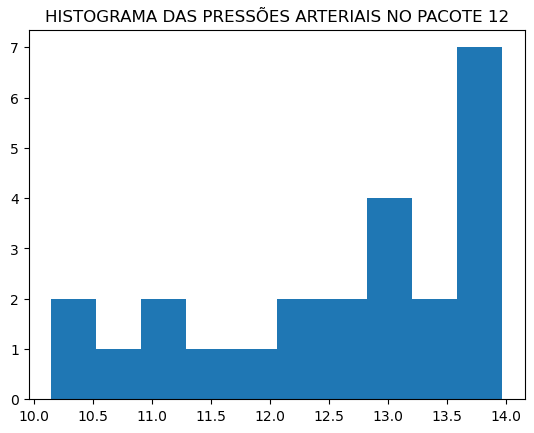

PACOTE 13: 
MÉDIA DE PRESSÃO: 12.582898620797886 
MEDIANA DE PRESSAO: 12.909255555352912, 
MODA DE PRESSÃO: 10.242377903189375, 
DESVIO PADRÃO DE PRESSÃO: 1.1840953658574533


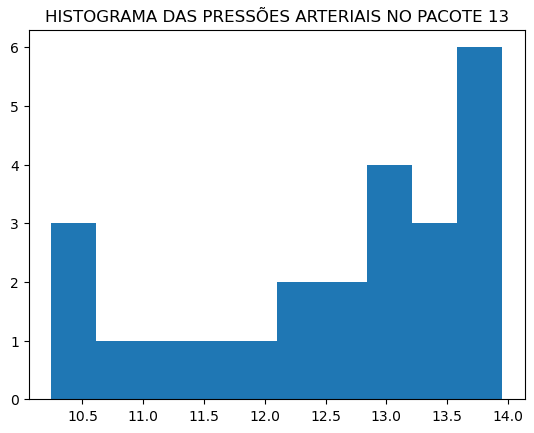

PACOTE 14: 
MÉDIA DE PRESSÃO: 12.55216222202729 
MEDIANA DE PRESSAO: 12.902752789731199, 
MODA DE PRESSÃO: 10.20704211801802, 
DESVIO PADRÃO DE PRESSÃO: 1.198829066772036


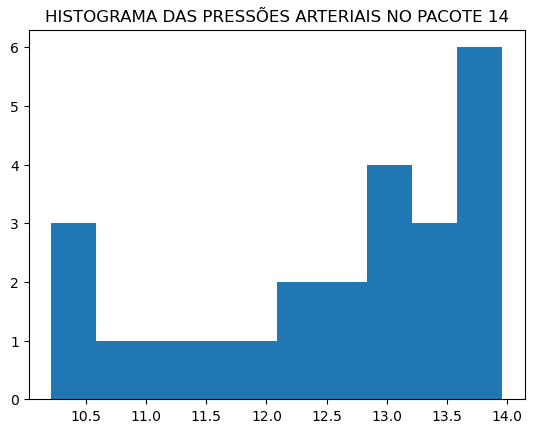

PACOTE 15: 
MÉDIA DE PRESSÃO: 12.532397825187607 
MEDIANA DE PRESSAO: 12.90113516927524, 
MODA DE PRESSÃO: 10.201947151232318, 
DESVIO PADRÃO DE PRESSÃO: 1.1730992663382316


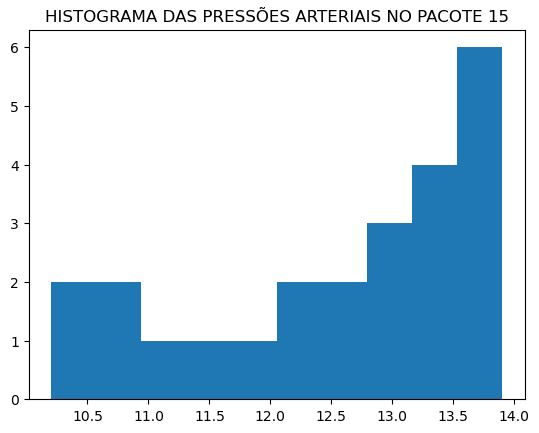

PACOTE 16: 
MÉDIA DE PRESSÃO: 12.525988678479884 
MEDIANA DE PRESSAO: 12.888660768124542, 
MODA DE PRESSÃO: 10.222317051449147, 
DESVIO PADRÃO DE PRESSÃO: 1.1970200182690551


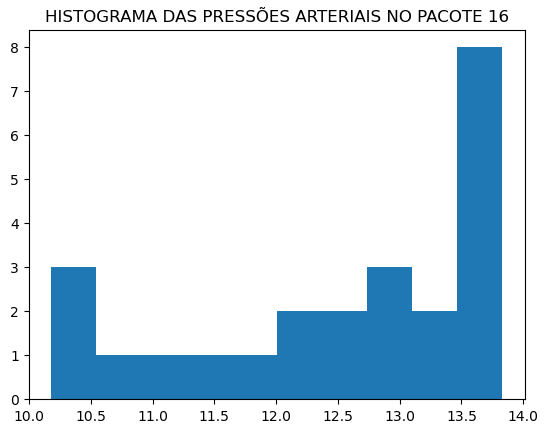

PACOTE 17: 
MÉDIA DE PRESSÃO: 12.47948796748748 
MEDIANA DE PRESSAO: 12.874383655727843, 
MODA DE PRESSÃO: 9.99799094153529, 
DESVIO PADRÃO DE PRESSÃO: 1.202779951096731


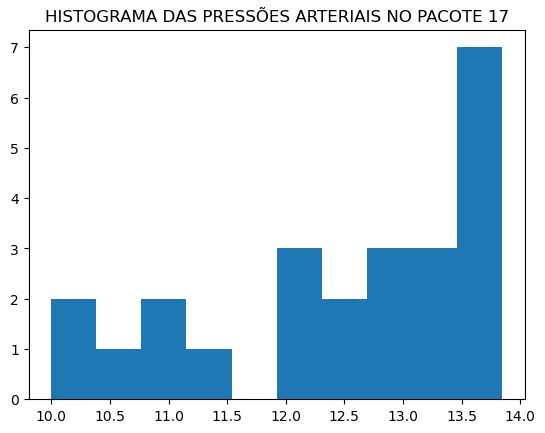

PACOTE 18: 
MÉDIA DE PRESSÃO: 12.48568172353266 
MEDIANA DE PRESSAO: 12.781517004731072, 
MODA DE PRESSÃO: 10.108731815122, 
DESVIO PADRÃO DE PRESSÃO: 1.1923385282620664


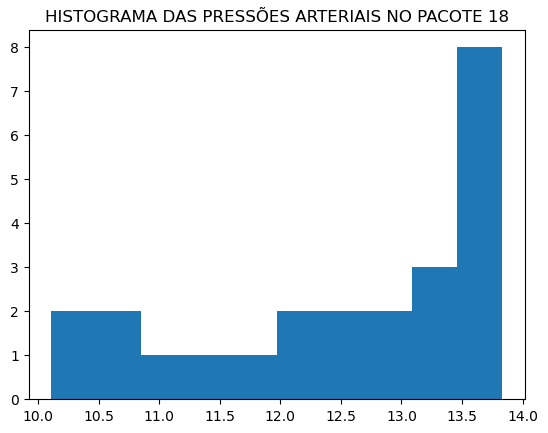

PACOTE 19: 
MÉDIA DE PRESSÃO: 12.523608644324996 
MEDIANA DE PRESSAO: 12.772220147324884, 
MODA DE PRESSÃO: 10.070174278189576, 
DESVIO PADRÃO DE PRESSÃO: 1.1981994601057955


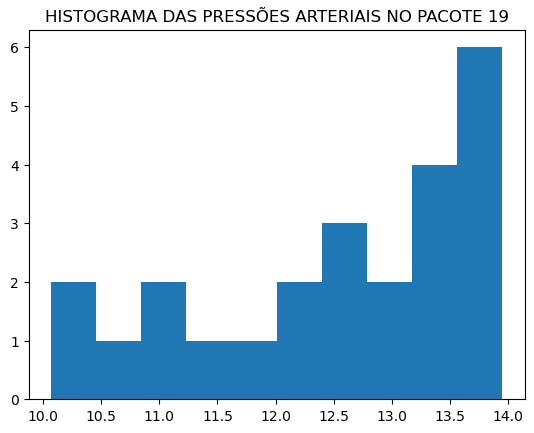

PACOTE 20: 
MÉDIA DE PRESSÃO: 12.469785646379611 
MEDIANA DE PRESSAO: 12.811112934825342, 
MODA DE PRESSÃO: 10.13666996569223, 
DESVIO PADRÃO DE PRESSÃO: 1.1824137172751856


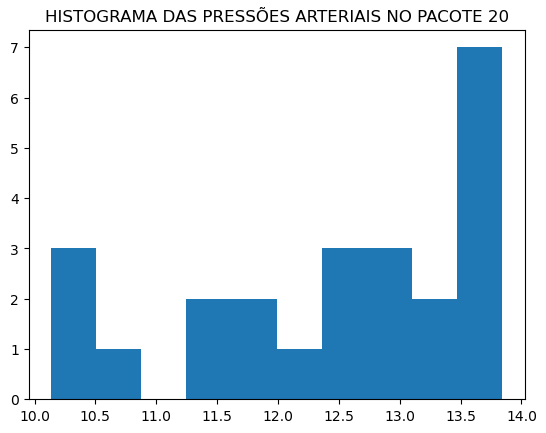

PACOTE 21: 
MÉDIA DE PRESSÃO: 12.48357899652361 
MEDIANA DE PRESSAO: 12.859676878501539, 
MODA DE PRESSÃO: 9.959107721214252, 
DESVIO PADRÃO DE PRESSÃO: 1.1912095522479311


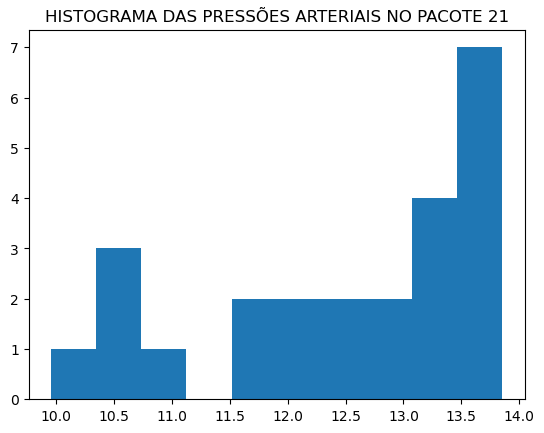

PACOTE 22: 
MÉDIA DE PRESSÃO: 12.483747135312866 
MEDIANA DE PRESSAO: 12.781400464407547, 
MODA DE PRESSÃO: 10.159769924447671, 
DESVIO PADRÃO DE PRESSÃO: 1.1351147545300422


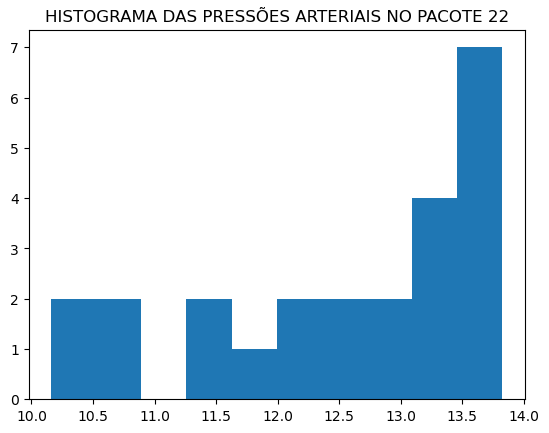

PACOTE 23: 
MÉDIA DE PRESSÃO: 12.396487547599657 
MEDIANA DE PRESSAO: 12.816288025155092, 
MODA DE PRESSÃO: 10.027685108839309, 
DESVIO PADRÃO DE PRESSÃO: 1.1883823876522364


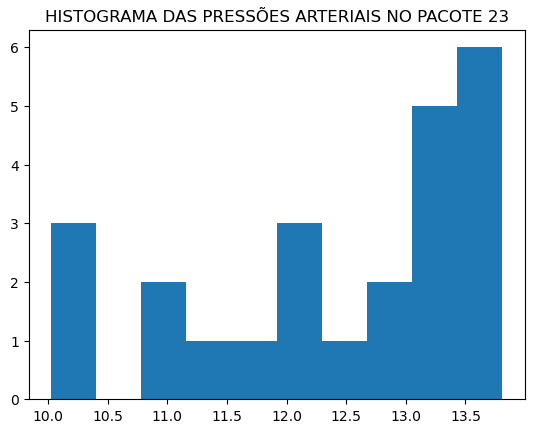

PACOTE 24: 
MÉDIA DE PRESSÃO: 12.419843215601682 
MEDIANA DE PRESSAO: 12.76518445518538, 
MODA DE PRESSÃO: 9.9155439124272, 
DESVIO PADRÃO DE PRESSÃO: 1.1417003104803904


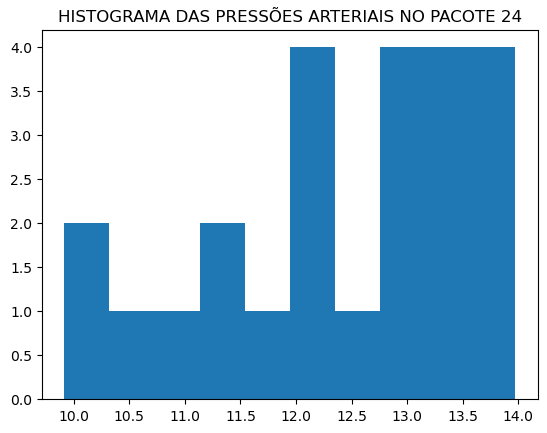

PACOTE 25: 
MÉDIA DE PRESSÃO: 12.462539923394772 
MEDIANA DE PRESSAO: 12.850181152067869, 
MODA DE PRESSÃO: 9.982193778719418, 
DESVIO PADRÃO DE PRESSÃO: 1.2166596444496525


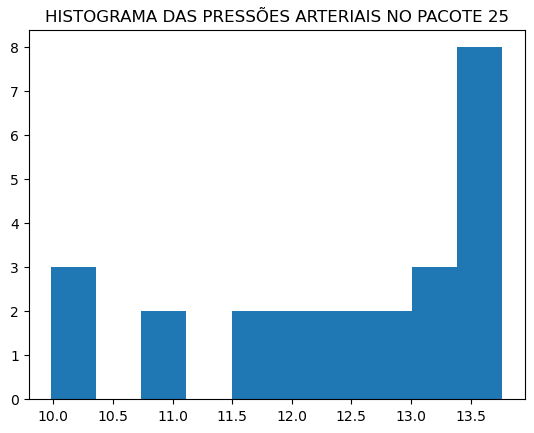

PACOTE 26: 
MÉDIA DE PRESSÃO: 12.425222484937153 
MEDIANA DE PRESSAO: 12.717212251278518, 
MODA DE PRESSÃO: 10.008090065353151, 
DESVIO PADRÃO DE PRESSÃO: 1.1832216191590548


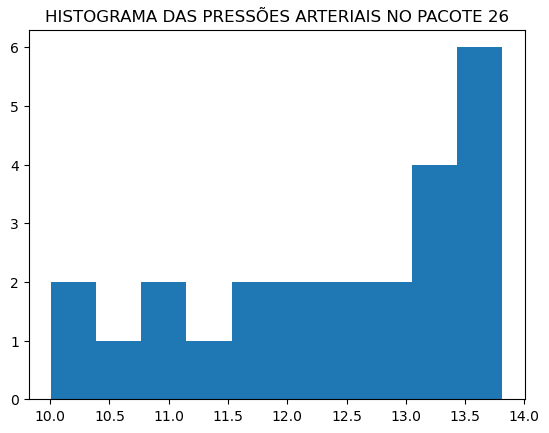

PACOTE 27: 
MÉDIA DE PRESSÃO: 12.435478438292094 
MEDIANA DE PRESSAO: 12.853518145428474, 
MODA DE PRESSÃO: 9.80304156275507, 
DESVIO PADRÃO DE PRESSÃO: 1.1879299918851973


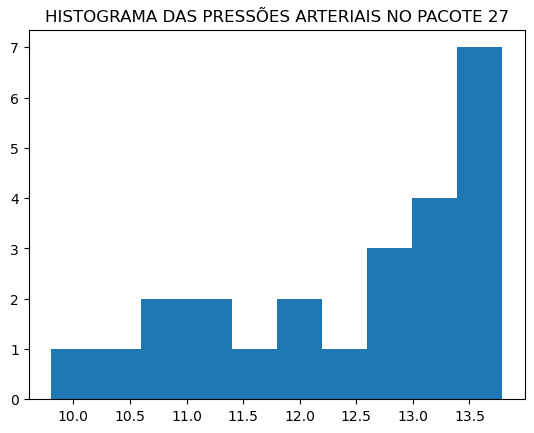

PACOTE 28: 
MÉDIA DE PRESSÃO: 12.43278966965026 
MEDIANA DE PRESSAO: 12.723489699564903, 
MODA DE PRESSÃO: 10.08236924560224, 
DESVIO PADRÃO DE PRESSÃO: 1.1521677556510304


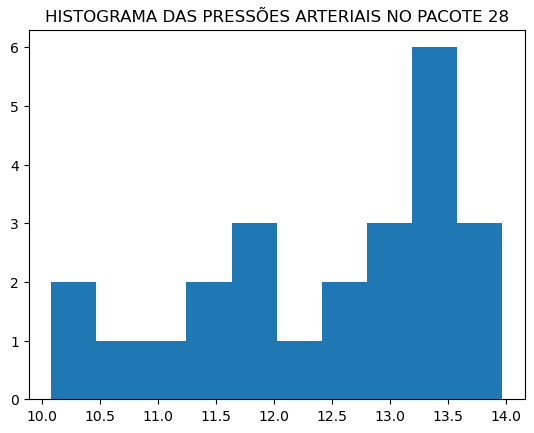

PACOTE 29: 
MÉDIA DE PRESSÃO: 12.418866118306356 
MEDIANA DE PRESSAO: 12.64927690333305, 
MODA DE PRESSÃO: 9.924880495193483, 
DESVIO PADRÃO DE PRESSÃO: 1.224173156728007


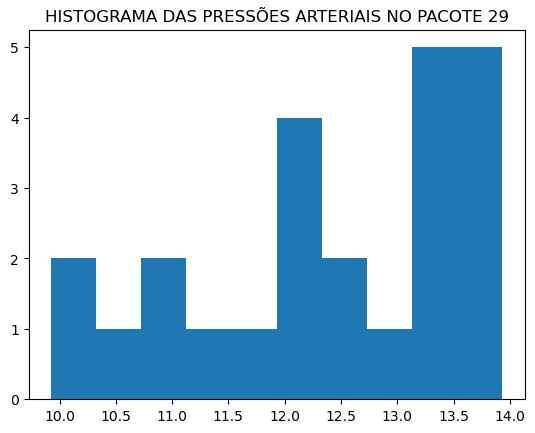

PACOTE 30: 
MÉDIA DE PRESSÃO: 12.398202605468297 
MEDIANA DE PRESSAO: 12.467721638079869, 
MODA DE PRESSÃO: 10.108648999439383, 
DESVIO PADRÃO DE PRESSÃO: 1.1863589053065895


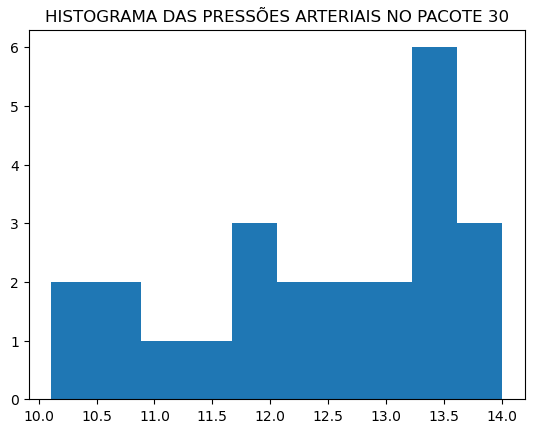

PACOTE 31: 
MÉDIA DE PRESSÃO: 12.391447282102254 
MEDIANA DE PRESSAO: 12.712854719988792, 
MODA DE PRESSÃO: 9.785385670003983, 
DESVIO PADRÃO DE PRESSÃO: 1.2127212075152924


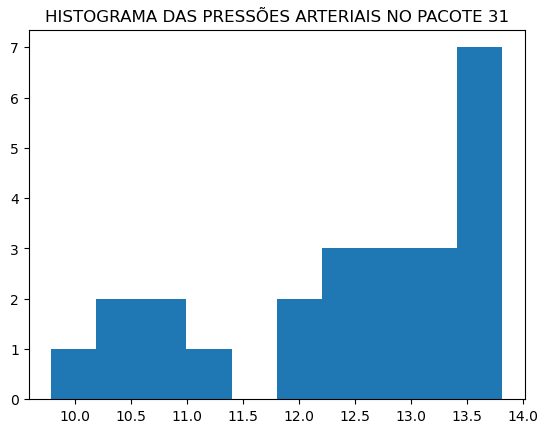

PACOTE 32: 
MÉDIA DE PRESSÃO: 12.414635155057072 
MEDIANA DE PRESSAO: 12.74836782925953, 
MODA DE PRESSÃO: 10.18043959627738, 
DESVIO PADRÃO DE PRESSÃO: 1.193571051038692


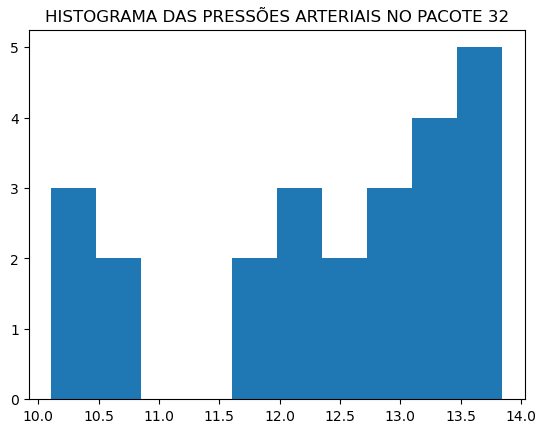

PACOTE 33: 
MÉDIA DE PRESSÃO: 12.34683804305547 
MEDIANA DE PRESSAO: 12.574698551729892, 
MODA DE PRESSÃO: 9.758462311389419, 
DESVIO PADRÃO DE PRESSÃO: 1.1910595194334934


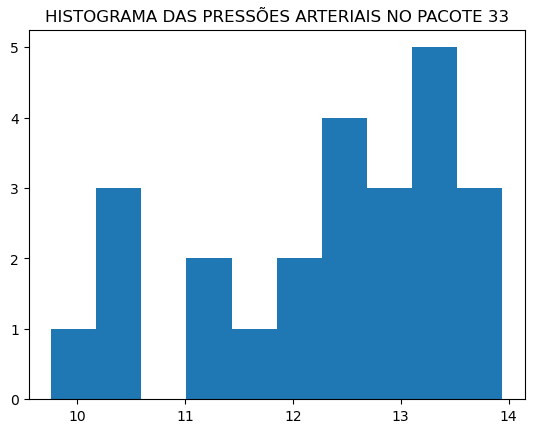

PACOTE 34: 
MÉDIA DE PRESSÃO: 12.309901455586214 
MEDIANA DE PRESSAO: 12.761067574985006, 
MODA DE PRESSÃO: 9.875586244676532, 
DESVIO PADRÃO DE PRESSÃO: 1.1815040603492943


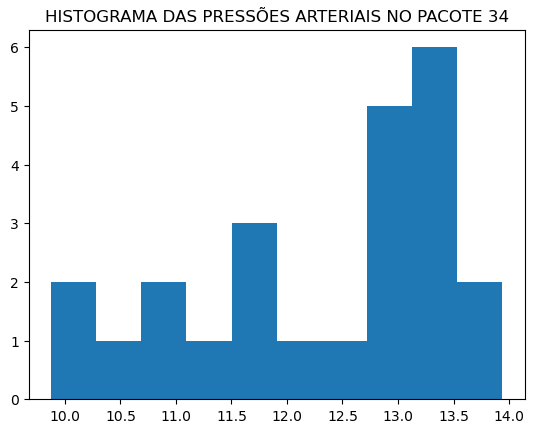

PACOTE 35: 
MÉDIA DE PRESSÃO: 12.282722996597817 
MEDIANA DE PRESSAO: 12.595411354373834, 
MODA DE PRESSÃO: 9.682153942145726, 
DESVIO PADRÃO DE PRESSÃO: 1.2220503446543614


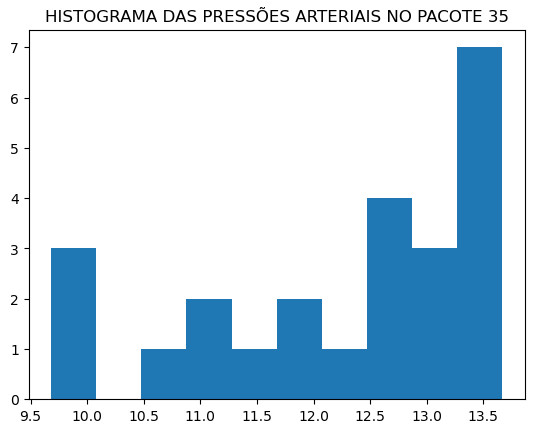

PACOTE 36: 
MÉDIA DE PRESSÃO: 12.34600787103038 
MEDIANA DE PRESSAO: 12.653651996988433, 
MODA DE PRESSÃO: 9.929785183348143, 
DESVIO PADRÃO DE PRESSÃO: 1.198166254113383


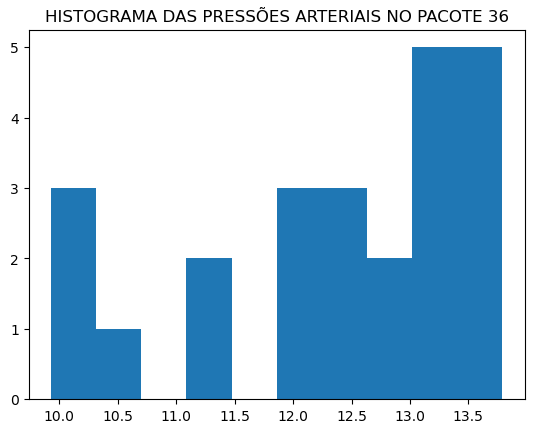

PACOTE 37: 
MÉDIA DE PRESSÃO: 12.401635412110465 
MEDIANA DE PRESSAO: 12.765093412224427, 
MODA DE PRESSÃO: 10.050965200231174, 
DESVIO PADRÃO DE PRESSÃO: 1.2400959448688493


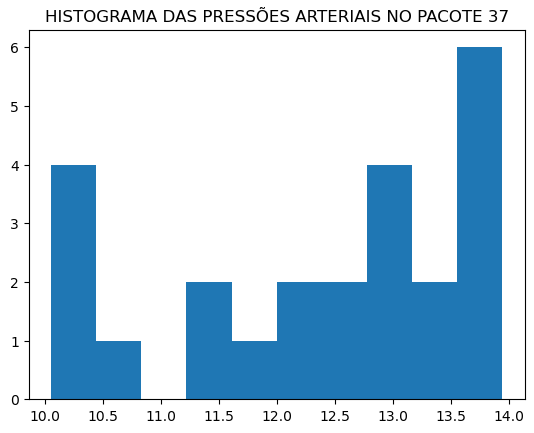

PACOTE 38: 
MÉDIA DE PRESSÃO: 12.214439477335754 
MEDIANA DE PRESSAO: 12.418564740142644, 
MODA DE PRESSÃO: 10.266119233413074, 
DESVIO PADRÃO DE PRESSÃO: 1.2124007552868


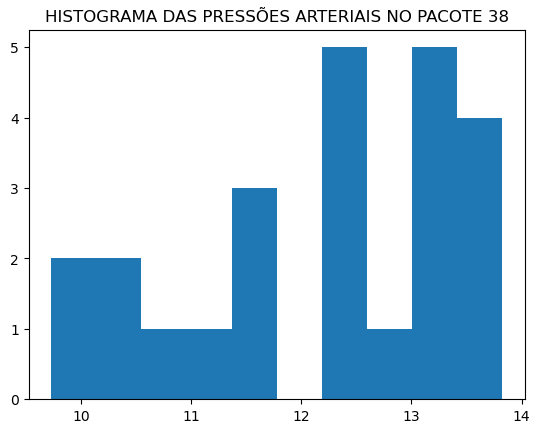

PACOTE 39: 
MÉDIA DE PRESSÃO: 12.33431946068152 
MEDIANA DE PRESSAO: 12.546211363347817, 
MODA DE PRESSÃO: 10.177887891983605, 
DESVIO PADRÃO DE PRESSÃO: 1.11645082015817


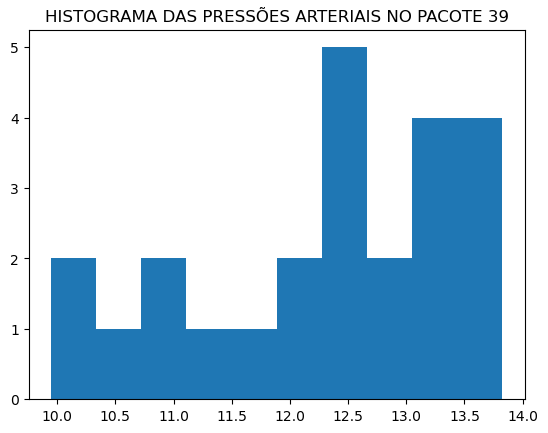

PACOTE 40: 
MÉDIA DE PRESSÃO: 12.306867629923795 
MEDIANA DE PRESSAO: 12.630532341348728, 
MODA DE PRESSÃO: 9.609030537403529, 
DESVIO PADRÃO DE PRESSÃO: 1.1913182163259548


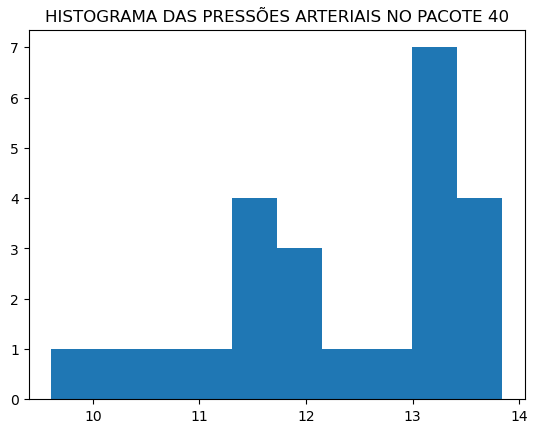

PACOTE 41: 
MÉDIA DE PRESSÃO: 12.680581185659685 
MEDIANA DE PRESSAO: 12.68940342441644, 
MODA DE PRESSÃO: 10.136336753861992, 
DESVIO PADRÃO DE PRESSÃO: 2.2429501522588238


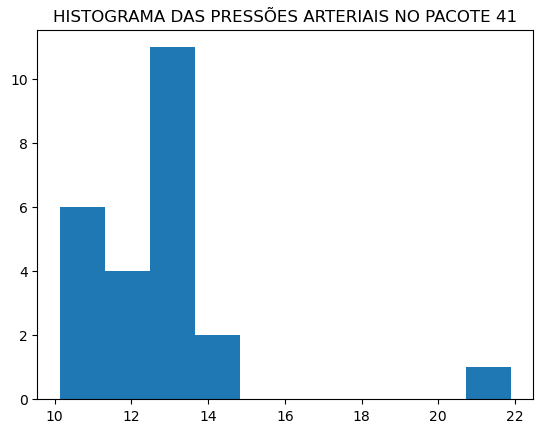

PACOTE 42: 
MÉDIA DE PRESSÃO: 12.255287300297676 
MEDIANA DE PRESSAO: 12.50581280429231, 
MODA DE PRESSÃO: 10.179115465843545, 
DESVIO PADRÃO DE PRESSÃO: 1.1594907197768765


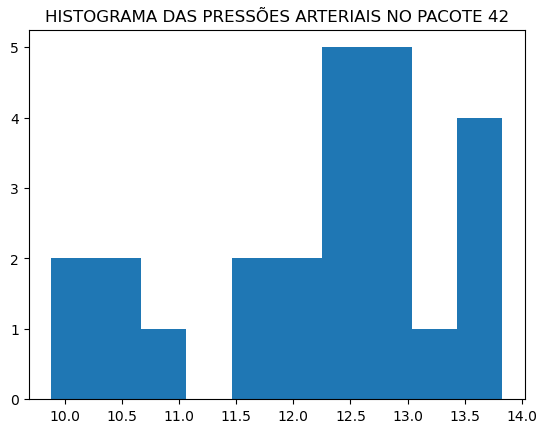

PACOTE 43: 
MÉDIA DE PRESSÃO: 12.30413443761123 
MEDIANA DE PRESSAO: 12.827846309354692, 
MODA DE PRESSÃO: 9.654976478072088, 
DESVIO PADRÃO DE PRESSÃO: 1.1926598050695276


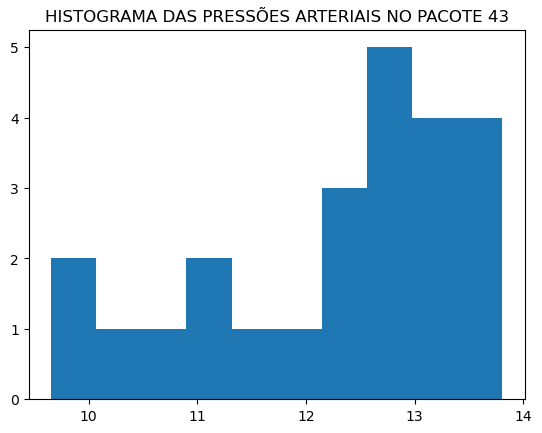

PACOTE 44: 
MÉDIA DE PRESSÃO: 12.278108978381908 
MEDIANA DE PRESSAO: 12.614271330357377, 
MODA DE PRESSÃO: 9.676359890560828, 
DESVIO PADRÃO DE PRESSÃO: 1.1224706491667837


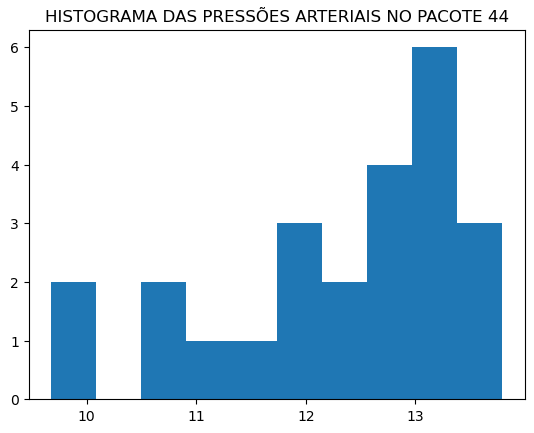

PACOTE 45: 
MÉDIA DE PRESSÃO: 12.219634541198914 
MEDIANA DE PRESSAO: 12.454733236395931, 
MODA DE PRESSÃO: 9.815154704205277, 
DESVIO PADRÃO DE PRESSÃO: 1.2158364038157579


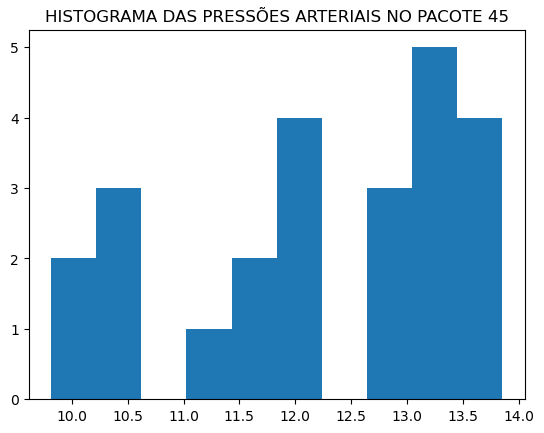

PACOTE 46: 
MÉDIA DE PRESSÃO: 12.24984142786071 
MEDIANA DE PRESSAO: 12.739711279382815, 
MODA DE PRESSÃO: 10.244593951881962, 
DESVIO PADRÃO DE PRESSÃO: 1.282174370546937


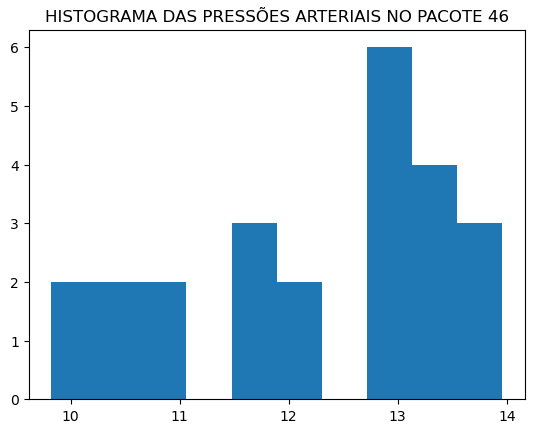

PACOTE 47: 
MÉDIA DE PRESSÃO: 12.212572186055146 
MEDIANA DE PRESSAO: 12.544226109274863, 
MODA DE PRESSÃO: 9.523074760003222, 
DESVIO PADRÃO DE PRESSÃO: 1.1160467039091737


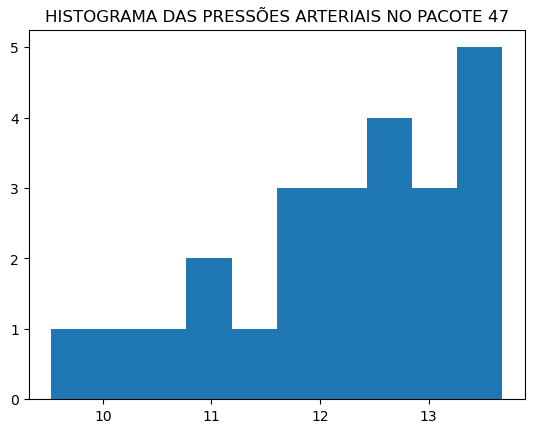

PACOTE 48: 
MÉDIA DE PRESSÃO: 12.212973953682052 
MEDIANA DE PRESSAO: 12.733385139421529, 
MODA DE PRESSÃO: 9.654646953576986, 
DESVIO PADRÃO DE PRESSÃO: 1.2418440309397414


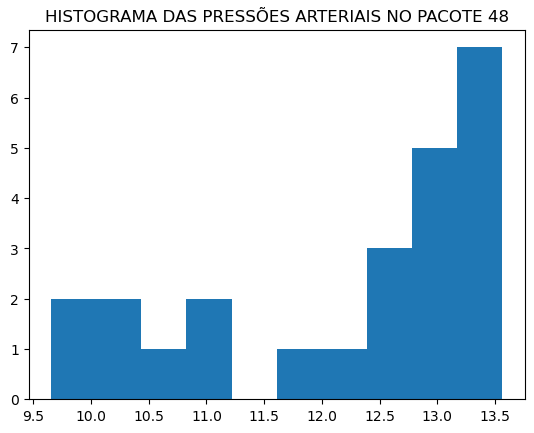

PACOTE 49: 
MÉDIA DE PRESSÃO: 12.211714796287298 
MEDIANA DE PRESSAO: 12.436605868033839, 
MODA DE PRESSÃO: 10.179819123921952, 
DESVIO PADRÃO DE PRESSÃO: 1.248633745439594


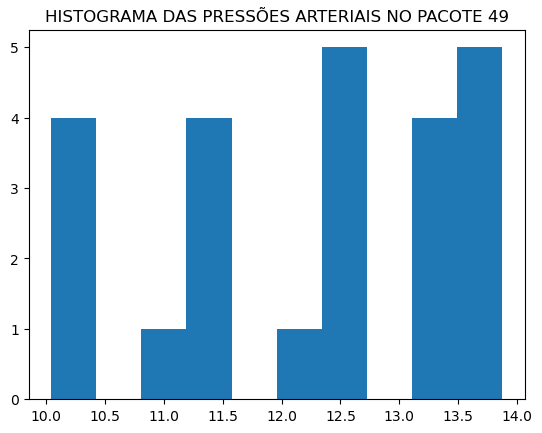

PACOTE 50: 
MÉDIA DE PRESSÃO: 12.173592701553126 
MEDIANA DE PRESSAO: 12.566858169161666, 
MODA DE PRESSÃO: 9.854276202424368, 
DESVIO PADRÃO DE PRESSÃO: 1.1791191829952552


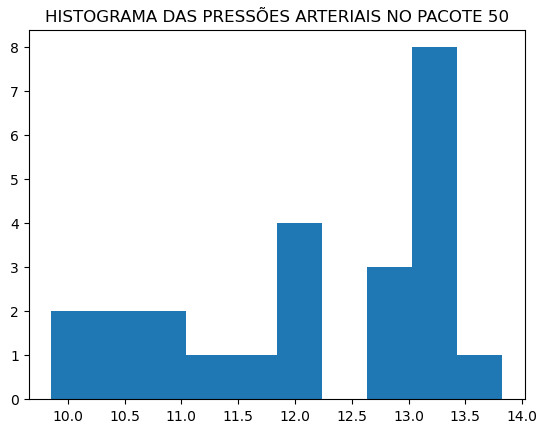

PACOTE 51: 
MÉDIA DE PRESSÃO: 12.200948061868345 
MEDIANA DE PRESSAO: 12.669932016684346, 
MODA DE PRESSÃO: 9.295197587911993, 
DESVIO PADRÃO DE PRESSÃO: 1.2056736377304795


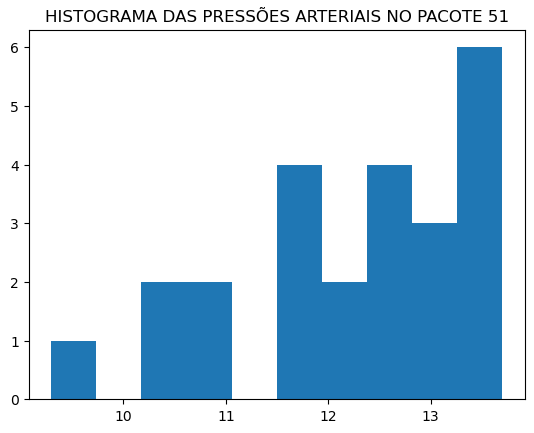

PACOTE 52: 
MÉDIA DE PRESSÃO: 12.141583879160521 
MEDIANA DE PRESSAO: 12.388661963722159, 
MODA DE PRESSÃO: 10.01486279455011, 
DESVIO PADRÃO DE PRESSÃO: 1.2442089824454385


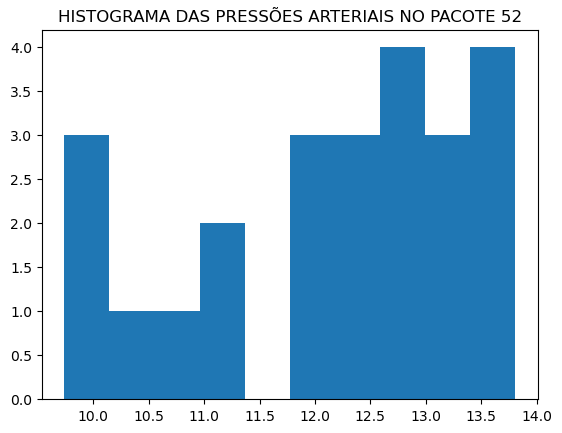

PACOTE 53: 
MÉDIA DE PRESSÃO: 12.078759969554113 
MEDIANA DE PRESSAO: 12.411520505120057, 
MODA DE PRESSÃO: 9.619556046111473, 
DESVIO PADRÃO DE PRESSÃO: 1.2163883021613155


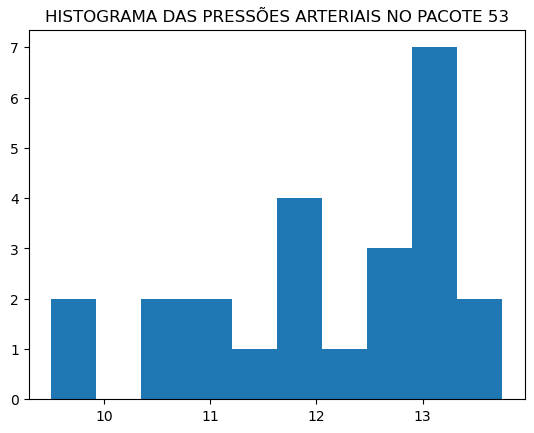

PACOTE 54: 
MÉDIA DE PRESSÃO: 12.169461098268785 
MEDIANA DE PRESSAO: 12.467663222724738, 
MODA DE PRESSÃO: 9.753993487006577, 
DESVIO PADRÃO DE PRESSÃO: 1.2651614776796913


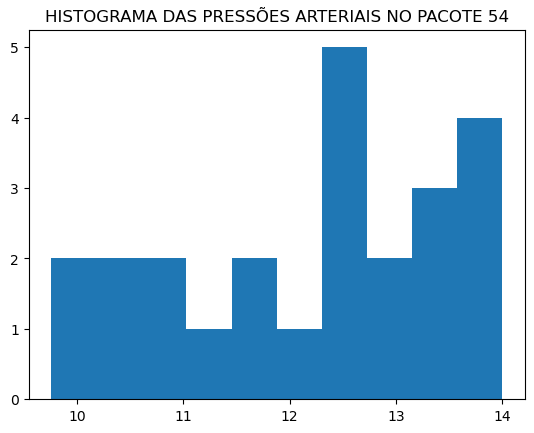

PACOTE 55: 
MÉDIA DE PRESSÃO: 12.179198325703423 
MEDIANA DE PRESSAO: 12.624665367322212, 
MODA DE PRESSÃO: 10.198323008160843, 
DESVIO PADRÃO DE PRESSÃO: 1.1987933736729242


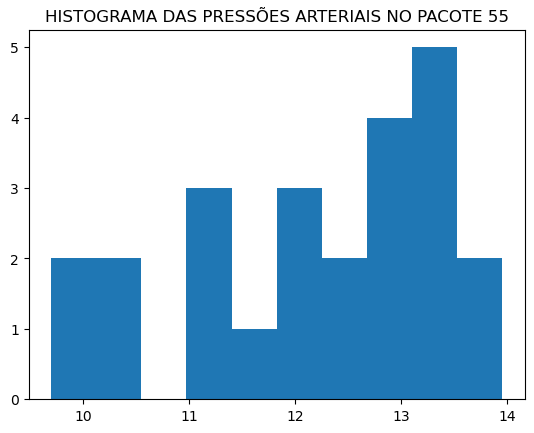

PACOTE 56: 
MÉDIA DE PRESSÃO: 12.025219536342036 
MEDIANA DE PRESSAO: 12.326858829838715, 
MODA DE PRESSÃO: 10.06523143650815, 
DESVIO PADRÃO DE PRESSÃO: 1.2256510882302478


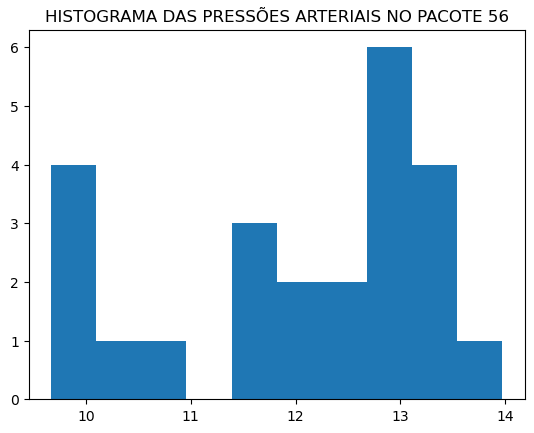

PACOTE 57: 
MÉDIA DE PRESSÃO: 12.16319072231326 
MEDIANA DE PRESSAO: 12.544720176103397, 
MODA DE PRESSÃO: 10.015489107804493, 
DESVIO PADRÃO DE PRESSÃO: 1.174749869190093


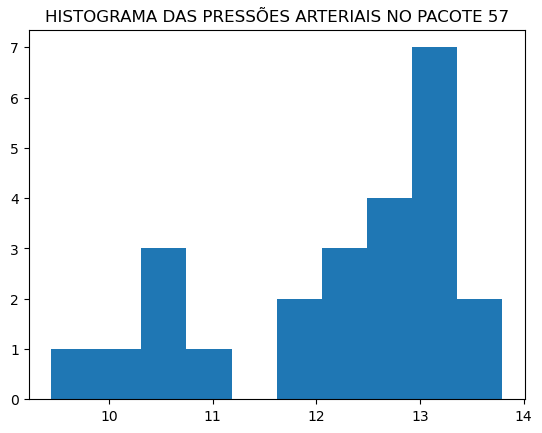

PACOTE 58: 
MÉDIA DE PRESSÃO: 12.08884869413177 
MEDIANA DE PRESSAO: 12.12773792056731, 
MODA DE PRESSÃO: 10.242824132175162, 
DESVIO PADRÃO DE PRESSÃO: 1.213597861054599


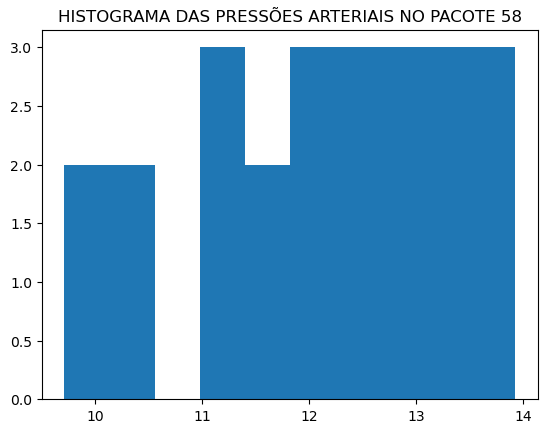

PACOTE 59: 
MÉDIA DE PRESSÃO: 12.435618891145056 
MEDIANA DE PRESSAO: 12.383483464901577, 
MODA DE PRESSÃO: 9.320789188131684, 
DESVIO PADRÃO DE PRESSÃO: 2.39825765247854


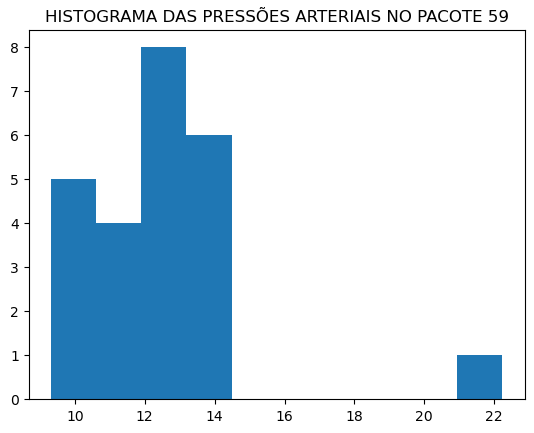

PACOTE 60: 
MÉDIA DE PRESSÃO: 12.123155880818793 
MEDIANA DE PRESSAO: 12.363787039492053, 
MODA DE PRESSÃO: 9.096941210459658, 
DESVIO PADRÃO DE PRESSÃO: 1.2824384449546977


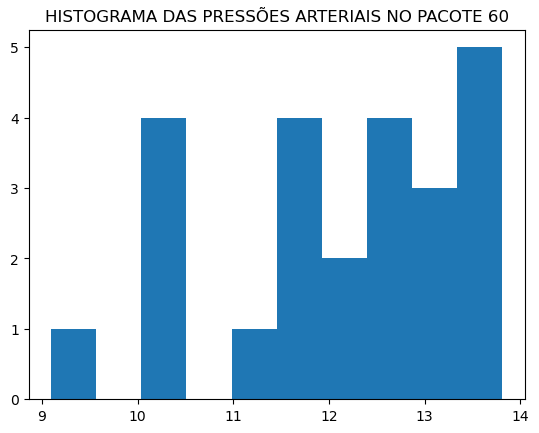

PACOTE 61: 
MÉDIA DE PRESSÃO: 12.126417274484199 
MEDIANA DE PRESSAO: 12.300381797209669, 
MODA DE PRESSÃO: 10.032164435328104, 
DESVIO PADRÃO DE PRESSÃO: 1.2492263069025658


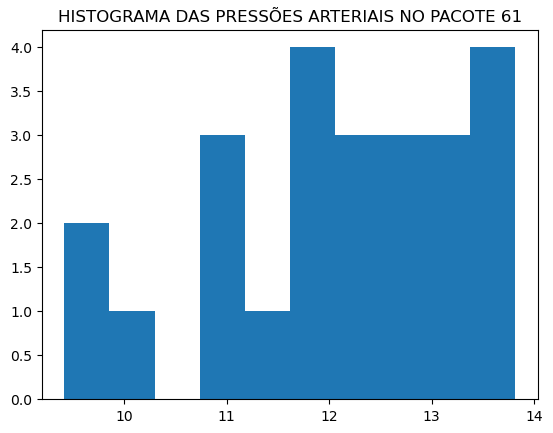

PACOTE 62: 
MÉDIA DE PRESSÃO: 12.006376231647081 
MEDIANA DE PRESSAO: 12.469148858806397, 
MODA DE PRESSÃO: 10.017643145023932, 
DESVIO PADRÃO DE PRESSÃO: 1.1117653347171839


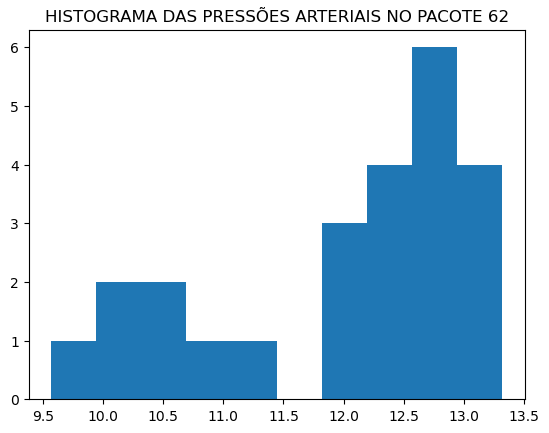

PACOTE 63: 
MÉDIA DE PRESSÃO: 11.90457640633698 
MEDIANA DE PRESSAO: 11.968191324010956, 
MODA DE PRESSÃO: 9.049560814764781, 
DESVIO PADRÃO DE PRESSÃO: 1.2811469887070621


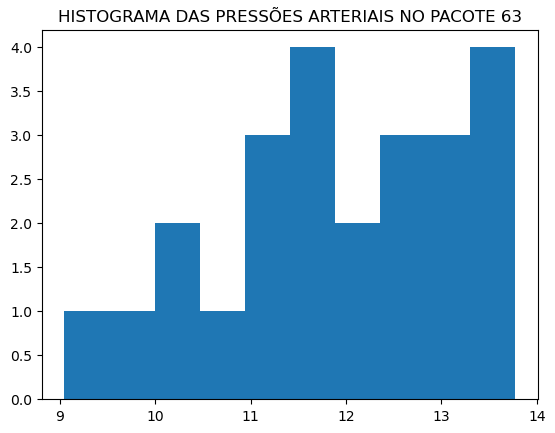

PACOTE 64: 
MÉDIA DE PRESSÃO: 12.199473910027413 
MEDIANA DE PRESSAO: 12.595605832652105, 
MODA DE PRESSÃO: 9.528811057177043, 
DESVIO PADRÃO DE PRESSÃO: 1.1328594011317354


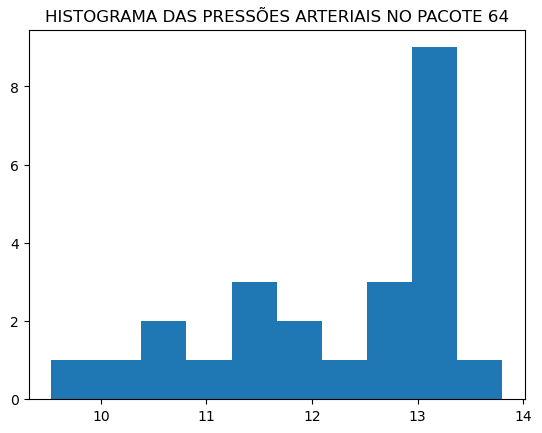

PACOTE 65: 
MÉDIA DE PRESSÃO: 11.882045713520087 
MEDIANA DE PRESSAO: 12.455279636007958, 
MODA DE PRESSÃO: 9.813007696435163, 
DESVIO PADRÃO DE PRESSÃO: 1.1804926088023822


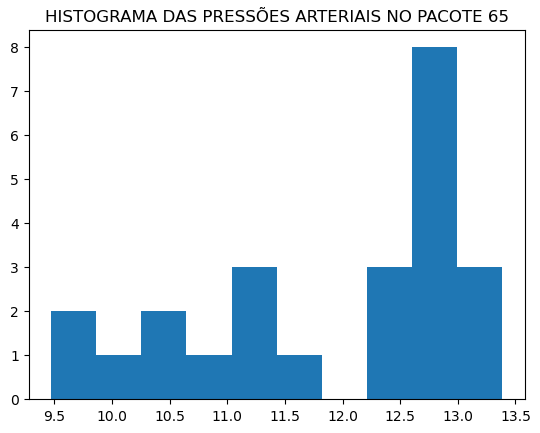

PACOTE 66: 
MÉDIA DE PRESSÃO: 12.12704442068661 
MEDIANA DE PRESSAO: 12.550854426643632, 
MODA DE PRESSÃO: 9.781932337692808, 
DESVIO PADRÃO DE PRESSÃO: 1.2505246820414297


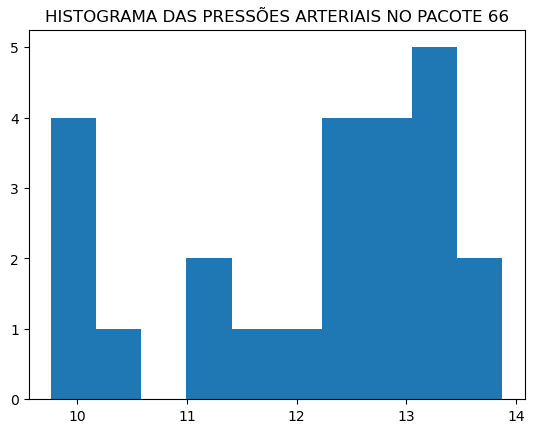

PACOTE 67: 
MÉDIA DE PRESSÃO: 12.159588231664907 
MEDIANA DE PRESSAO: 12.43258985127926, 
MODA DE PRESSÃO: 10.220440864605632, 
DESVIO PADRÃO DE PRESSÃO: 1.1777951749816058


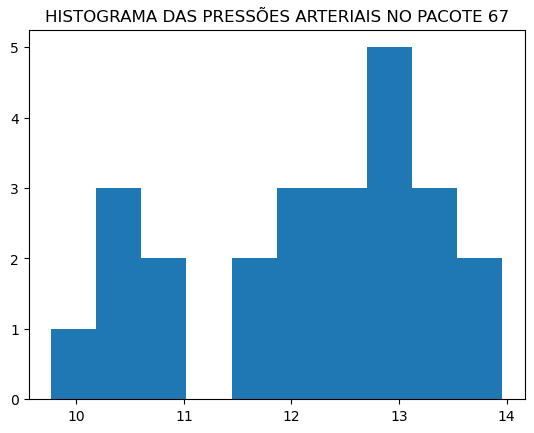

PACOTE 68: 
MÉDIA DE PRESSÃO: 11.955389212409846 
MEDIANA DE PRESSAO: 12.191659292437077, 
MODA DE PRESSÃO: 9.196988316209879, 
DESVIO PADRÃO DE PRESSÃO: 1.3768271447768992


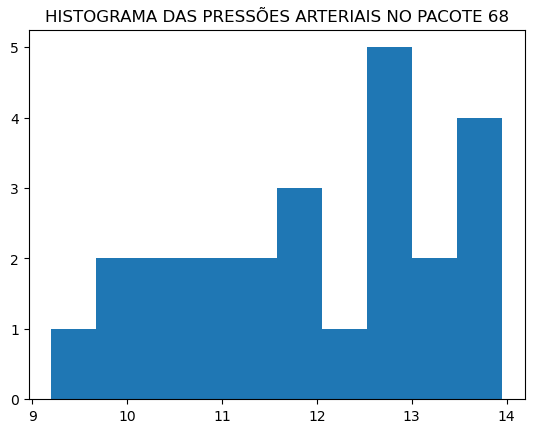

PACOTE 69: 
MÉDIA DE PRESSÃO: 11.96162167877967 
MEDIANA DE PRESSAO: 12.23564241339977, 
MODA DE PRESSÃO: 9.83140611751124, 
DESVIO PADRÃO DE PRESSÃO: 1.1693008118427806


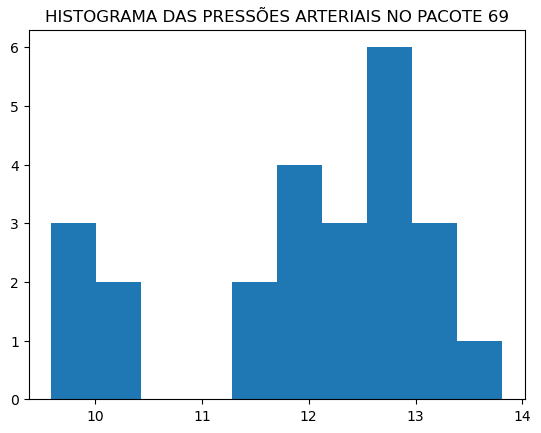

PACOTE 70: 
MÉDIA DE PRESSÃO: 12.07389374778198 
MEDIANA DE PRESSAO: 12.260030636228151, 
MODA DE PRESSÃO: 10.053386215417058, 
DESVIO PADRÃO DE PRESSÃO: 1.107255398675267


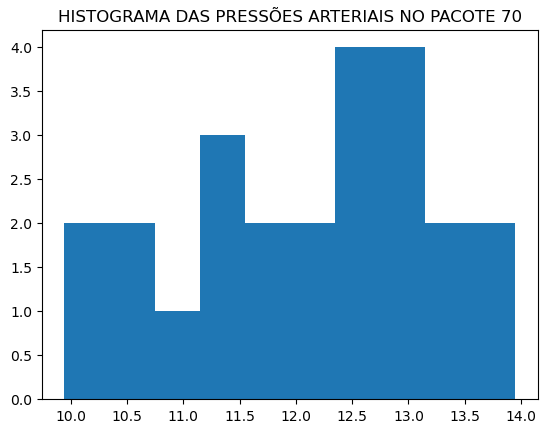

PACOTE 71: 
MÉDIA DE PRESSÃO: 12.064392556059127 
MEDIANA DE PRESSAO: 12.615454213505716, 
MODA DE PRESSÃO: 10.074319046320385, 
DESVIO PADRÃO DE PRESSÃO: 1.3823467915502257


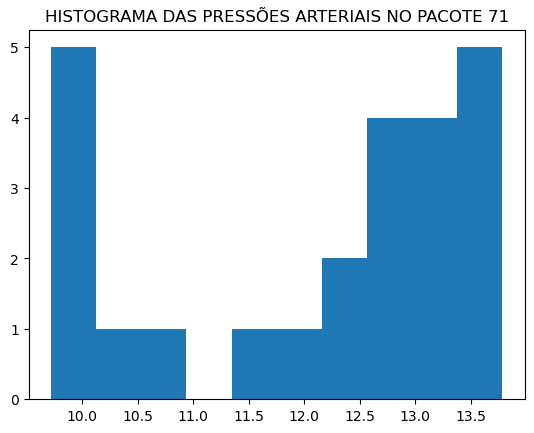

PACOTE 72: 
MÉDIA DE PRESSÃO: 11.994065791578782 
MEDIANA DE PRESSAO: 12.047351815816286, 
MODA DE PRESSÃO: 8.881318150225479, 
DESVIO PADRÃO DE PRESSÃO: 1.129000437465853


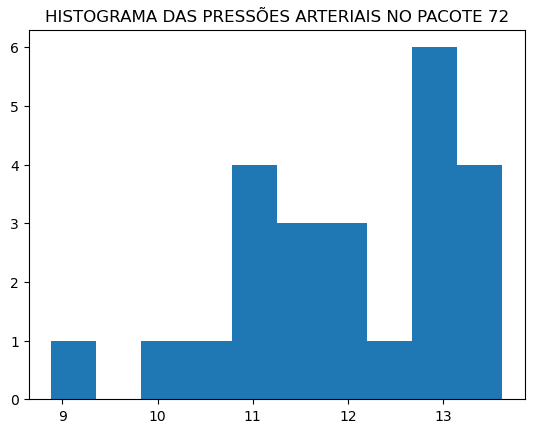

PACOTE 73: 
MÉDIA DE PRESSÃO: 11.856568960221589 
MEDIANA DE PRESSAO: 12.069273316152534, 
MODA DE PRESSÃO: 10.260790382001506, 
DESVIO PADRÃO DE PRESSÃO: 1.1629394623729687


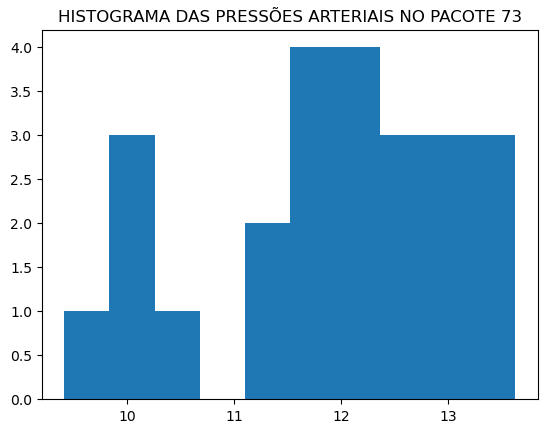

PACOTE 74: 
MÉDIA DE PRESSÃO: 12.093726273942481 
MEDIANA DE PRESSAO: 12.21890607378145, 
MODA DE PRESSÃO: 10.045412987649513, 
DESVIO PADRÃO DE PRESSÃO: 1.098615351276702


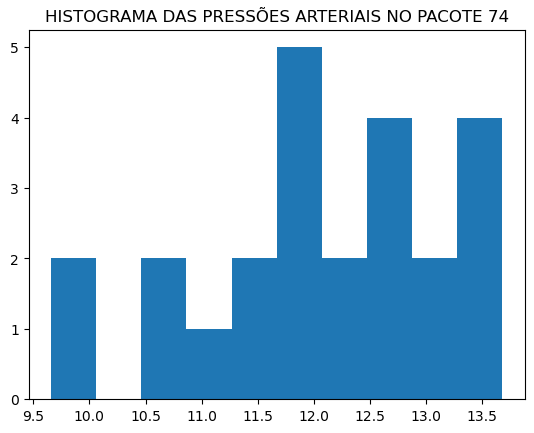

PACOTE 75: 
MÉDIA DE PRESSÃO: 12.266391561598454 
MEDIANA DE PRESSAO: 12.23706531173158, 
MODA DE PRESSÃO: 9.233734505328309, 
DESVIO PADRÃO DE PRESSÃO: 2.492973844055481


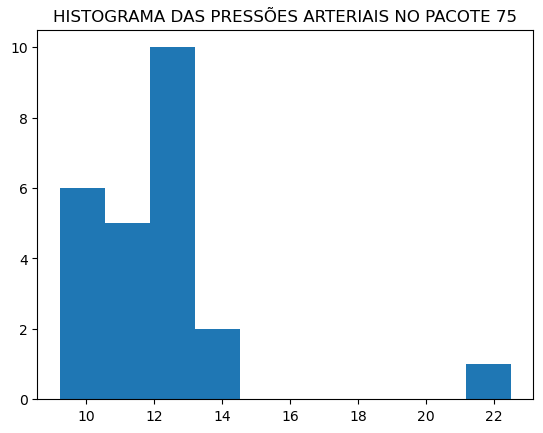

PACOTE 76: 
MÉDIA DE PRESSÃO: 11.97791281444046 
MEDIANA DE PRESSAO: 12.415159629047816, 
MODA DE PRESSÃO: 9.917649107349682, 
DESVIO PADRÃO DE PRESSÃO: 1.185233581270469


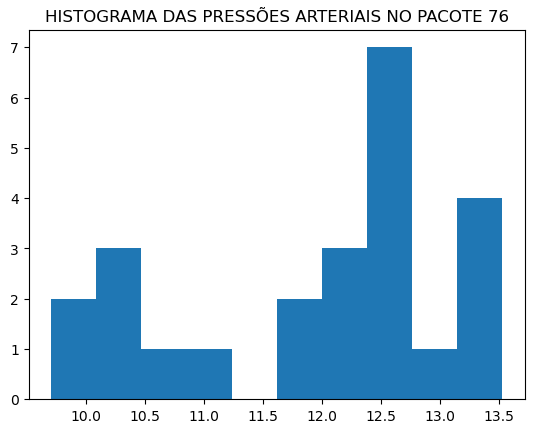

PACOTE 77: 
MÉDIA DE PRESSÃO: 11.768925252728067 
MEDIANA DE PRESSAO: 11.996005302391369, 
MODA DE PRESSÃO: 9.928630463342541, 
DESVIO PADRÃO DE PRESSÃO: 1.1317191212323279


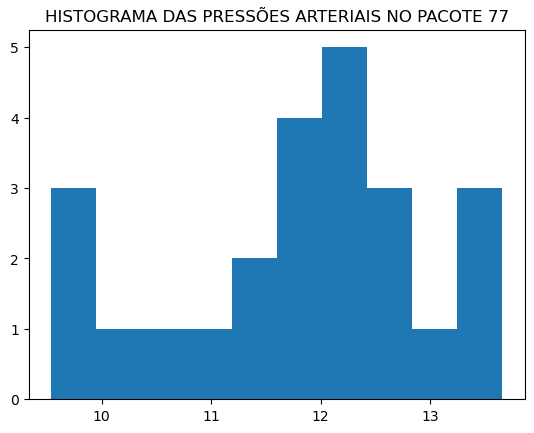

PACOTE 78: 
MÉDIA DE PRESSÃO: 12.060991328106214 
MEDIANA DE PRESSAO: 12.34367119528038, 
MODA DE PRESSÃO: 9.40849182593501, 
DESVIO PADRÃO DE PRESSÃO: 1.2422997303885221


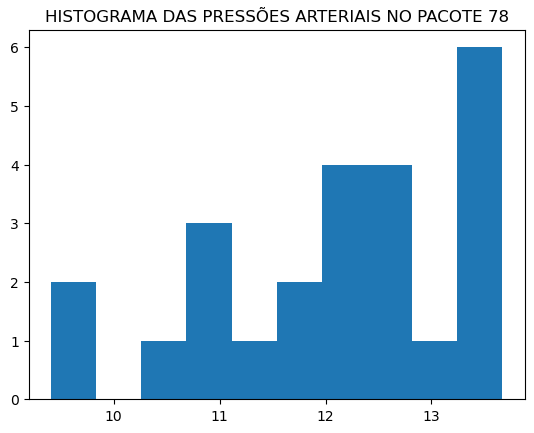

PACOTE 79: 
MÉDIA DE PRESSÃO: 11.864822433616053 
MEDIANA DE PRESSAO: 12.129211423642296, 
MODA DE PRESSÃO: 9.85736496662218, 
DESVIO PADRÃO DE PRESSÃO: 1.2712995759549677


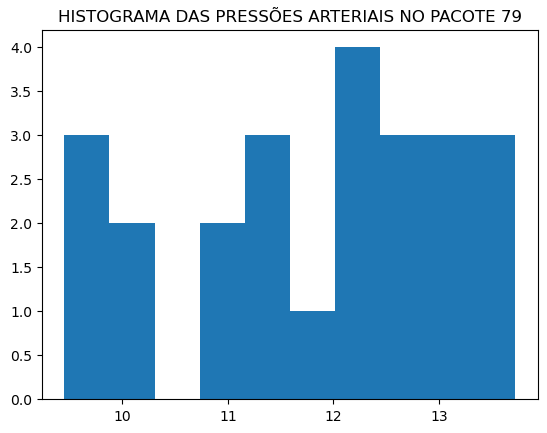

PACOTE 80: 
MÉDIA DE PRESSÃO: 12.03365507895901 
MEDIANA DE PRESSAO: 12.276552546656962, 
MODA DE PRESSÃO: 9.57354539677005, 
DESVIO PADRÃO DE PRESSÃO: 1.2684880695182519


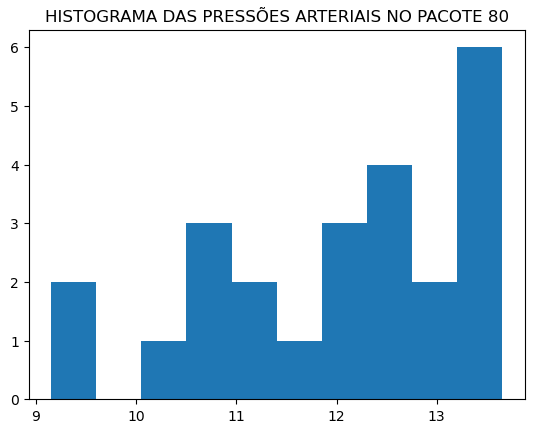

PACOTE 81: 
MÉDIA DE PRESSÃO: 11.811643170051747 
MEDIANA DE PRESSAO: 12.319941905240004, 
MODA DE PRESSÃO: 9.631356534536723, 
DESVIO PADRÃO DE PRESSÃO: 1.2934749762775841


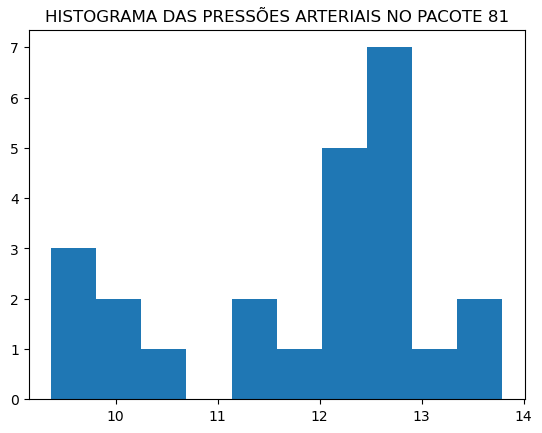

PACOTE 82: 
MÉDIA DE PRESSÃO: 11.981797598898419 
MEDIANA DE PRESSAO: 12.22278500648785, 
MODA DE PRESSÃO: 9.325473814416606, 
DESVIO PADRÃO DE PRESSÃO: 1.3566330929867625


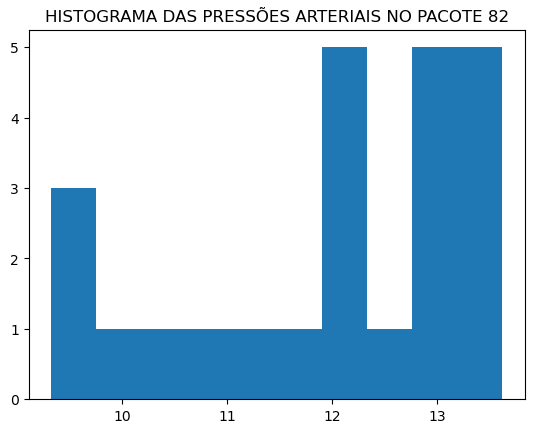

PACOTE 83: 
MÉDIA DE PRESSÃO: 11.849062198160354 
MEDIANA DE PRESSAO: 12.137675482490952, 
MODA DE PRESSÃO: 9.178411102653937, 
DESVIO PADRÃO DE PRESSÃO: 1.2466345780896233


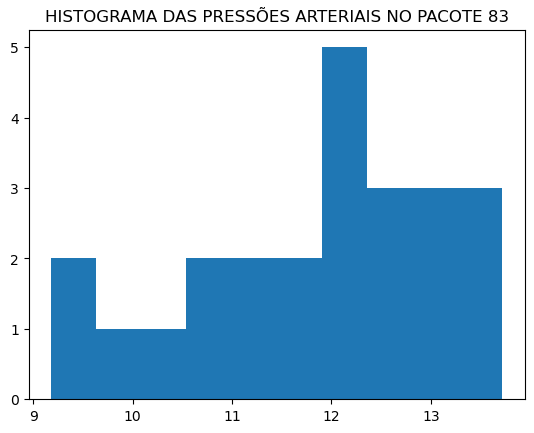

PACOTE 84: 
MÉDIA DE PRESSÃO: 11.728437975511264 
MEDIANA DE PRESSAO: 12.068026739967245, 
MODA DE PRESSÃO: 9.651141658879775, 
DESVIO PADRÃO DE PRESSÃO: 1.386615520338508


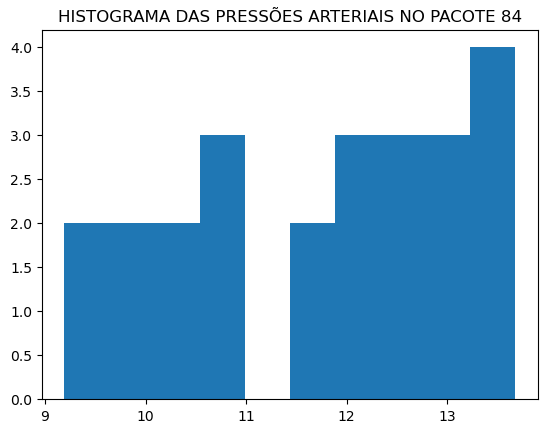

PACOTE 85: 
MÉDIA DE PRESSÃO: 11.947309768585965 
MEDIANA DE PRESSAO: 12.320890937964325, 
MODA DE PRESSÃO: 9.386695560476383, 
DESVIO PADRÃO DE PRESSÃO: 1.418599738713092


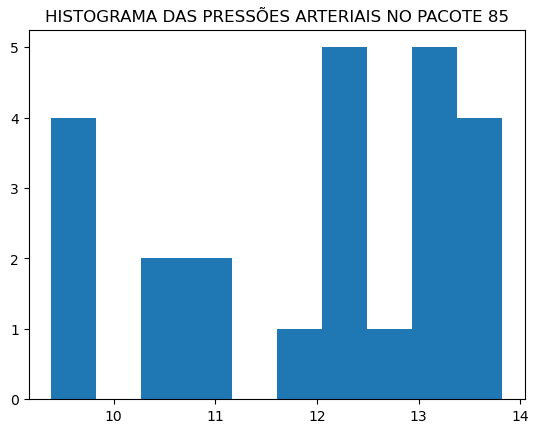

PACOTE 86: 
MÉDIA DE PRESSÃO: 11.766223683130905 
MEDIANA DE PRESSAO: 12.121103505898178, 
MODA DE PRESSÃO: 8.641554057363305, 
DESVIO PADRÃO DE PRESSÃO: 1.5083628497263102


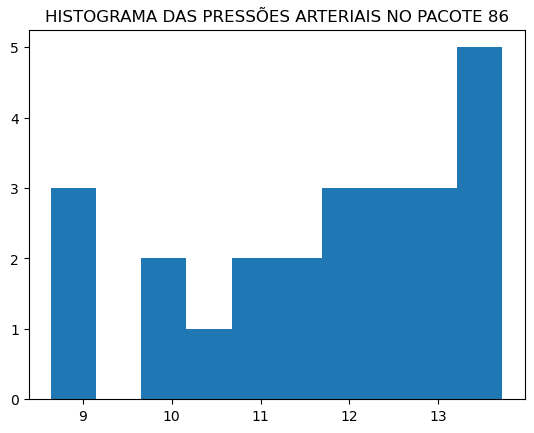

PACOTE 87: 
MÉDIA DE PRESSÃO: 11.852082820220696 
MEDIANA DE PRESSAO: 12.034918265947969, 
MODA DE PRESSÃO: 9.252581643660967, 
DESVIO PADRÃO DE PRESSÃO: 1.2182687147953268


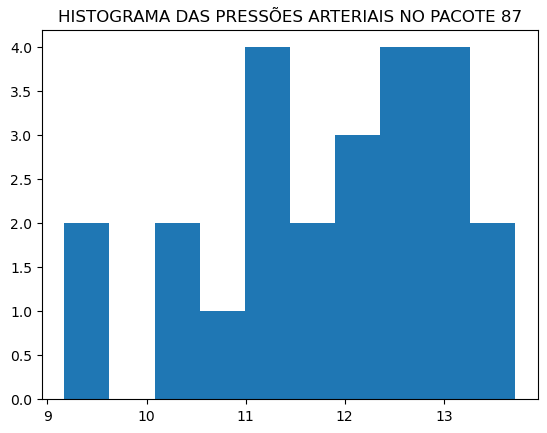

PACOTE 88: 
MÉDIA DE PRESSÃO: 11.90295746127569 
MEDIANA DE PRESSAO: 12.034336705637848, 
MODA DE PRESSÃO: 9.346200496284304, 
DESVIO PADRÃO DE PRESSÃO: 1.4303131505627809


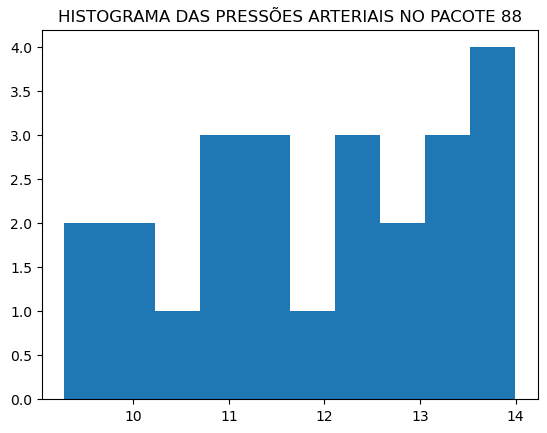

PACOTE 89: 
MÉDIA DE PRESSÃO: 11.907997685312717 
MEDIANA DE PRESSAO: 12.460530299987688, 
MODA DE PRESSÃO: 8.97191211361844, 
DESVIO PADRÃO DE PRESSÃO: 1.3872367115329591


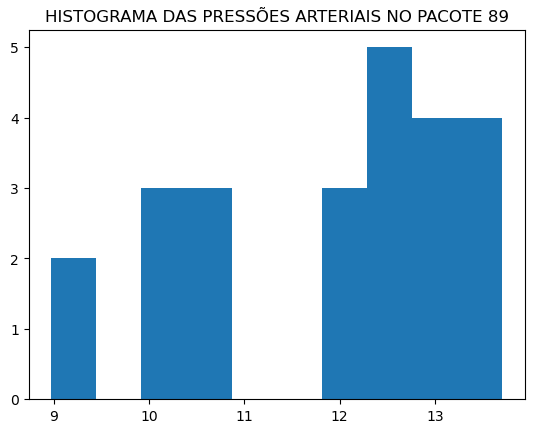

PACOTE 90: 
MÉDIA DE PRESSÃO: 11.73737385814349 
MEDIANA DE PRESSAO: 11.944824251319684, 
MODA DE PRESSÃO: 9.20577016983446, 
DESVIO PADRÃO DE PRESSÃO: 1.1235687757985366


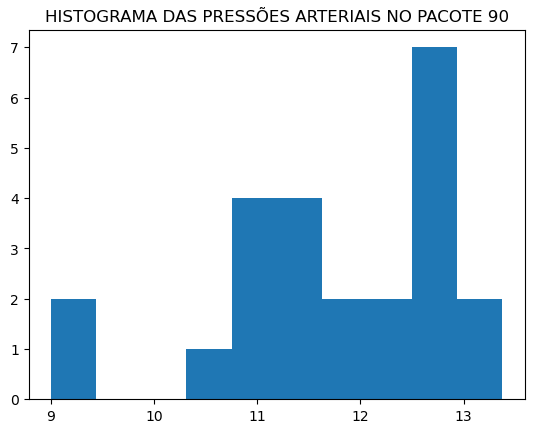

PACOTE 91: 
MÉDIA DE PRESSÃO: 11.779794990627181 
MEDIANA DE PRESSAO: 12.168933524532056, 
MODA DE PRESSÃO: 8.498855221482016, 
DESVIO PADRÃO DE PRESSÃO: 1.39171396043477


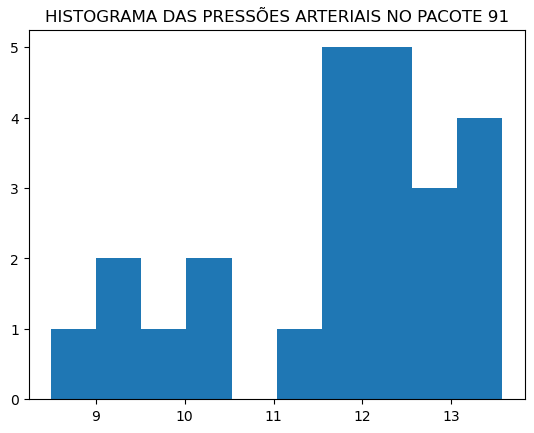

PACOTE 92: 
MÉDIA DE PRESSÃO: 11.851495980418173 
MEDIANA DE PRESSAO: 12.016517345395139, 
MODA DE PRESSÃO: 9.39447064931177, 
DESVIO PADRÃO DE PRESSÃO: 1.3571003243862465


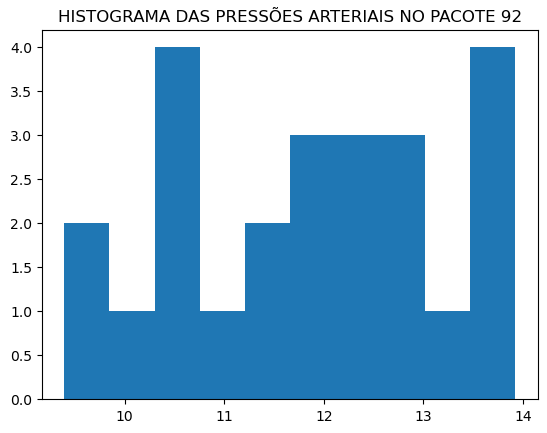

PACOTE 93: 
MÉDIA DE PRESSÃO: 11.95709677138243 
MEDIANA DE PRESSAO: 12.384633332268152, 
MODA DE PRESSÃO: 9.846788287265158, 
DESVIO PADRÃO DE PRESSÃO: 1.1000253663346191


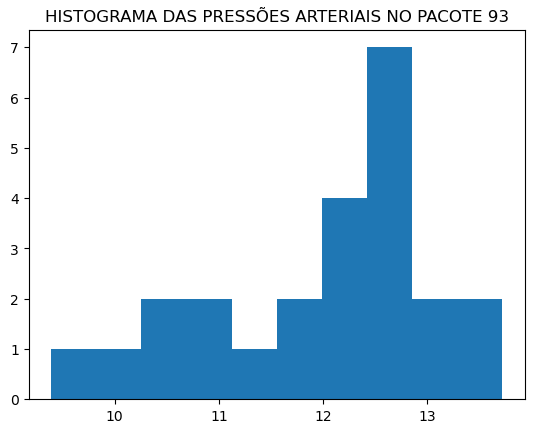

PACOTE 94: 
MÉDIA DE PRESSÃO: 11.510173492133399 
MEDIANA DE PRESSAO: 11.579169381566928, 
MODA DE PRESSÃO: 8.93270667386797, 
DESVIO PADRÃO DE PRESSÃO: 1.2780582169140005


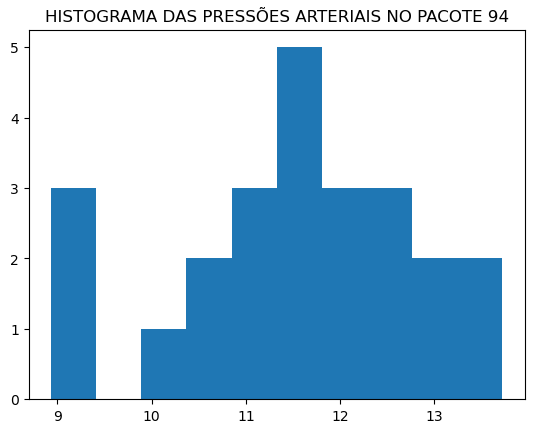

PACOTE 95: 
MÉDIA DE PRESSÃO: 11.830249385535128 
MEDIANA DE PRESSAO: 11.824052714132469, 
MODA DE PRESSÃO: 10.156056029768548, 
DESVIO PADRÃO DE PRESSÃO: 1.2083973115491462


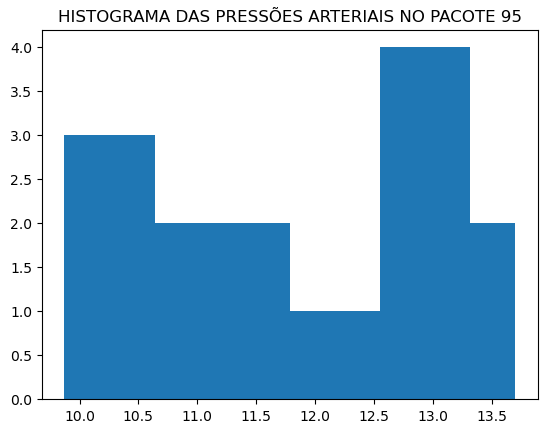

PACOTE 96: 
MÉDIA DE PRESSÃO: 11.684465579725876 
MEDIANA DE PRESSAO: 12.069300111623111, 
MODA DE PRESSÃO: 9.564818746632982, 
DESVIO PADRÃO DE PRESSÃO: 1.279779998031688


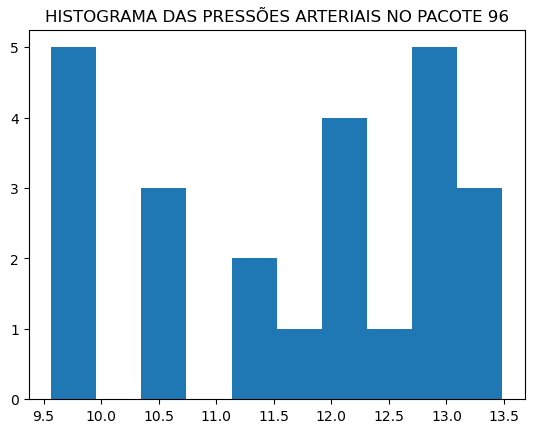

PACOTE 97: 
MÉDIA DE PRESSÃO: 11.73234551339386 
MEDIANA DE PRESSAO: 11.948201633674506, 
MODA DE PRESSÃO: 9.315171376095893, 
DESVIO PADRÃO DE PRESSÃO: 1.3225033282543588


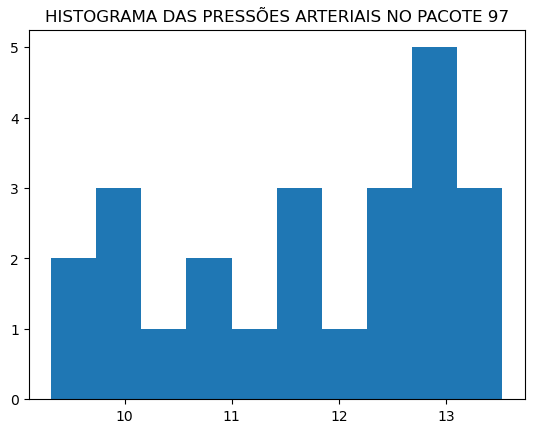

PACOTE 98: 
MÉDIA DE PRESSÃO: 11.60257395384855 
MEDIANA DE PRESSAO: 11.894494281904795, 
MODA DE PRESSÃO: 9.15379783448689, 
DESVIO PADRÃO DE PRESSÃO: 1.0579876543803324


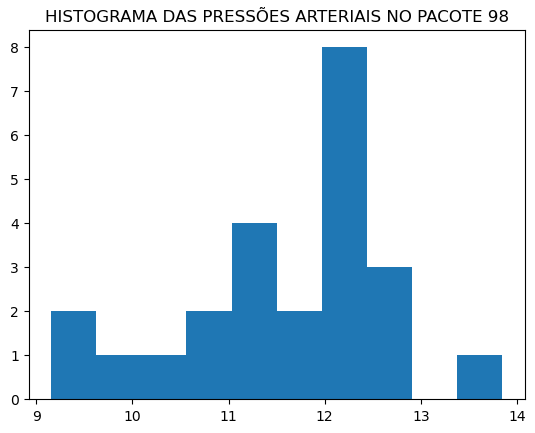

PACOTE 99: 
MÉDIA DE PRESSÃO: 11.741074145342957 
MEDIANA DE PRESSAO: 12.002687554825267, 
MODA DE PRESSÃO: 8.489964945900303, 
DESVIO PADRÃO DE PRESSÃO: 1.4092964893335522


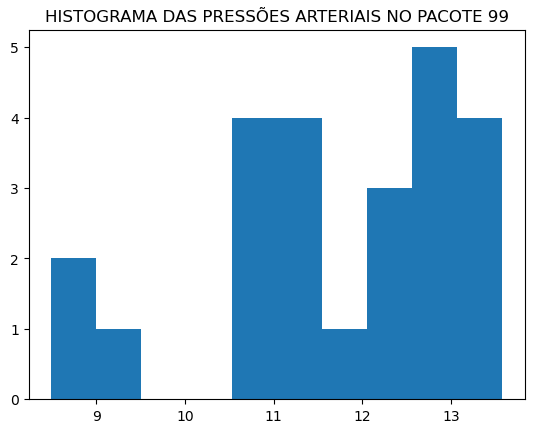

PACOTE 100: 
MÉDIA DE PRESSÃO: 11.827076433801055 
MEDIANA DE PRESSAO: 11.876993550240169, 
MODA DE PRESSÃO: 9.692259906292458, 
DESVIO PADRÃO DE PRESSÃO: 1.2398135579507712


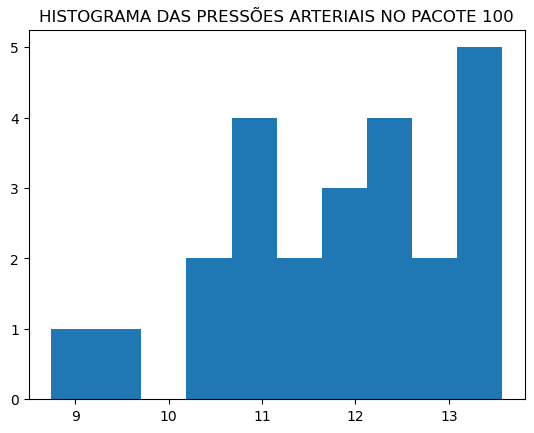

In [29]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import statistics
from scipy.stats import mode

dados = []

# Ler o arquivo de dados
path = 'sinaisvitais003.txt'
with open(path, 'r', newline='') as ARQUIVO:
    ARQ = csv.reader(ARQUIVO)
    ARQDATA = list(ARQ)
    for i in range(len(ARQDATA)):
        p = ARQDATA[i][0]
        campo = p.split('\t')
        dados.append({"HORA": campo[0], 'batimentos': float(campo[1]), "pressao":float(campo[2]), 'temperatura': float(campo[3])})

# Dividir em pacotes de 24 amostras para cada variável
pacotes_batimentos = [[d['batimentos'] for d in dados[i:i+24]] for i in range(0, len(dados), 24)]
pacotes_pressao = [[d['pressao'] for d in dados[i:i+24]] for i in range(0, len(dados), 24)]
pacotes_temperatura = [[d['temperatura'] for d in dados[i:i+24]] for i in range(0, len(dados), 24)]

# Calcular estatísticas descritivas para cada pacote de cada variável
for i, pacote in enumerate(pacotes_batimentos):
    media_batimentos = np.mean(pacote)
    mediana_batimentos = np.median(pacote)
    moda_batimentos = statistics.mode(pacote)
    desvio_padrao_batimentos = np.std(pacote)
    print(f"PACOTE {i+1}: \nMÉDIA DE BATIMENTOS: {media_batimentos} \nMEDIANA DE BATIMENTOS: {mediana_batimentos} \nMODA DE BATIMENTOS: {moda_batimentos} \nDESVIO PADRÃO DE BATIMENTOS: {desvio_padrao_batimentos}")
    
    # Plotar o histograma dos batimentos
    plt.hist(pacote)
    plt.title(f"HISTOGRAMA DOS BATIMENTOS CARDIACOS NO PACOTE {i+1}")
    plt.show()
    
    # Verificar se os valores dos batimentos estão acima de um determinado limite
    limite_batimentos = 100
    if media_batimentos > limite_batimentos:
        print("Atenção! O valor médio do batimento cardíaco está acima do limite.")
    
for i, pacote in enumerate(pacotes_pressao):
    media_pressao = np.mean(pacote)
    mediana_pressao = np.median(pacote)
    moda_pressao = statistics.mode(pacote)
    desvio_padrao_pressao = np.std(pacote)
    print(f"PACOTE {i+1}: \nMÉDIA DE PRESSÃO: {media_pressao} \nMEDIANA DE PRESSAO: {mediana_pressao} \nMODA DE PRESSÃO: {moda_pressao} \nDESVIO PADRÃO DE PRESSÃO: {desvio_padrao_pressao}")
    
    # Plotar o histograma da pressão
    plt.hist(pacote)
    plt.title(f"HISTOGRAMA DAS PRESSÕES ARTERIAIS NO PACOTE {i+1}")
    plt.show()
    
    # Verificar se os valores da pressão estão acima de um determinado limite
    limite_pressao = 20
    if media_pressao > limite_pressao:
        print("Atenção! O valor médio da pressão arterial está acima do limite.")
